In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
nba_new=pd.read_csv("nba_new.csv",low_memory=False)
nba_new=nba_new[:60]
nba_new

X    Year  Rank           Team  Wins  Home: Total Attendance  \
0    1.0  2017.0   1.0         Bulls   27.0                851824.0   
1    2.0  2017.0   2.0      Cavaliers  50.0                843042.0   
2    3.0  2017.0   3.0          76ers  52.0                833503.0   
3    4.0  2017.0   4.0        Raptors  59.0                813431.0   
4    5.0  2017.0   5.0      Mavericks  24.0                811453.0   
5    6.0  2017.0   6.0           Heat  44.0                785250.0   
6    7.0  2017.0   7.0       Warriors  58.0                803436.0   
7    8.0  2017.0   8.0  Trail Blazers  49.0                795328.0   
8    9.0  2017.0   9.0      NY Knicks  29.0                792608.0   
9   10.0  2017.0  10.0         Lakers  35.0                776327.0   
10  11.0  2017.0  11.0        Celtics  55.0                744960.0   
11  12.0  2017.0  12.0          Spurs  47.0                754562.0   
12  13.0  2017.0  13.0        Thunder  48.0                746323.0   
13  14.0  2017.0  14.0        Wizards  43.0                718946.0   
14  15.0  2017.0  15.0           Jazz  48.0                734806.0   
15  16.0  2017.0  16.0        Rockets  65.0                716008.0   
16  17.0  2017.0  17.0          Magic  25.0                715728.0   
17  18.0  2017.0  18.0          Kings  27.0                649571.0   
18  19.0  2017.0  19.0        Pistons  39.0                713945.0   
19  20.0  2017.0  20.0        Nuggets  46.0                702796.0   
20  21.0  2017.0  21.0   Timberwolves  47.0                699308.0   
21  22.0  2017.0  22.0       Clippers  42.0                697812.0   
22  23.0  2017.0  23.0           Suns  21.0                674655.0   
23  24.0  2017.0  24.0          Bucks  44.0                685303.0   
24  25.0  2017.0  25.0       Pelicans  48.0                673920.0   
25  26.0  2017.0  26.0        Hornets  36.0                671404.0   
26  27.0  2017.0  27.0         Pacers  48.0                658119.0   
27  28.0  2017.0  28.0      Grizzlies  22.0                653863.0   
28  29.0  2017.0  29.0           Nets  28.0                622278.0   
29  30.0  2017.0  30.0          Hawks  24.0                590769.0   
30  31.0  2016.0   1.0         Bulls   41.0                888882.0   
31  32.0  2016.0   2.0      Cavaliers  51.0                843042.0   
32  33.0  2016.0   3.0        Raptors  51.0                813050.0   
33  34.0  2016.0   4.0      Mavericks  33.0                811366.0   
34  35.0  2016.0   5.0      NY Knicks  31.0                810741.0   
35  36.0  2016.0   6.0           Jazz  51.0                806605.0   
36  37.0  2016.0   7.0           Heat  41.0                805400.0   
37  38.0  2016.0   8.0       Warriors  67.0                803436.0   
38  39.0  2016.0   9.0  Trail Blazers  41.0                792029.0   
39  40.0  2016.0  10.0       Clippers  51.0                782609.0   
40  41.0  2016.0  11.0         Lakers  26.0                776917.0   
41  42.0  2016.0  12.0        Celtics  53.0                760690.0   
42  43.0  2016.0  13.0          Spurs  61.0                755347.0   
43  44.0  2016.0  14.0        Thunder  47.0                746323.0   
44  45.0  2016.0  15.0          Magic  29.0                727875.0   
45  46.0  2016.0  16.0          Kings  32.0                721928.0   
46  47.0  2016.0  17.0        Hornets  36.0                710643.0   
47  48.0  2016.0  18.0          76ers  28.0                710557.0   
48  49.0  2016.0  19.0           Suns  24.0                708639.0   
49  50.0  2016.0  20.0        Wizards  49.0                697107.0   
50  51.0  2016.0  21.0        Rockets  55.0                695903.0   
51  52.0  2016.0  22.0         Pacers  42.0                684578.0   
52  53.0  2016.0  23.0      Grizzlies  43.0                677314.0   
53  54.0  2016.0  24.0       Pelicans  34.0                663099.0   
54  55.0  2016.0  25.0        Pistons  37.0                655141.0   
55  56.0  2016.0  26.0         

In [5]:
nba_new.dtypes

X                         float64
Year                      float64
Rank                      float64
Team                       object
Wins                      float64
Home: Total Attendance    float64
HomeAvgAttendance         float64
Home: Total Games         float64
Home: % Capacity          float64
Away: Total Games         float64
Away: Avg Attendance      float64
dtype: object

In [6]:
nba_new[['X','Year','Rank','Wins','Home: Total Attendance','HomeAvgAttendance','Home: Total Games',
         'Away: Total Games','Away: Avg Attendance']]=nba_new[['X','Year','Rank','Wins','Home: Total Attendance','HomeAvgAttendance',
        'Home: Total Games','Away: Total Games','Away: Avg Attendance']].astype('int64')
nba_new.dtypes

X                           int64
Year                        int64
Rank                        int64
Team                       object
Wins                        int64
Home: Total Attendance      int64
HomeAvgAttendance           int64
Home: Total Games           int64
Home: % Capacity          float64
Away: Total Games           int64
Away: Avg Attendance        int64
dtype: object

In [7]:
nba_new=nba_new.drop(['Home: % Capacity'],axis=1)
nba_new

X  Year  Rank           Team  Wins  Home: Total Attendance  \
0    1  2017     1         Bulls     27                  851824   
1    2  2017     2      Cavaliers    50                  843042   
2    3  2017     3          76ers    52                  833503   
3    4  2017     4        Raptors    59                  813431   
4    5  2017     5      Mavericks    24                  811453   
5    6  2017     6           Heat    44                  785250   
6    7  2017     7       Warriors    58                  803436   
7    8  2017     8  Trail Blazers    49                  795328   
8    9  2017     9      NY Knicks    29                  792608   
9   10  2017    10         Lakers    35                  776327   
10  11  2017    11        Celtics    55                  744960   
11  12  2017    12          Spurs    47                  754562   
12  13  2017    13        Thunder    48                  746323   
13  14  2017    14        Wizards    43                  718946   
14  15  2017    15           Jazz    48                  734806   
15  16  2017    16        Rockets    65                  716008   
16  17  2017    17          Magic    25                  715728   
17  18  2017    18          Kings    27                  649571   
18  19  2017    19        Pistons    39                  713945   
19  20  2017    20        Nuggets    46                  702796   
20  21  2017    21   Timberwolves    47                  699308   
21  22  2017    22       Clippers    42                  697812   
22  23  2017    23           Suns    21                  674655   
23  24  2017    24          Bucks    44                  685303   
24  25  2017    25       Pelicans    48                  673920   
25  26  2017    26        Hornets    36                  671404   
26  27  2017    27         Pacers    48                  658119   
27  28  2017    28      Grizzlies    22                  653863   
28  29  2017    29           Nets    28                  622278   
29  30  2017    30          Hawks    24                  590769   
30  31  2016     1         Bulls     41                  888882   
31  32  2016     2      Cavaliers    51                  843042   
32  33  2016     3        Raptors    51                  813050   
33  34  2016     4      Mavericks    33                  811366   
34  35  2016     5      NY Knicks    31                  810741   
35  36  2016     6           Jazz    51                  806605   
36  37  2016     7           Heat    41                  805400   
37  38  2016     8       Warriors    67                  803436   
38  39  2016     9  Trail Blazers    41                  792029   
39  40  2016    10       Clippers    51                  782609   
40  41  2016    11         Lakers    26                  776917   
41  42  2016    12        Celtics    53                  760690   
42  43  2016    13          Spurs    61                  755347   
43  44  2016    14        Thunder    47                  746323   
44  45  2016    15          Magic    29                  727875   
45  46  2016    16          Kings    32                  721928   
46  47  2016    17        Hornets    36                  710643   
47  48  2016    18          76ers    28                  710557   
48  49  2016    19           Suns    24                  708639   
49  50  2016    20        Wizards    49                  697107   
50  51  2016    21        Rockets    55                  695903   
51  52  2016    22         Pacers    42                  684578   
52  53  2016    23      Grizzlies    43                  677314   
53  54  2016    24       Pelicans    34                  663099   
54  55  2016    25        Pistons    37                  655141   
55  56  2016    26          Hawks    43                  654306   
56  57  2016    27          Bucks    42                  648952   
57  58  2016    28           Nets    20                  632608   
58  59  2016    29   Timberwolves    31             

In [8]:
NBA=pd.read_csv("NBA.csv")
NBA

X  Year  Rank           Team  Wins  Home: Total Attendance  \
0      1  2015     1          Bulls    42                  894659   
1      2  2015     2      Cavaliers    57                  843042   
2      3  2015     3      Mavericks    42                  825901   
3      4  2015     4        Raptors    56                  812863   
4      5  2015     5      NY Knicks    32                  812292   
5      6  2015     6           Heat    48                  809350   
6      7  2015     7       Warriors    73                  803436   
7      8  2015     8  Trail Blazers    44                  794085   
8      9  2015     9           Jazz    40                  791489   
9     10  2015    10       Clippers    53                  786910   
10    11  2015    11         Lakers    17                  778877   
11    12  2015    12          Spurs    67                  756445   
12    13  2015    13        Celtics    48                  749076   
13    14  2015    14        Thunder    55                  746323   
14    15  2015    15        Rockets    41                  737244   
15    16  2015    16        Wizards    41                  725426   
16    17  2015    17          Magic    35                  719275   
17    18  2015    18        Hornets    48                  716894   
18    19  2015    19          Kings    33                  707526   
19    20  2015    20           Suns    23                  701405   
20    21  2015    21         Pacers    45                  690733   
21    22  2015    22          Hawks    48                  690150   
22    23  2015    23       Pelicans    30                  688549   
23    24  2015    24      Grizzlies    42                  684603   
24    25  2015    25        Pistons    44                  677138   
25    26  2015    26          Bucks    33                  621808   
26    27  2015    27           Nets    21                  620142   
27    28  2015    28          76ers    10                  610121   
28    29  2015    29   Timberwolves    29                  581178   
29    30  2015    30        Nuggets    33                  577898   
..   ...   ...   ...            ...   ...                     ...   
446  447  2001    29       Pelicans    44                  462738   
447  448  2000     1          Spurs    58                  913175   
448  449  2000     2          Bulls    15                  888654   
449  450  2000     3  Trail Blazers    50                  831385   
450  451  2000     4      NY Knicks    48                  810283   
451  452  2000     5          76ers    56                  805692   
452  453  2000     6        Raptors    47                  793256   
453  454  2000     7           Jazz    53                  792196   
454  455  2000     8         Lakers    56                  776336   
455  456  2000     9           Suns    51                  737586   
456  457  2000    10         Pacers    41                  733444   
457  458  2000    11   Timberwolves    47                  717371   
458  459  2000    12          Kings    55                  709997   
459  460  2000    13          Bucks    52                  683125   
460  461  2000    14      Mavericks    53                  680138   
461  462  2000    15           Heat    50                  677186   
462  463  2000    16      Cavaliers    30                  650775   
463  464  2000    17        Thunder    44                  640847   
464  465  2000    18        Wizards    19                  638653   
465  466  2000    19        Celtics    36                  629201   
466  467  2000    20        Nuggets    40                  619300   
467  468  2000    21       Pelicans    46                  615424   
468  469  2000    22        Pistons    32                  607323   
469  470  2000    23          Magic    43                  605031   
470  471  2000    24       Clippers    31                  599448   
471  472  2000    25       Warriors    17                  591981   
472  

In [9]:
NBA=NBA.rename(columns={'Away: Avg Attendance':'Away: %','Away: Total Attendance':'Away: Avg Attendance'})
NBA.dtypes

X                          int64
Year                       int64
Rank                       int64
Team                      object
Wins                       int64
Home: Total Attendance     int64
HomeAvgAttendance          int64
Home: Total Games          int64
Home: % Capactiy          object
Away: Total Games          int64
Away: Avg Attendance       int64
Away: %                   object
Away: % Capactiy           int64
Wins.1                     int64
dtype: object

In [10]:
NBA=NBA.drop(['Home: % Capactiy','Away: %','Away: % Capactiy','Wins.1'],axis=1)
NBA

X  Year  Rank           Team  Wins  Home: Total Attendance  \
0      1  2015     1          Bulls    42                  894659   
1      2  2015     2      Cavaliers    57                  843042   
2      3  2015     3      Mavericks    42                  825901   
3      4  2015     4        Raptors    56                  812863   
4      5  2015     5      NY Knicks    32                  812292   
5      6  2015     6           Heat    48                  809350   
6      7  2015     7       Warriors    73                  803436   
7      8  2015     8  Trail Blazers    44                  794085   
8      9  2015     9           Jazz    40                  791489   
9     10  2015    10       Clippers    53                  786910   
10    11  2015    11         Lakers    17                  778877   
11    12  2015    12          Spurs    67                  756445   
12    13  2015    13        Celtics    48                  749076   
13    14  2015    14        Thunder    55                  746323   
14    15  2015    15        Rockets    41                  737244   
15    16  2015    16        Wizards    41                  725426   
16    17  2015    17          Magic    35                  719275   
17    18  2015    18        Hornets    48                  716894   
18    19  2015    19          Kings    33                  707526   
19    20  2015    20           Suns    23                  701405   
20    21  2015    21         Pacers    45                  690733   
21    22  2015    22          Hawks    48                  690150   
22    23  2015    23       Pelicans    30                  688549   
23    24  2015    24      Grizzlies    42                  684603   
24    25  2015    25        Pistons    44                  677138   
25    26  2015    26          Bucks    33                  621808   
26    27  2015    27           Nets    21                  620142   
27    28  2015    28          76ers    10                  610121   
28    29  2015    29   Timberwolves    29                  581178   
29    30  2015    30        Nuggets    33                  577898   
..   ...   ...   ...            ...   ...                     ...   
446  447  2001    29       Pelicans    44                  462738   
447  448  2000     1          Spurs    58                  913175   
448  449  2000     2          Bulls    15                  888654   
449  450  2000     3  Trail Blazers    50                  831385   
450  451  2000     4      NY Knicks    48                  810283   
451  452  2000     5          76ers    56                  805692   
452  453  2000     6        Raptors    47                  793256   
453  454  2000     7           Jazz    53                  792196   
454  455  2000     8         Lakers    56                  776336   
455  456  2000     9           Suns    51                  737586   
456  457  2000    10         Pacers    41                  733444   
457  458  2000    11   Timberwolves    47                  717371   
458  459  2000    12          Kings    55                  709997   
459  460  2000    13          Bucks    52                  683125   
460  461  2000    14      Mavericks    53                  680138   
461  462  2000    15           Heat    50                  677186   
462  463  2000    16      Cavaliers    30                  650775   
463  464  2000    17        Thunder    44                  640847   
464  465  2000    18        Wizards    19                  638653   
465  466  2000    19        Celtics    36                  629201   
466  467  2000    20        Nuggets    40                  619300   
467  468  2000    21       Pelicans    46                  615424   
468  469  2000    22        Pistons    32                  607323   
469  470  2000    23          Magic    43                  605031   
470  471  2000    24       Clippers    31                  599448   
471  472  2000    25       Warriors    17                  591981   
472  

In [11]:
nba_con=pd.concat([nba_new,NBA])
nba_con

X  Year  Rank           Team  Wins  Home: Total Attendance  \
0      1  2017     1         Bulls     27                  851824   
1      2  2017     2      Cavaliers    50                  843042   
2      3  2017     3          76ers    52                  833503   
3      4  2017     4        Raptors    59                  813431   
4      5  2017     5      Mavericks    24                  811453   
5      6  2017     6           Heat    44                  785250   
6      7  2017     7       Warriors    58                  803436   
7      8  2017     8  Trail Blazers    49                  795328   
8      9  2017     9      NY Knicks    29                  792608   
9     10  2017    10         Lakers    35                  776327   
10    11  2017    11        Celtics    55                  744960   
11    12  2017    12          Spurs    47                  754562   
12    13  2017    13        Thunder    48                  746323   
13    14  2017    14        Wizards    43                  718946   
14    15  2017    15           Jazz    48                  734806   
15    16  2017    16        Rockets    65                  716008   
16    17  2017    17          Magic    25                  715728   
17    18  2017    18          Kings    27                  649571   
18    19  2017    19        Pistons    39                  713945   
19    20  2017    20        Nuggets    46                  702796   
20    21  2017    21   Timberwolves    47                  699308   
21    22  2017    22       Clippers    42                  697812   
22    23  2017    23           Suns    21                  674655   
23    24  2017    24          Bucks    44                  685303   
24    25  2017    25       Pelicans    48                  673920   
25    26  2017    26        Hornets    36                  671404   
26    27  2017    27         Pacers    48                  658119   
27    28  2017    28      Grizzlies    22                  653863   
28    29  2017    29           Nets    28                  622278   
29    30  2017    30          Hawks    24                  590769   
..   ...   ...   ...            ...   ...                     ...   
446  447  2001    29       Pelicans    44                  462738   
447  448  2000     1          Spurs    58                  913175   
448  449  2000     2          Bulls    15                  888654   
449  450  2000     3  Trail Blazers    50                  831385   
450  451  2000     4      NY Knicks    48                  810283   
451  452  2000     5          76ers    56                  805692   
452  453  2000     6        Raptors    47                  793256   
453  454  2000     7           Jazz    53                  792196   
454  455  2000     8         Lakers    56                  776336   
455  456  2000     9           Suns    51                  737586   
456  457  2000    10         Pacers    41                  733444   
457  458  2000    11   Timberwolves    47                  717371   
458  459  2000    12          Kings    55                  709997   
459  460  2000    13          Bucks    52                  683125   
460  461  2000    14      Mavericks    53                  680138   
461  462  2000    15           Heat    50                  677186   
462  463  2000    16      Cavaliers    30                  650775   
463  464  2000    17        Thunder    44                  640847   
464  465  2000    18        Wizards    19                  638653   
465  466  2000    19        Celtics    36                  629201   
466  467  2000    20        Nuggets    40                  619300   
467  468  2000    21       Pelicans    46                  615424   
468  469  2000    22        Pistons    32                  607323   
469  470  2000    23          Magic    43                  605031   
470  471  2000    24       Clippers    31                  599448   
471  472  2000    25       Warriors    17                  591981   
472  

In [12]:
nba_att=pd.read_csv('nba_att.csv')
nba_att

Team  HomeCapacity
0          Bulls          23500
1       Cavaliers         20562
2           76ers         19500
3         Raptors         19800
4       Mavericks         20000
5            Heat         21000
6        Warriors         19596
7   Trail Blazers         19980
8       NY Knicks         20789
9          Lakers         21000
10        Celtics         19580
11          Spurs         18581
12        Thunder         18203
13        Wizards         20356
14           Jazz         18300
15        Rockets         18300
16          Magic         20000
17          Kings         17608
18        Pistons         20491
19        Nuggets         18007
20   Timberwolves         19356
21       Clippers         21000
22           Suns         18422
23          Bucks         17500
24       Pelicans         17791
25        Hornets         20200
26         Pacers         20000
27      Grizzlies         18119
28           Nets         19000
29          Hawks         21000

In [13]:
pd.set_option('display.max_rows', 600)

In [14]:
nba=pd.merge(nba_con,nba_att,how='left',on='Team')
nba

X  Year  Rank           Team  Wins  Home: Total Attendance  \
0      1  2017     1         Bulls     27                  851824   
1      2  2017     2      Cavaliers    50                  843042   
2      3  2017     3          76ers    52                  833503   
3      4  2017     4        Raptors    59                  813431   
4      5  2017     5      Mavericks    24                  811453   
5      6  2017     6           Heat    44                  785250   
6      7  2017     7       Warriors    58                  803436   
7      8  2017     8  Trail Blazers    49                  795328   
8      9  2017     9      NY Knicks    29                  792608   
9     10  2017    10         Lakers    35                  776327   
10    11  2017    11        Celtics    55                  744960   
11    12  2017    12          Spurs    47                  754562   
12    13  2017    13        Thunder    48                  746323   
13    14  2017    14        Wizards    43                  718946   
14    15  2017    15           Jazz    48                  734806   
15    16  2017    16        Rockets    65                  716008   
16    17  2017    17          Magic    25                  715728   
17    18  2017    18          Kings    27                  649571   
18    19  2017    19        Pistons    39                  713945   
19    20  2017    20        Nuggets    46                  702796   
20    21  2017    21   Timberwolves    47                  699308   
21    22  2017    22       Clippers    42                  697812   
22    23  2017    23           Suns    21                  674655   
23    24  2017    24          Bucks    44                  685303   
24    25  2017    25       Pelicans    48                  673920   
25    26  2017    26        Hornets    36                  671404   
26    27  2017    27         Pacers    48                  658119   
27    28  2017    28      Grizzlies    22                  653863   
28    29  2017    29           Nets    28                  622278   
29    30  2017    30          Hawks    24                  590769   
30    31  2016     1         Bulls     41                  888882   
31    32  2016     2      Cavaliers    51                  843042   
32    33  2016     3        Raptors    51                  813050   
33    34  2016     4      Mavericks    33                  811366   
34    35  2016     5      NY Knicks    31                  810741   
35    36  2016     6           Jazz    51                  806605   
36    37  2016     7           Heat    41                  805400   
37    38  2016     8       Warriors    67                  803436   
38    39  2016     9  Trail Blazers    41                  792029   
39    40  2016    10       Clippers    51                  782609   
40    41  2016    11         Lakers    26                  776917   
41    42  2016    12        Celtics    53                  760690   
42    43  2016    13          Spurs    61                  755347   
43    44  2016    14        Thunder    47                  746323   
44    45  2016    15          Magic    29                  727875   
45    46  2016    16          Kings    32                  721928   
46    47  2016    17        Hornets    36                  710643   
47    48  2016    18          76ers    28                  710557   
48    49  2016    19           Suns    24                  708639   
49    50  2016    20        Wizards    49                  697107   
50    51  2016    21        Rockets    55                  695903   
51    52  2016    22         Pacers    42                  684578   
52    53  2016    23      Grizzlies    43                  677314   
53    54  2016    24       Pelicans    34                  663099   
54    55  2016    25        Pistons    37                  655141   
55    56  2016    26          Hawks    43                  654306   
56    57  2016    27          Bucks    42                  648952   
57   

In [15]:
nba.isnull().sum()

X                          0
Year                       0
Rank                       0
Team                       0
Wins                       0
Home: Total Attendance     0
HomeAvgAttendance          0
Home: Total Games          0
Away: Total Games          0
Away: Avg Attendance       0
HomeCapacity              16
dtype: int64

In [16]:
pd.isnull(nba).any(1).nonzero()[0]

array([ 60,  90, 120, 150, 180, 210, 240, 271, 301, 330, 361, 391, 422,
       453, 486, 508], dtype=int64)

In [17]:
nba=nba.fillna(23500)
nba[['HomeCapacity']]=nba[['HomeCapacity']].astype('int64')
nba[['Year']]=nba[['Year']].astype(str)
nba

X  Year  Rank           Team  Wins  Home: Total Attendance  \
0      1  2017     1         Bulls     27                  851824   
1      2  2017     2      Cavaliers    50                  843042   
2      3  2017     3          76ers    52                  833503   
3      4  2017     4        Raptors    59                  813431   
4      5  2017     5      Mavericks    24                  811453   
5      6  2017     6           Heat    44                  785250   
6      7  2017     7       Warriors    58                  803436   
7      8  2017     8  Trail Blazers    49                  795328   
8      9  2017     9      NY Knicks    29                  792608   
9     10  2017    10         Lakers    35                  776327   
10    11  2017    11        Celtics    55                  744960   
11    12  2017    12          Spurs    47                  754562   
12    13  2017    13        Thunder    48                  746323   
13    14  2017    14        Wizards    43                  718946   
14    15  2017    15           Jazz    48                  734806   
15    16  2017    16        Rockets    65                  716008   
16    17  2017    17          Magic    25                  715728   
17    18  2017    18          Kings    27                  649571   
18    19  2017    19        Pistons    39                  713945   
19    20  2017    20        Nuggets    46                  702796   
20    21  2017    21   Timberwolves    47                  699308   
21    22  2017    22       Clippers    42                  697812   
22    23  2017    23           Suns    21                  674655   
23    24  2017    24          Bucks    44                  685303   
24    25  2017    25       Pelicans    48                  673920   
25    26  2017    26        Hornets    36                  671404   
26    27  2017    27         Pacers    48                  658119   
27    28  2017    28      Grizzlies    22                  653863   
28    29  2017    29           Nets    28                  622278   
29    30  2017    30          Hawks    24                  590769   
30    31  2016     1         Bulls     41                  888882   
31    32  2016     2      Cavaliers    51                  843042   
32    33  2016     3        Raptors    51                  813050   
33    34  2016     4      Mavericks    33                  811366   
34    35  2016     5      NY Knicks    31                  810741   
35    36  2016     6           Jazz    51                  806605   
36    37  2016     7           Heat    41                  805400   
37    38  2016     8       Warriors    67                  803436   
38    39  2016     9  Trail Blazers    41                  792029   
39    40  2016    10       Clippers    51                  782609   
40    41  2016    11         Lakers    26                  776917   
41    42  2016    12        Celtics    53                  760690   
42    43  2016    13          Spurs    61                  755347   
43    44  2016    14        Thunder    47                  746323   
44    45  2016    15          Magic    29                  727875   
45    46  2016    16          Kings    32                  721928   
46    47  2016    17        Hornets    36                  710643   
47    48  2016    18          76ers    28                  710557   
48    49  2016    19           Suns    24                  708639   
49    50  2016    20        Wizards    49                  697107   
50    51  2016    21        Rockets    55                  695903   
51    52  2016    22         Pacers    42                  684578   
52    53  2016    23      Grizzlies    43                  677314   
53    54  2016    24       Pelicans    34                  663099   
54    55  2016    25        Pistons    37                  655141   
55    56  2016    26          Hawks    43                  654306   
56    57  2016    27          Bucks    42                  648952   
57   

In [18]:
nba.dtypes

X                          int64
Year                      object
Rank                       int64
Team                      object
Wins                       int64
Home: Total Attendance     int64
HomeAvgAttendance          int64
Home: Total Games          int64
Away: Total Games          int64
Away: Avg Attendance       int64
HomeCapacity               int64
dtype: object

In [19]:
nba['HomePercentCapacity']= nba['HomeAvgAttendance'] / nba['HomeCapacity']
nba['HomePercentCapacity']= nba['HomePercentCapacity'].round(2)
nba

X  Year  Rank           Team  Wins  Home: Total Attendance  \
0      1  2017     1         Bulls     27                  851824   
1      2  2017     2      Cavaliers    50                  843042   
2      3  2017     3          76ers    52                  833503   
3      4  2017     4        Raptors    59                  813431   
4      5  2017     5      Mavericks    24                  811453   
5      6  2017     6           Heat    44                  785250   
6      7  2017     7       Warriors    58                  803436   
7      8  2017     8  Trail Blazers    49                  795328   
8      9  2017     9      NY Knicks    29                  792608   
9     10  2017    10         Lakers    35                  776327   
10    11  2017    11        Celtics    55                  744960   
11    12  2017    12          Spurs    47                  754562   
12    13  2017    13        Thunder    48                  746323   
13    14  2017    14        Wizards    43                  718946   
14    15  2017    15           Jazz    48                  734806   
15    16  2017    16        Rockets    65                  716008   
16    17  2017    17          Magic    25                  715728   
17    18  2017    18          Kings    27                  649571   
18    19  2017    19        Pistons    39                  713945   
19    20  2017    20        Nuggets    46                  702796   
20    21  2017    21   Timberwolves    47                  699308   
21    22  2017    22       Clippers    42                  697812   
22    23  2017    23           Suns    21                  674655   
23    24  2017    24          Bucks    44                  685303   
24    25  2017    25       Pelicans    48                  673920   
25    26  2017    26        Hornets    36                  671404   
26    27  2017    27         Pacers    48                  658119   
27    28  2017    28      Grizzlies    22                  653863   
28    29  2017    29           Nets    28                  622278   
29    30  2017    30          Hawks    24                  590769   
30    31  2016     1         Bulls     41                  888882   
31    32  2016     2      Cavaliers    51                  843042   
32    33  2016     3        Raptors    51                  813050   
33    34  2016     4      Mavericks    33                  811366   
34    35  2016     5      NY Knicks    31                  810741   
35    36  2016     6           Jazz    51                  806605   
36    37  2016     7           Heat    41                  805400   
37    38  2016     8       Warriors    67                  803436   
38    39  2016     9  Trail Blazers    41                  792029   
39    40  2016    10       Clippers    51                  782609   
40    41  2016    11         Lakers    26                  776917   
41    42  2016    12        Celtics    53                  760690   
42    43  2016    13          Spurs    61                  755347   
43    44  2016    14        Thunder    47                  746323   
44    45  2016    15          Magic    29                  727875   
45    46  2016    16          Kings    32                  721928   
46    47  2016    17        Hornets    36                  710643   
47    48  2016    18          76ers    28                  710557   
48    49  2016    19           Suns    24                  708639   
49    50  2016    20        Wizards    49                  697107   
50    51  2016    21        Rockets    55                  695903   
51    52  2016    22         Pacers    42                  684578   
52    53  2016    23      Grizzlies    43                  677314   
53    54  2016    24       Pelicans    34                  663099   
54    55  2016    25        Pistons    37                  655141   
55    56  2016    26          Hawks    43                  654306   
56    57  2016    27          Bucks    42                  648952   
57   

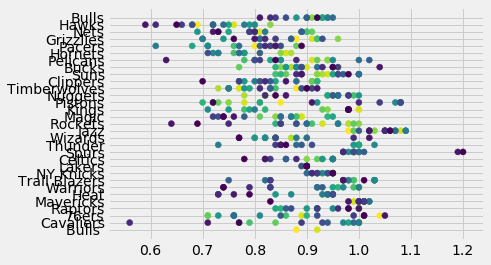

In [20]:
plt.scatter(nba['HomePercentCapacity'],nba['Team'],c=nba['Year'])

Text(0,0.5,'Team')

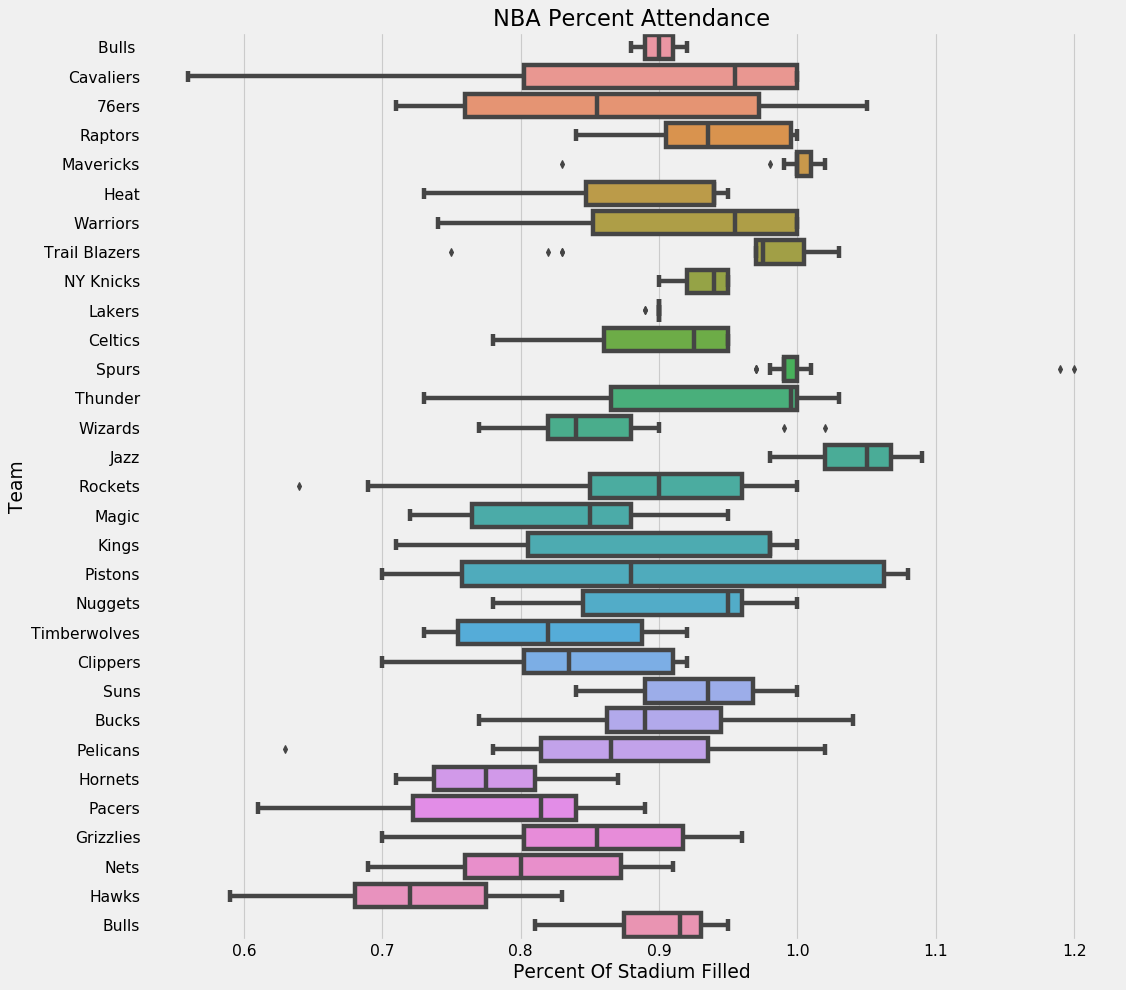

In [21]:
plt.figure(figsize=(14,14), dpi= 80)
sns.boxplot(x='HomePercentCapacity',y='Team',data=nba)
plt.title('NBA Percent Attendance')
plt.xlabel('Percent Of Stadium Filled')
plt.ylabel('Team')

Text(0,0.5,'Team')

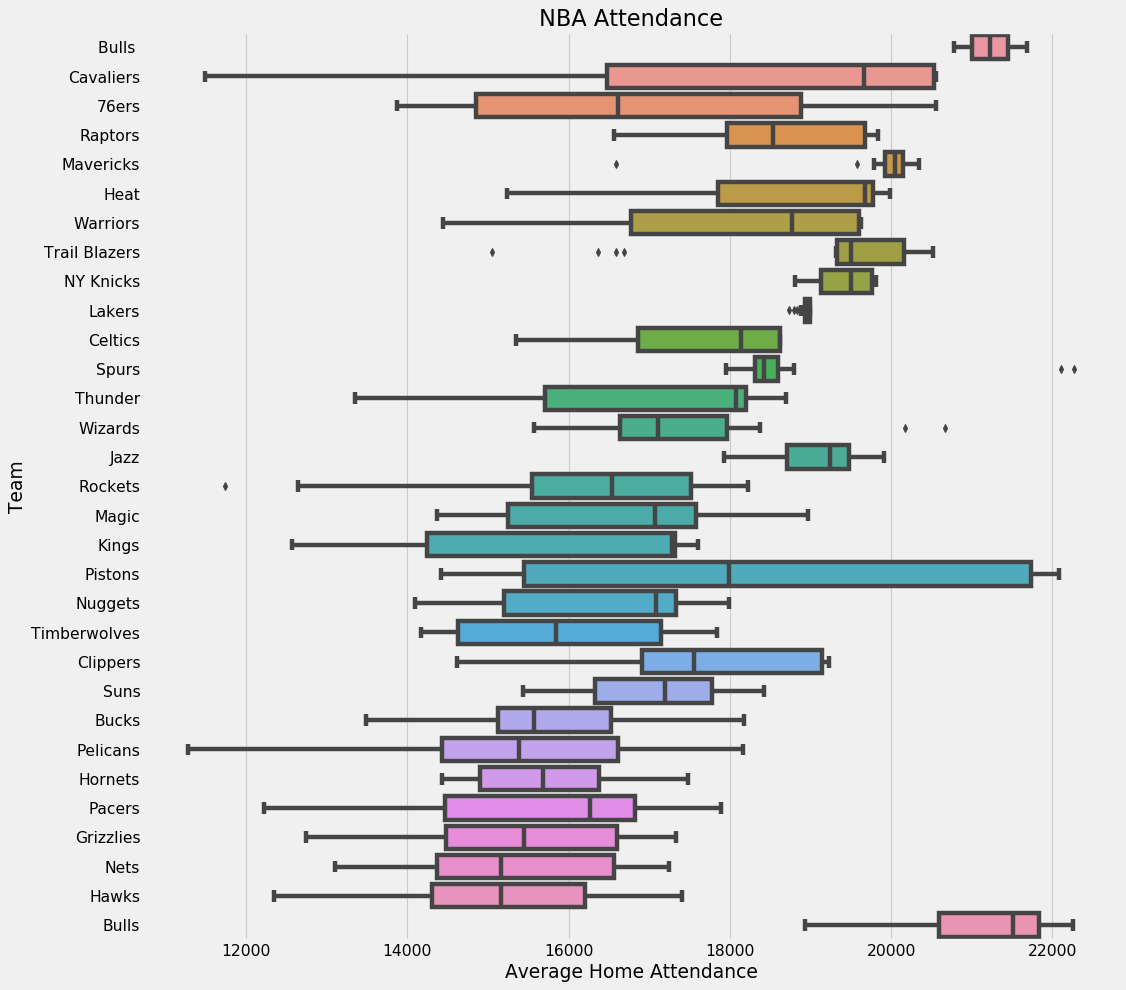

In [22]:
plt.figure(figsize=(14,14), dpi= 80)
sns.boxplot(x='HomeAvgAttendance',y='Team',data=nba)
plt.title('NBA Attendance')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')

In [23]:
nba_2017=nba.loc[(nba.Year == '2017')]
nba_2016=nba.loc[(nba.Year == '2016')]
nba_2015=nba.loc[(nba.Year == '2015')]
nba_2014=nba.loc[(nba.Year == '2014')]
nba_2013=nba.loc[(nba.Year == '2013')]
nba_2012=nba.loc[(nba.Year == '2012')]
nba_2011=nba.loc[(nba.Year == '2011')]
nba_2010=nba.loc[(nba.Year == '2010')]
nba_2009=nba.loc[(nba.Year == '2009')]
nba_2008=nba.loc[(nba.Year == '2008')]
nba_2007=nba.loc[(nba.Year == '2007')]
nba_2006=nba.loc[(nba.Year == '2006')]
nba_2005=nba.loc[(nba.Year == '2005')]
nba_2004=nba.loc[(nba.Year == '2004')]
nba_2003=nba.loc[(nba.Year == '2003')]
nba_2002=nba.loc[(nba.Year == '2002')]
nba_2001=nba.loc[(nba.Year == '2001')]
nba_2000=nba.loc[(nba.Year == '2000')]

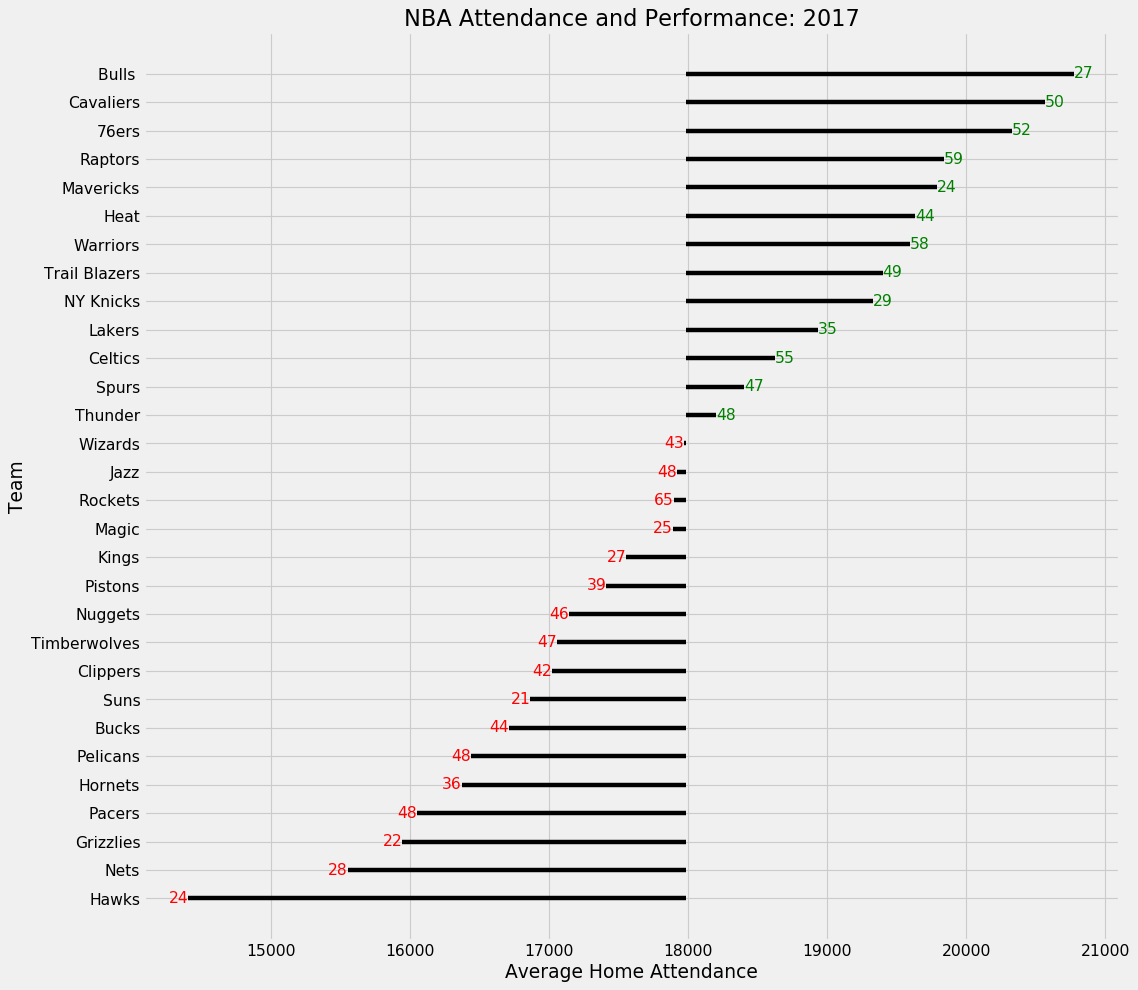

In [24]:
plt.figure(figsize=(14,14), dpi= 80)
nba_2017['HomeAvgAttendance'].mean()
plt.hlines(y=nba_2017.Team,xmin=17988,xmax=nba_2017.HomeAvgAttendance)
for x, y, tex in zip(nba_2017.HomeAvgAttendance, nba_2017.Team, nba_2017.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17988 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17988 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2017')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

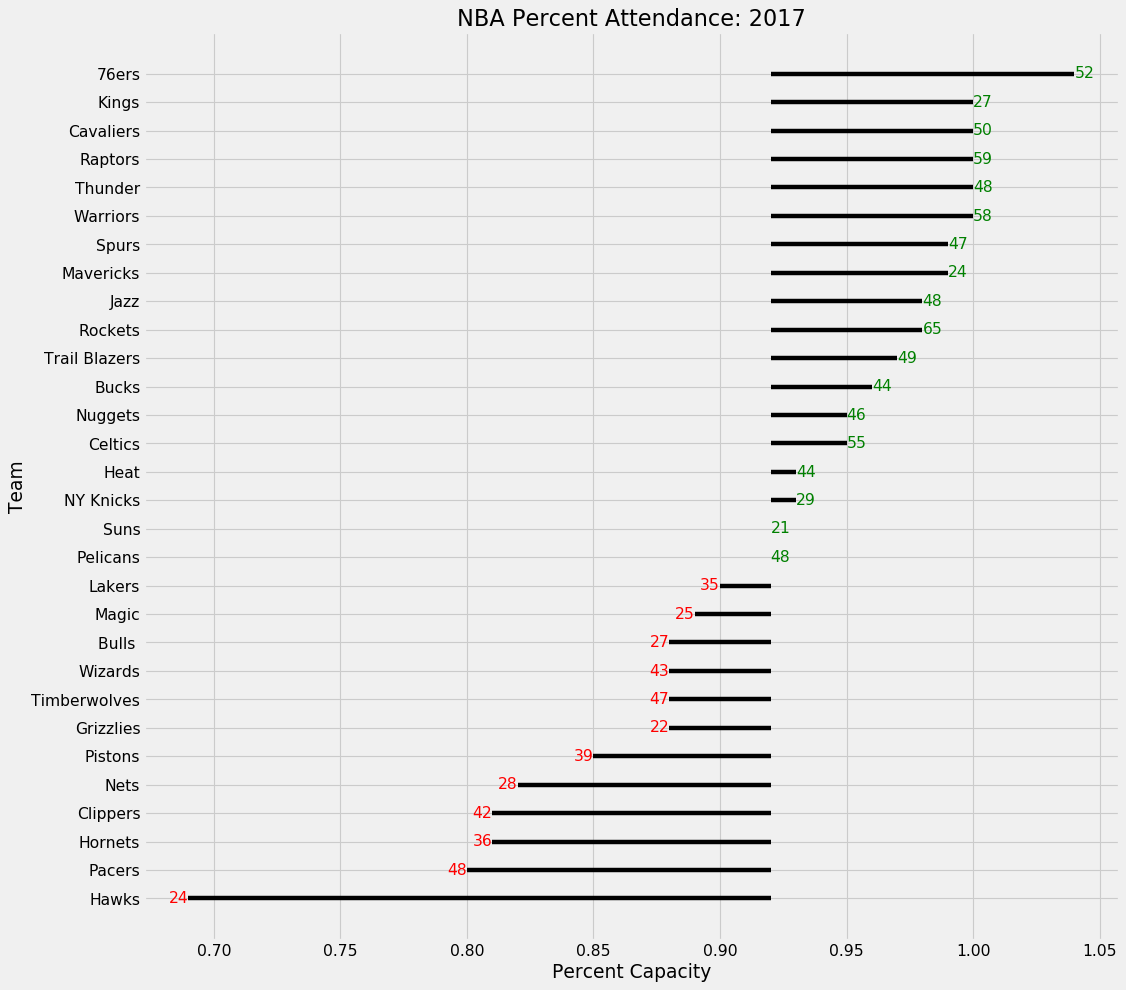

In [25]:
nba_2017.sort_values('HomePercentCapacity',inplace=True)
nba_2017.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
nba_2017['HomePercentCapacity'].mean()
plt.hlines(y=nba_2017.Team,xmin=.92,xmax=nba_2017.HomePercentCapacity)
for x, y, tex in zip(nba_2017.HomePercentCapacity, nba_2017.Team, nba_2017.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .92 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .92 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2017')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

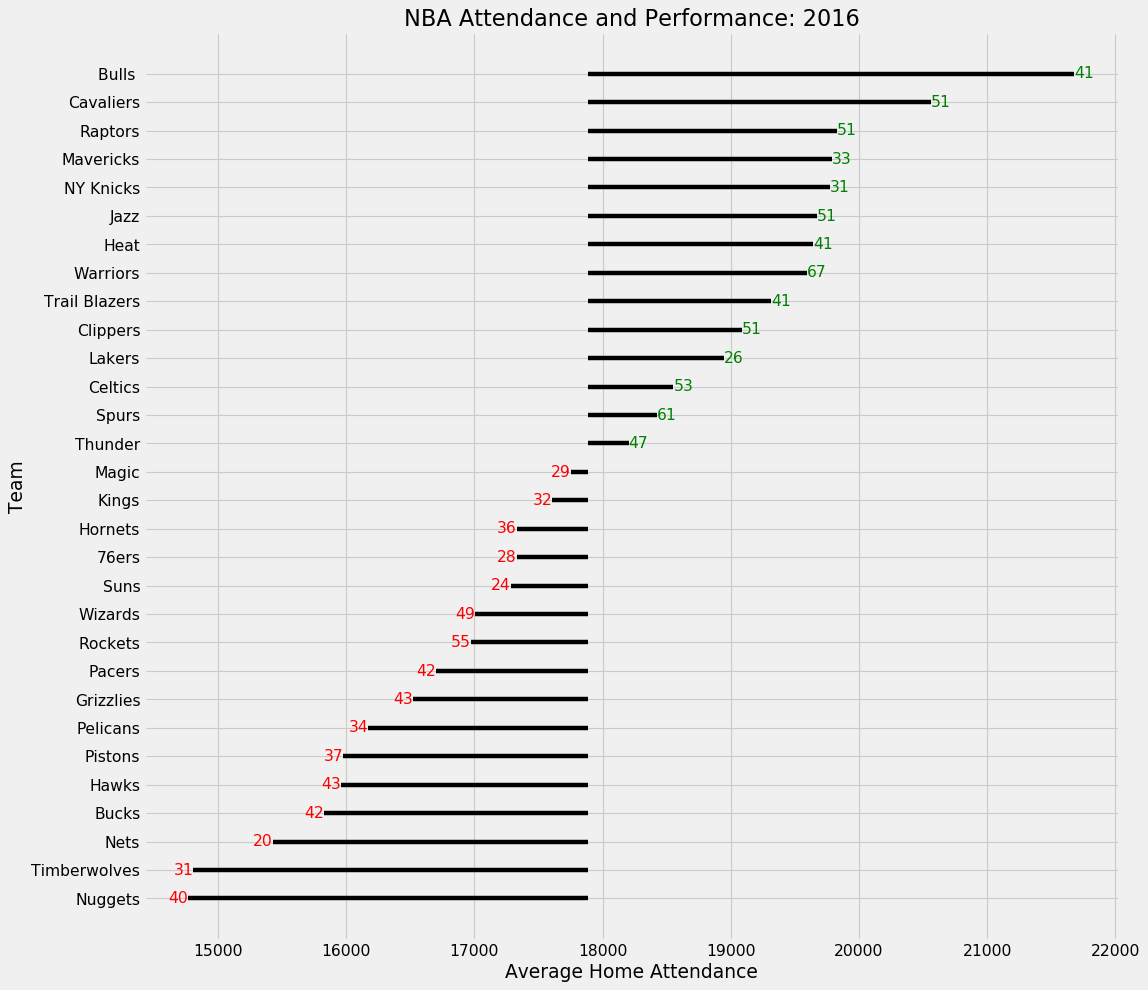

In [26]:
plt.figure(figsize=(14,14), dpi= 80)
nba_2016['HomeAvgAttendance'].mean()
plt.hlines(y=nba_2016.Team,xmin=17884,xmax=nba_2016.HomeAvgAttendance)
for x, y, tex in zip(nba_2016.HomeAvgAttendance, nba_2016.Team, nba_2016.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17884 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17884 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2016')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

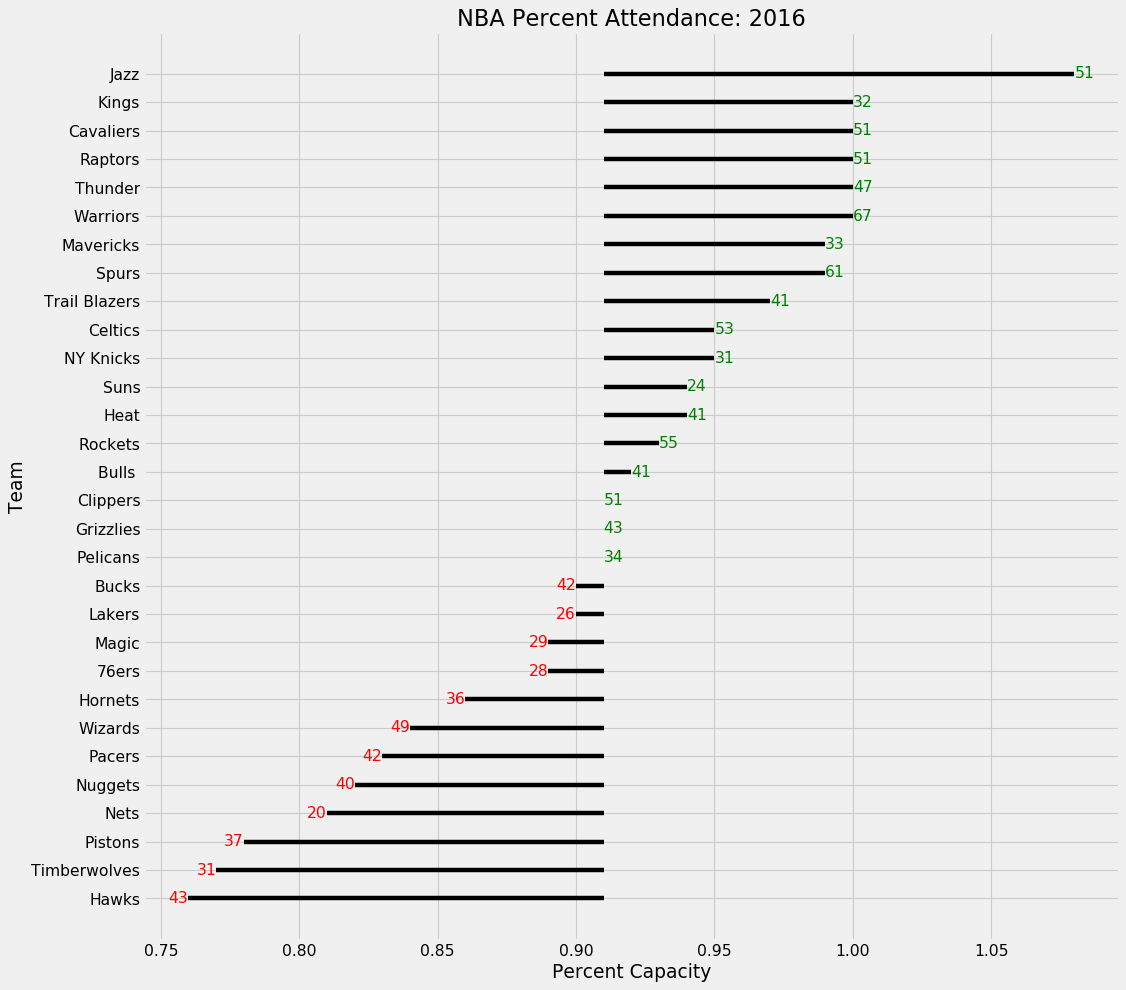

In [27]:
nba_2016.sort_values('HomePercentCapacity',inplace=True)
nba_2016.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
nba_2016['HomePercentCapacity'].mean()
plt.hlines(y=nba_2016.Team,xmin=.91,xmax=nba_2016.HomePercentCapacity)
for x, y, tex in zip(nba_2016.HomePercentCapacity, nba_2016.Team, nba_2016.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .91 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .91 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2016')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [28]:
print(nba_2015['HomeAvgAttendance'].mean())
print(nba_2015['HomePercentCapacity'].mean())

17849.033333333333
0.9113333333333336


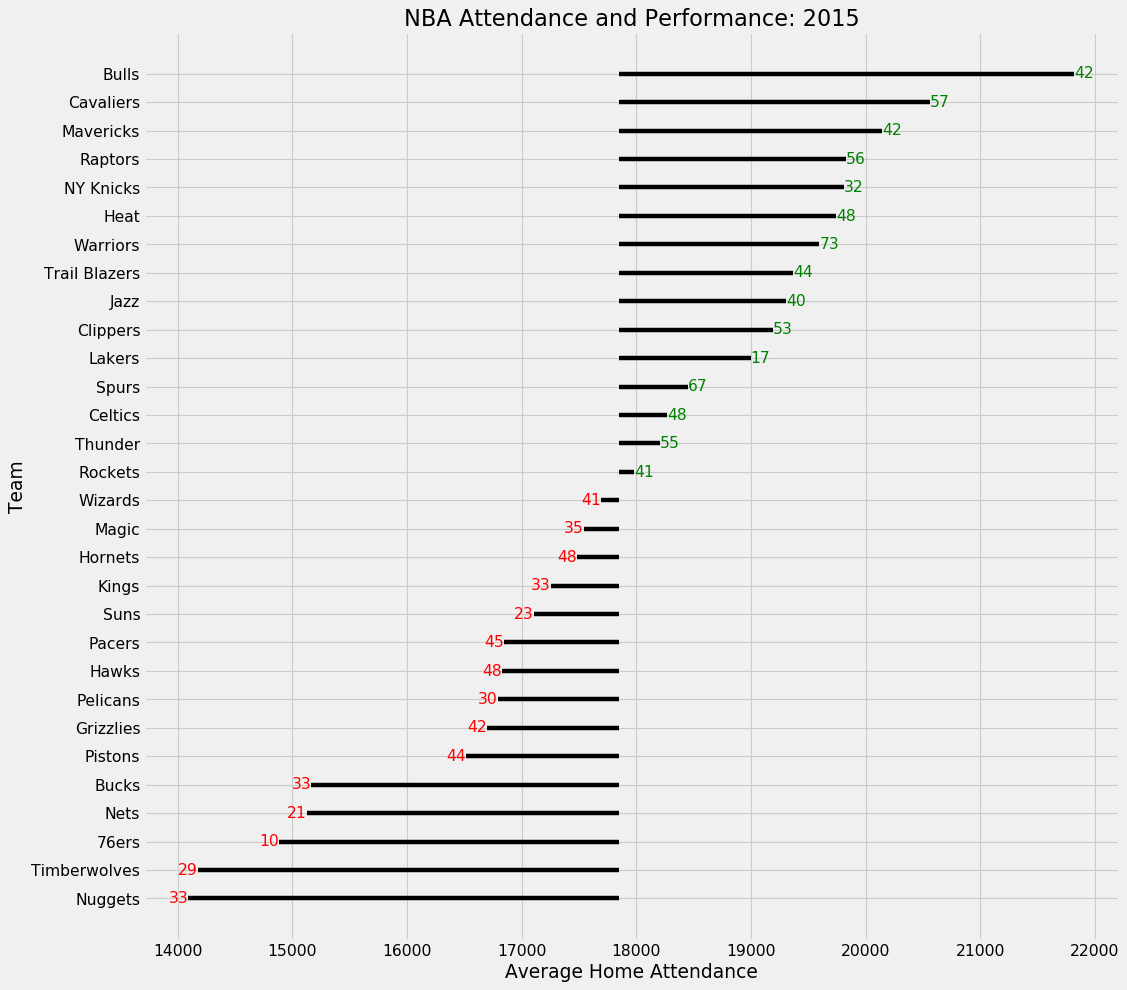

In [29]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2015.Team,xmin=17849,xmax=nba_2015.HomeAvgAttendance)
for x, y, tex in zip(nba_2015.HomeAvgAttendance, nba_2015.Team, nba_2015.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17849 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17849 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2015')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

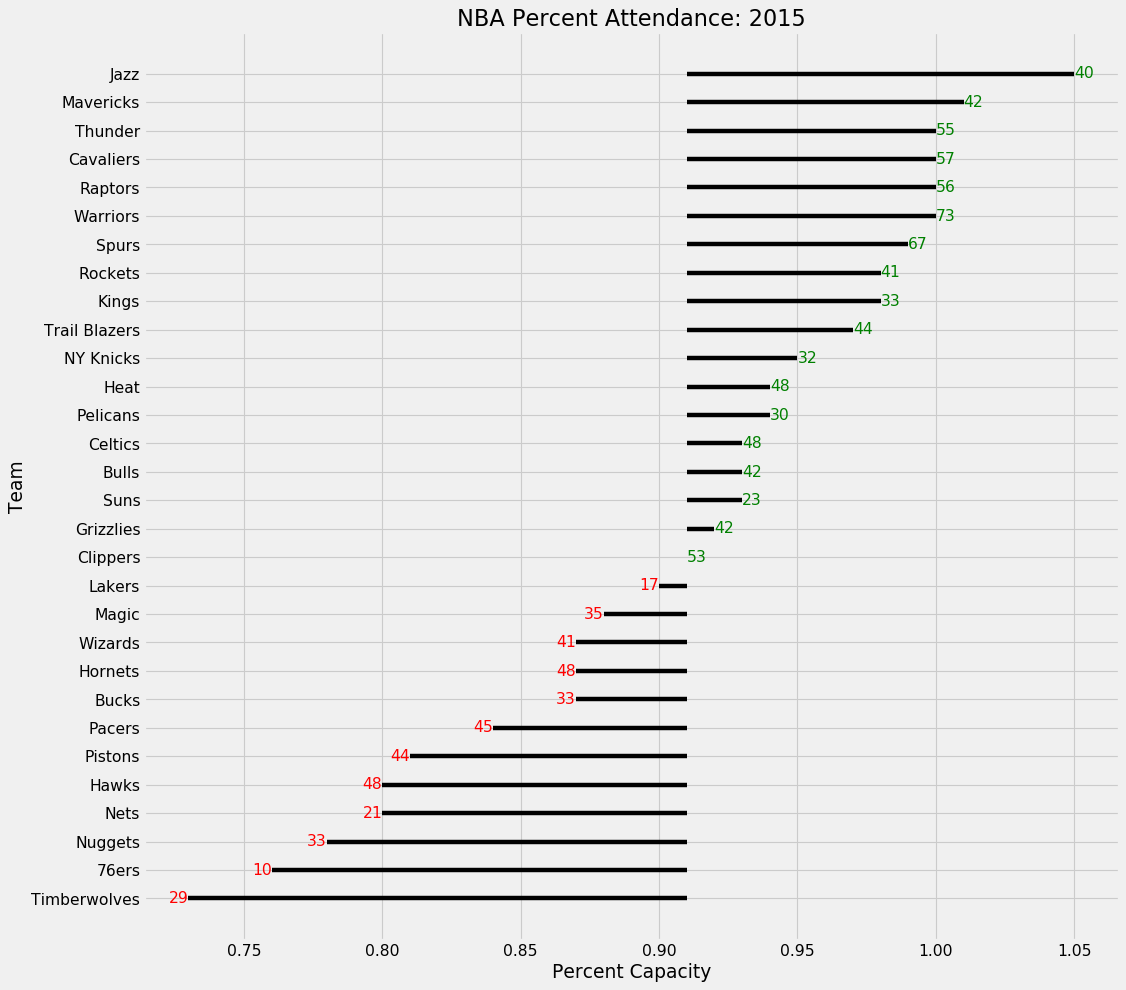

In [30]:
nba_2015.sort_values('HomePercentCapacity',inplace=True)
nba_2015.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2015.Team,xmin=.91,xmax=nba_2015.HomePercentCapacity)
for x, y, tex in zip(nba_2015.HomePercentCapacity, nba_2015.Team, nba_2015.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .91 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .91 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2015')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [31]:
print(nba_2014['HomeAvgAttendance'].mean())
print(nba_2014['HomePercentCapacity'].mean())

17808.9
0.910666666666667


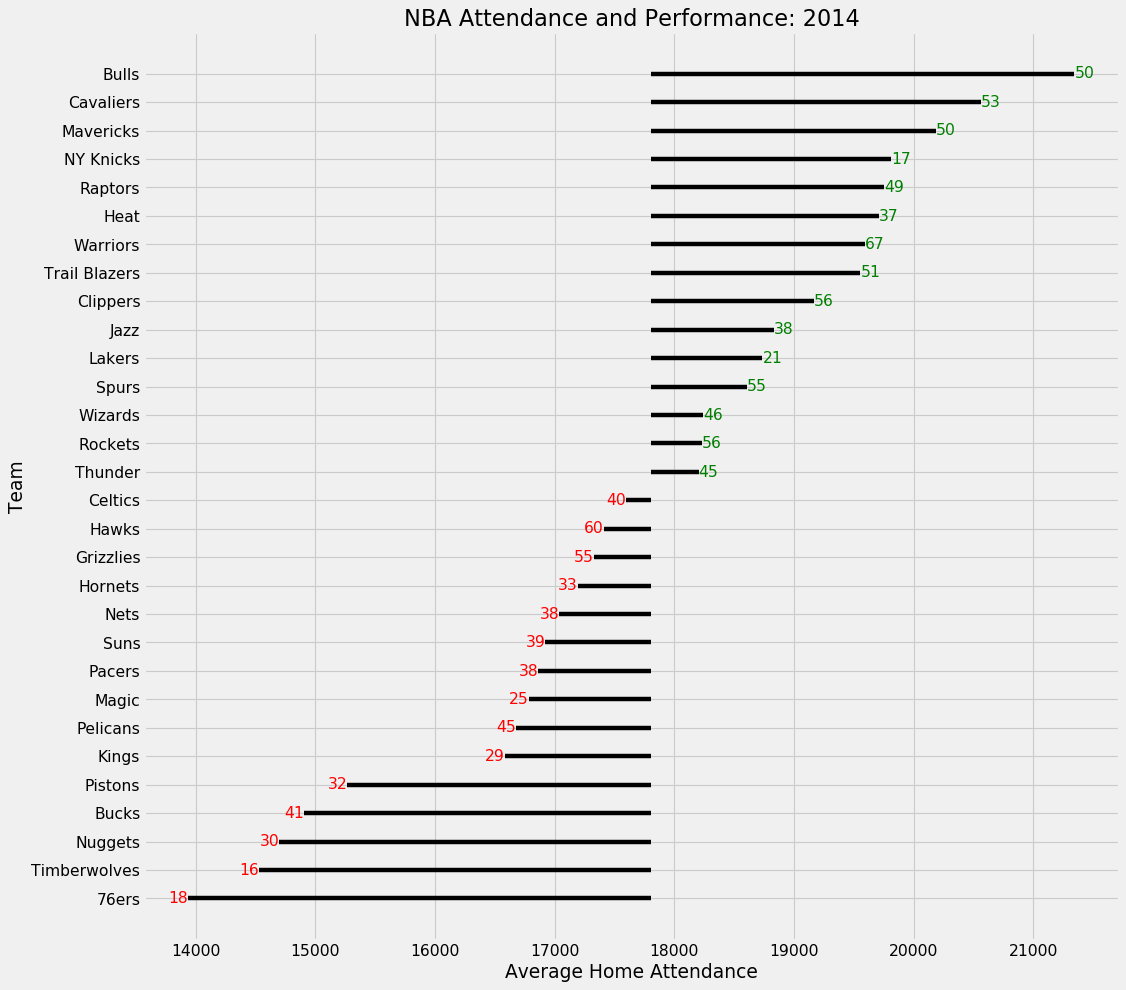

In [32]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2014.Team,xmin=17808,xmax=nba_2014.HomeAvgAttendance)
for x, y, tex in zip(nba_2014.HomeAvgAttendance, nba_2014.Team, nba_2014.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17808 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17808 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2014')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

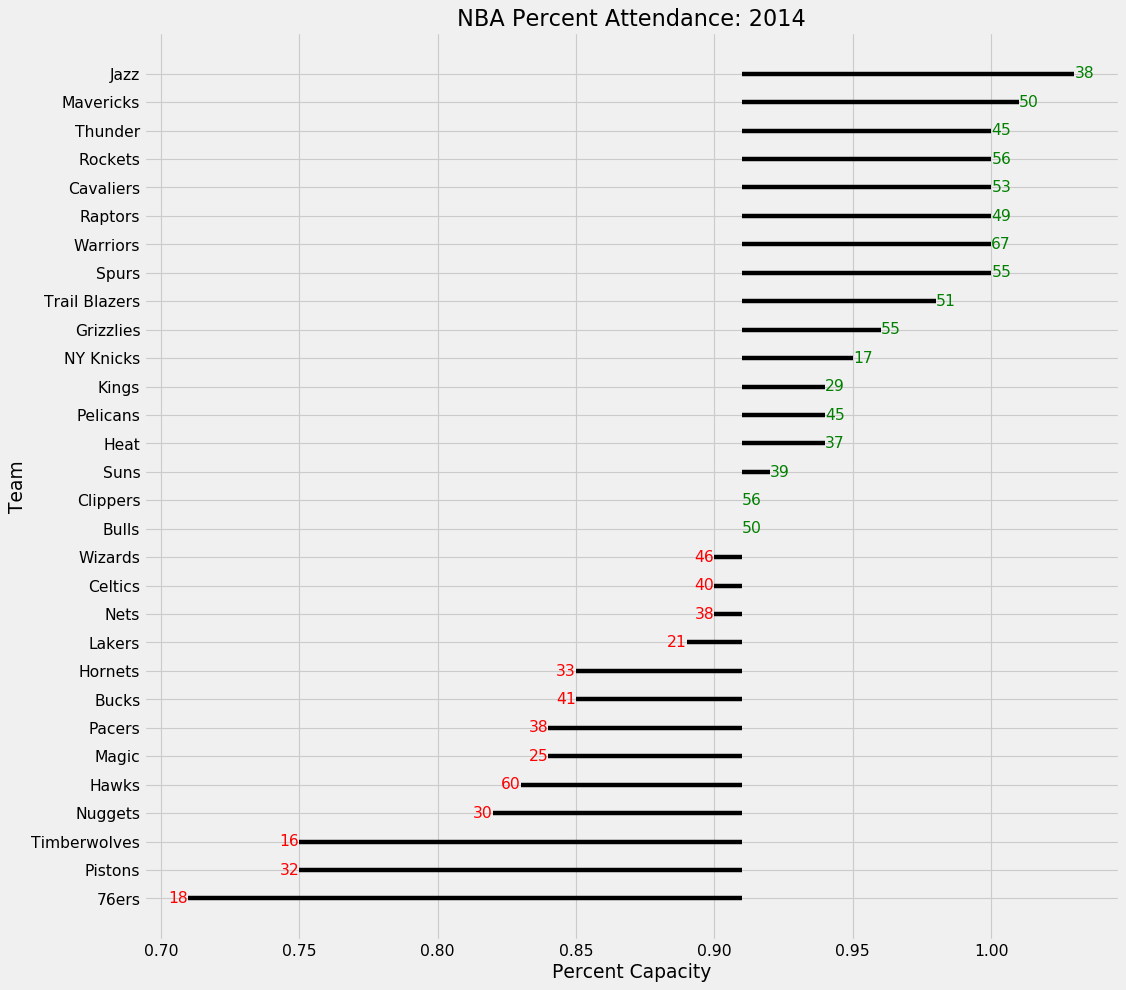

In [33]:
nba_2014.sort_values('HomePercentCapacity',inplace=True)
nba_2014.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2014.Team,xmin=.91,xmax=nba_2014.HomePercentCapacity)
for x, y, tex in zip(nba_2014.HomePercentCapacity, nba_2014.Team, nba_2014.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .91 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .91 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2014')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [34]:
print(nba_2013['HomeAvgAttendance'].mean())
print(nba_2013['HomePercentCapacity'].mean())

17407.3
0.8893333333333334


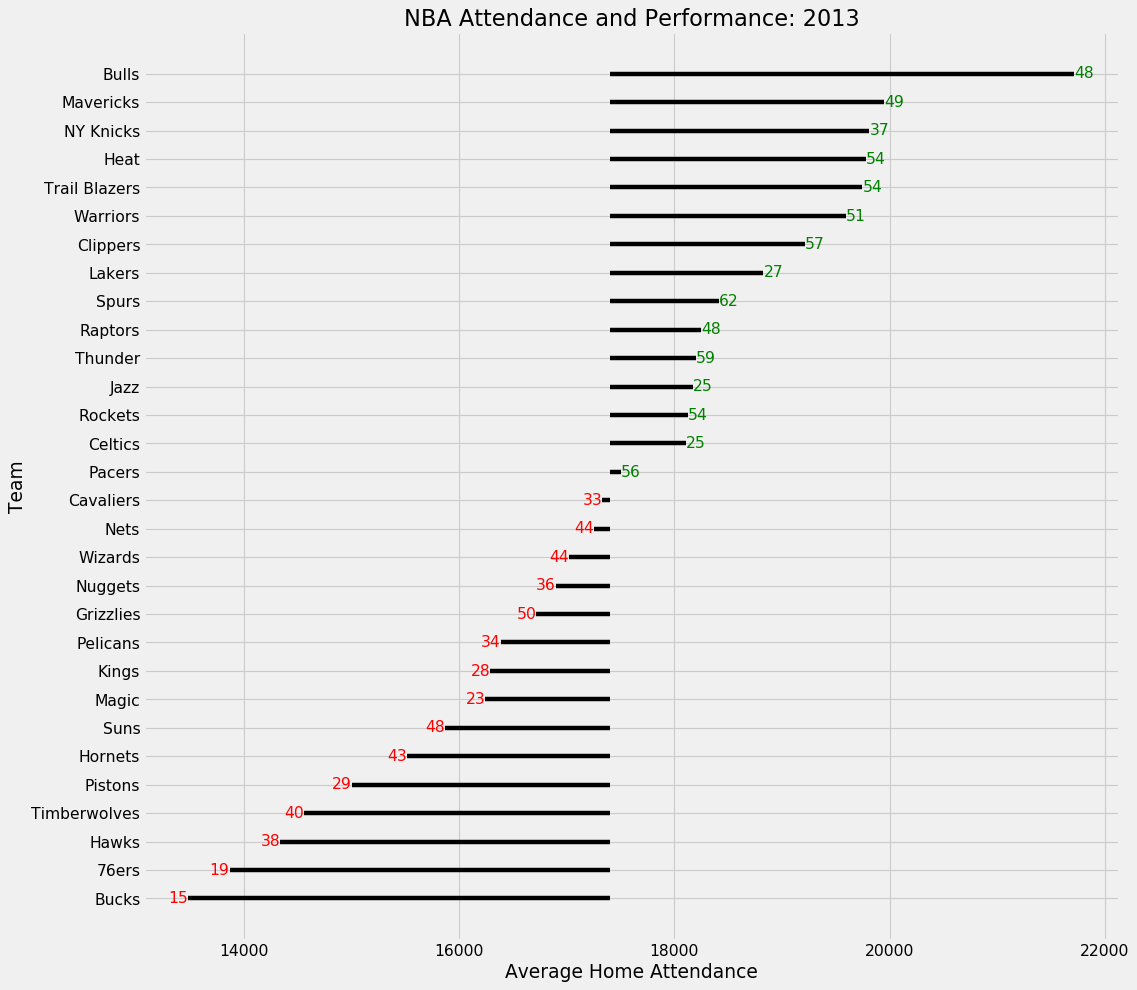

In [35]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2013.Team,xmin=17407,xmax=nba_2013.HomeAvgAttendance)
for x, y, tex in zip(nba_2013.HomeAvgAttendance, nba_2013.Team, nba_2013.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17407 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17407 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2013')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

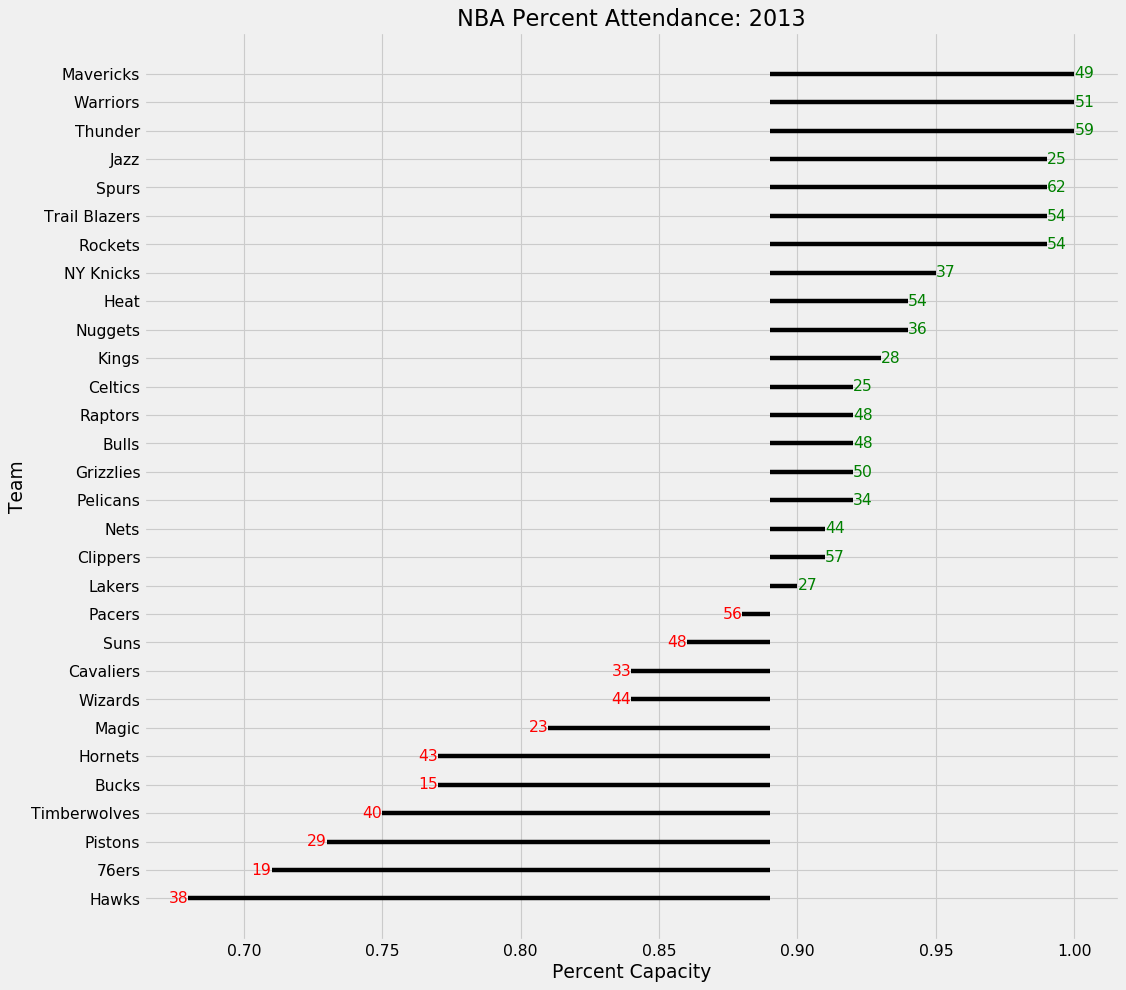

In [36]:
nba_2013.sort_values('HomePercentCapacity',inplace=True)
nba_2013.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2013.Team,xmin=.89,xmax=nba_2013.HomePercentCapacity)
for x, y, tex in zip(nba_2013.HomePercentCapacity, nba_2013.Team, nba_2013.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .89 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .89 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2013')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [37]:
print(nba_2012['HomeAvgAttendance'].mean())
print(nba_2012['HomePercentCapacity'].mean())

17348.2
0.8863333333333335


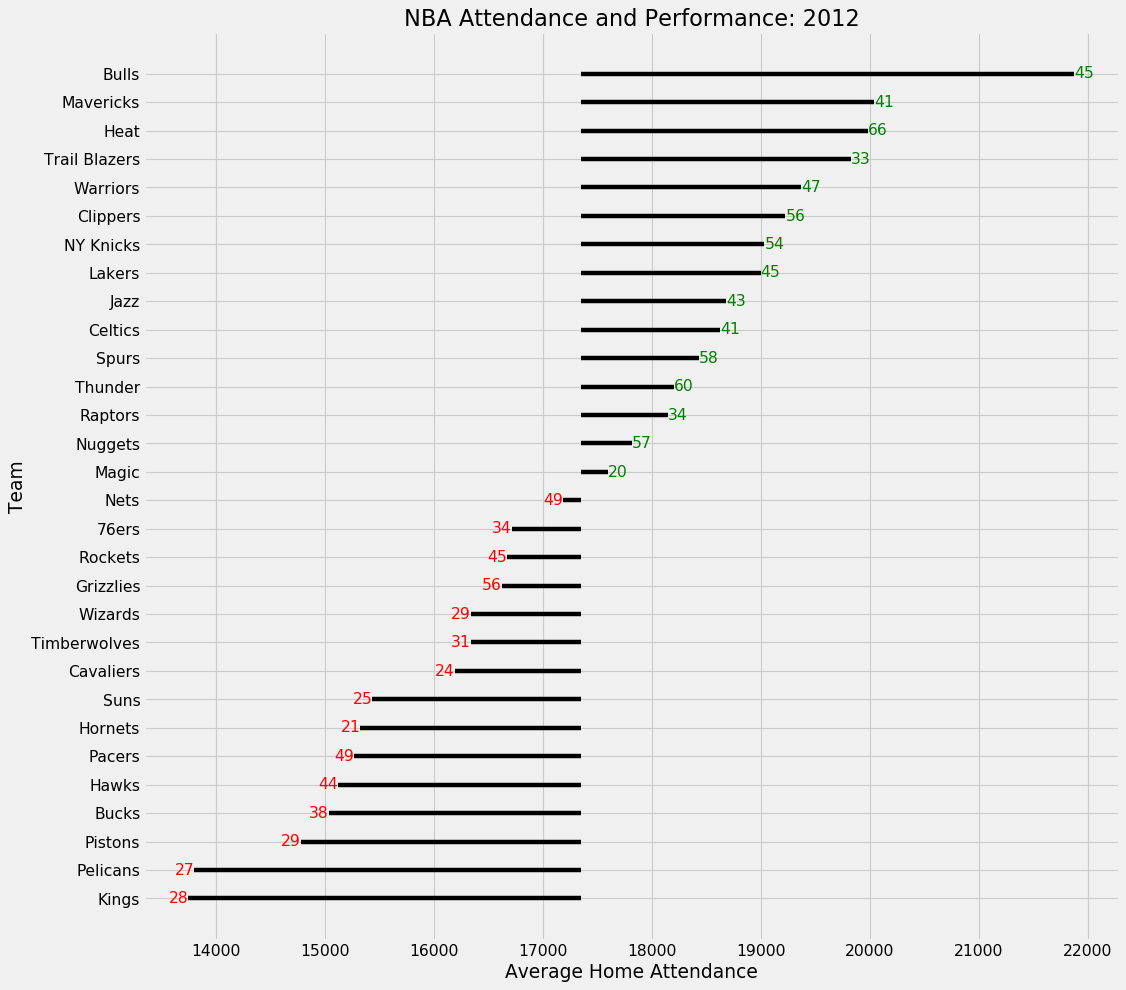

In [38]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2012.Team,xmin=17348,xmax=nba_2012.HomeAvgAttendance)
for x, y, tex in zip(nba_2012.HomeAvgAttendance, nba_2012.Team, nba_2012.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17348 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17348 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2012')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

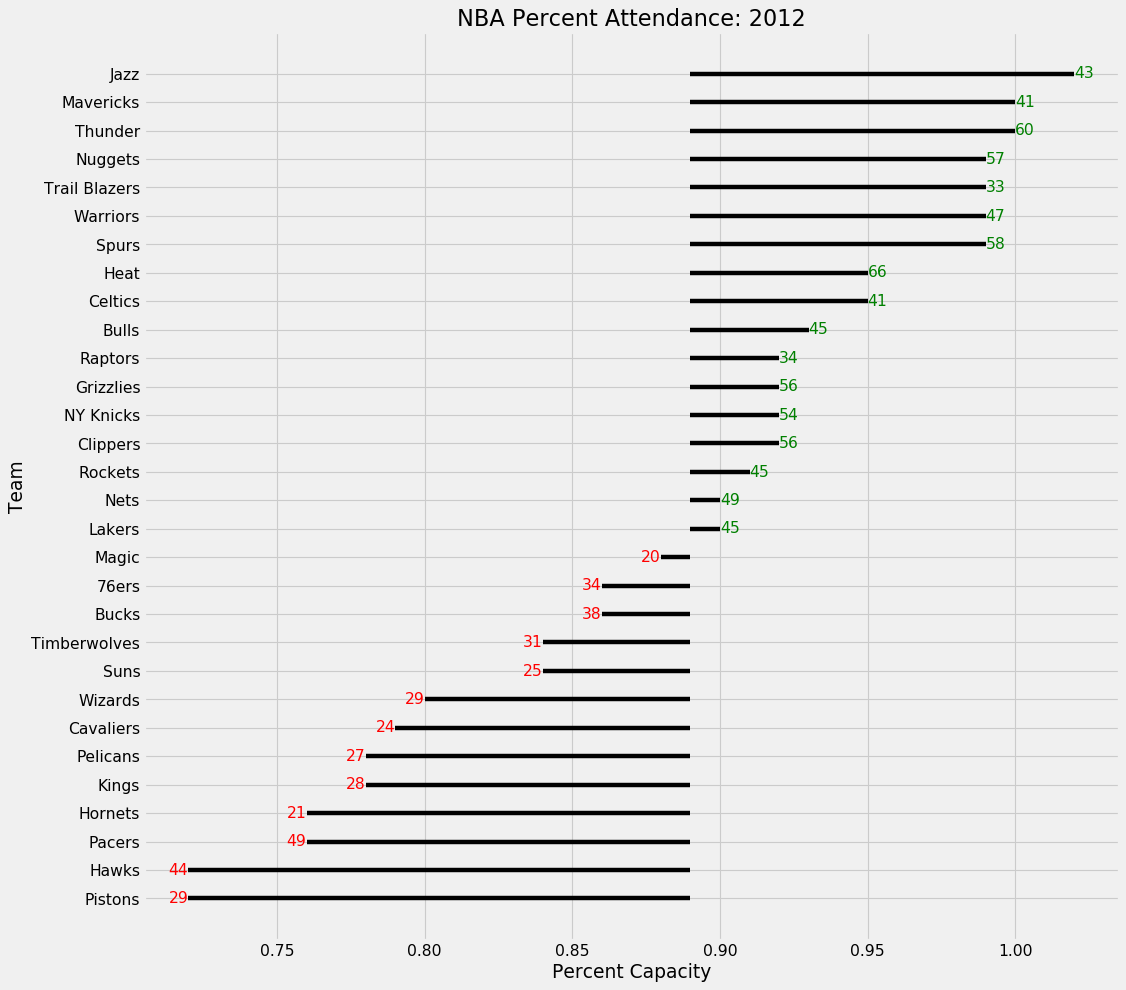

In [39]:
nba_2012.sort_values('HomePercentCapacity',inplace=True)
nba_2012.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2012.Team,xmin=.89,xmax=nba_2012.HomePercentCapacity)
for x, y, tex in zip(nba_2012.HomePercentCapacity, nba_2012.Team, nba_2012.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .89 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .89 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2012')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [40]:
print(nba_2011['HomeAvgAttendance'].mean())
print(nba_2011['HomePercentCapacity'].mean())

17273.133333333335
0.8816666666666667


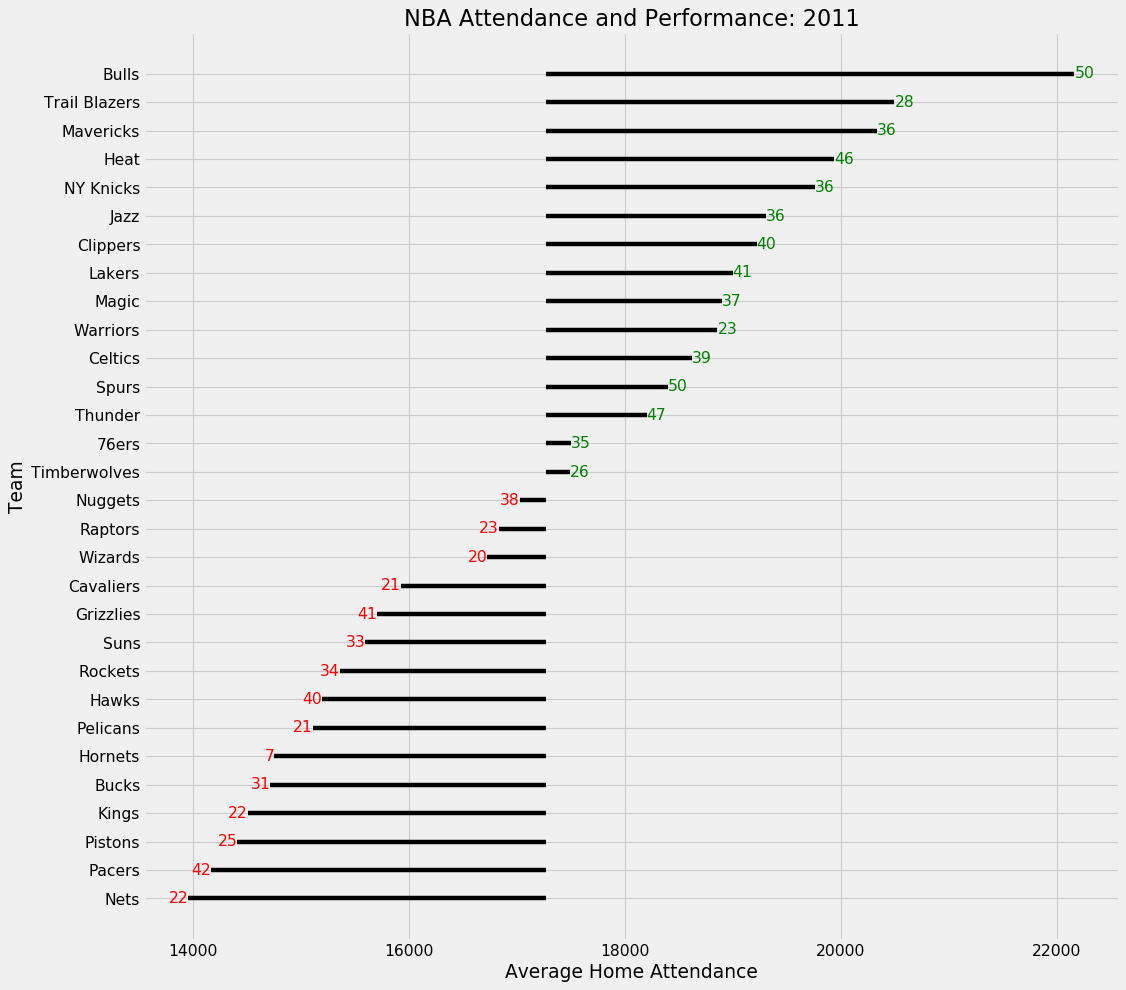

In [41]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2011.Team,xmin=17273,xmax=nba_2011.HomeAvgAttendance)
for x, y, tex in zip(nba_2011.HomeAvgAttendance, nba_2011.Team, nba_2011.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17273 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17273 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2011')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

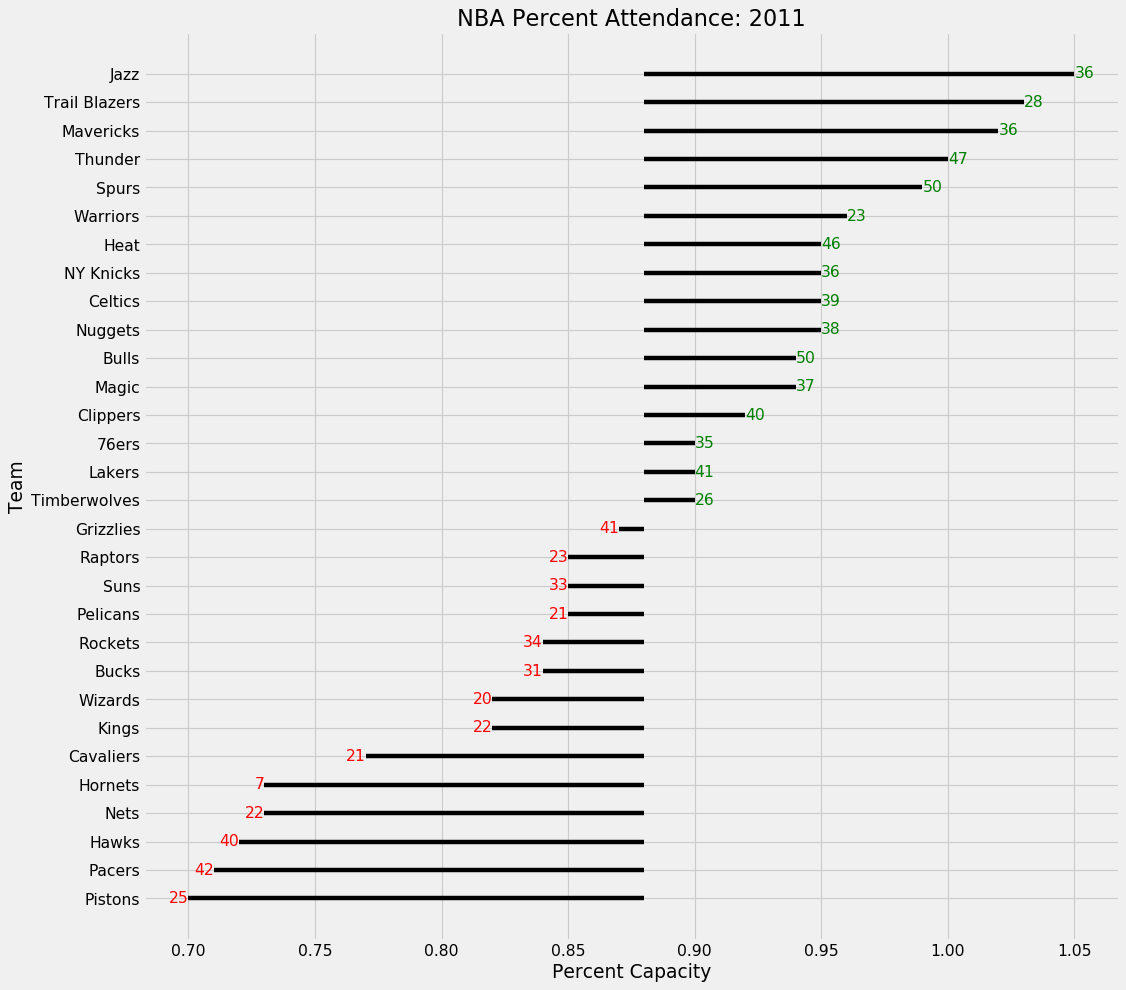

In [42]:
nba_2011.sort_values('HomePercentCapacity',inplace=True)
nba_2011.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2011.Team,xmin=.88,xmax=nba_2011.HomePercentCapacity)
for x, y, tex in zip(nba_2011.HomePercentCapacity, nba_2011.Team, nba_2011.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .88 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .88 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2011')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [43]:
print(nba_2010['HomeAvgAttendance'].mean())
print(nba_2010['HomePercentCapacity'].mean())

17318.7
0.8849999999999998


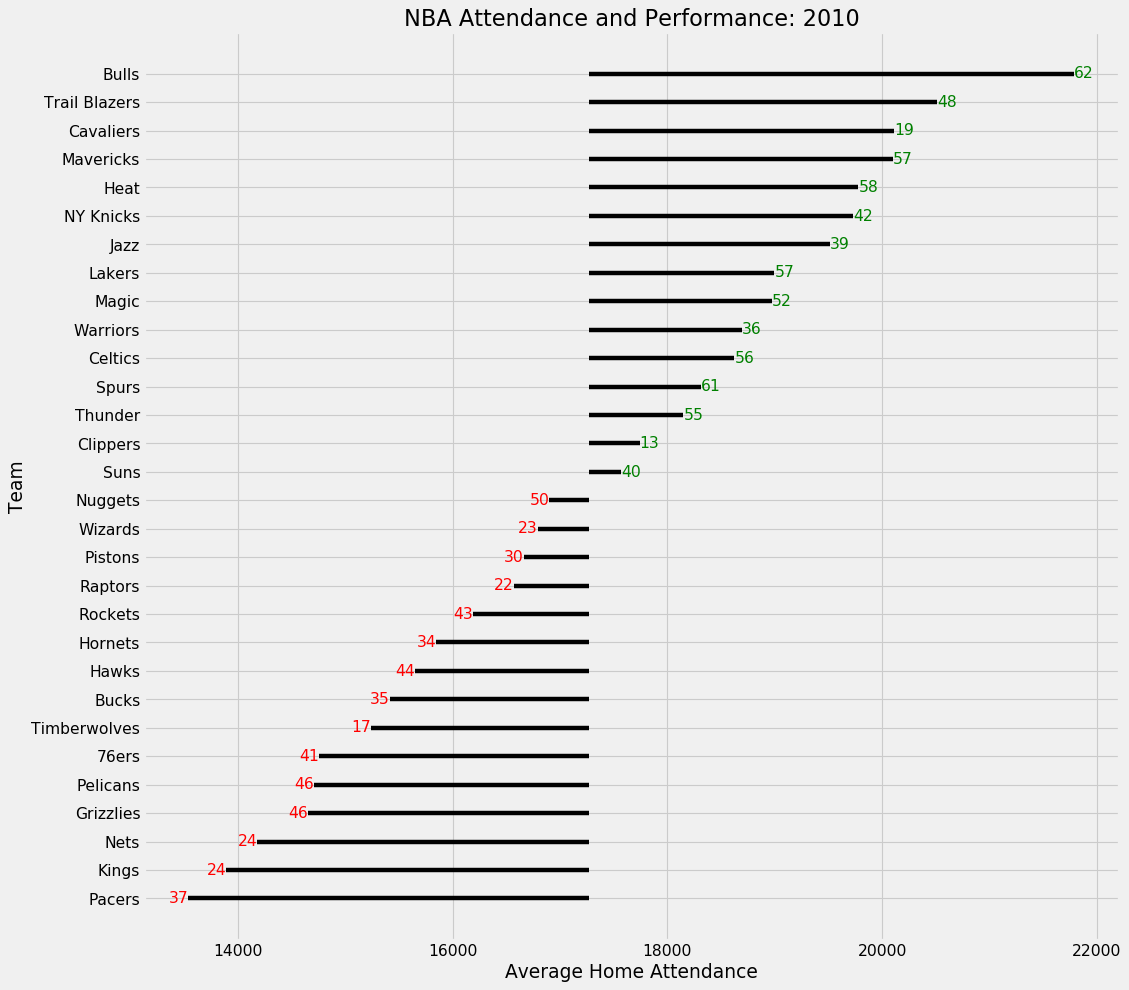

In [44]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2010.Team,xmin=17273,xmax=nba_2010.HomeAvgAttendance)
for x, y, tex in zip(nba_2010.HomeAvgAttendance, nba_2010.Team, nba_2010.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17318 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17318 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2010')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

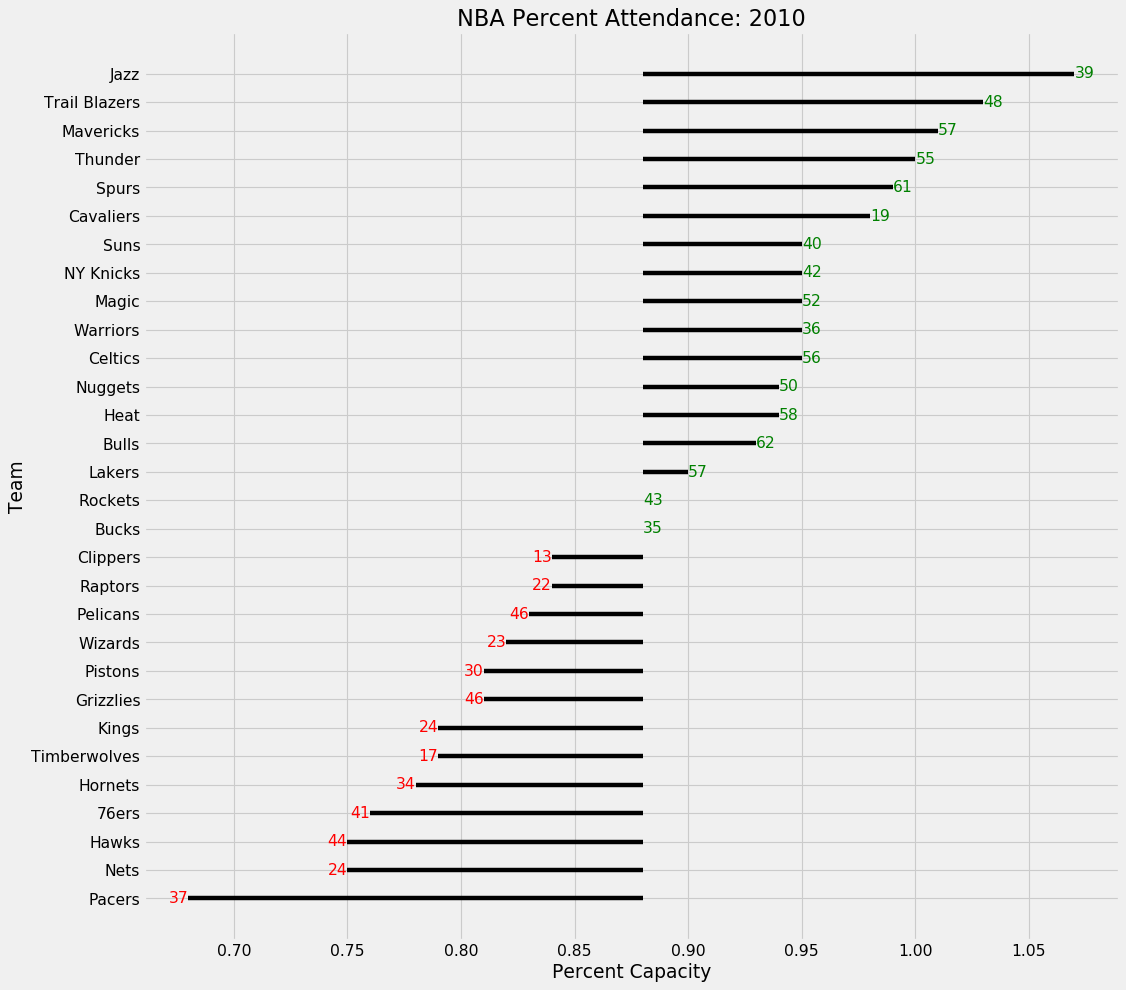

In [45]:
nba_2010.sort_values('HomePercentCapacity',inplace=True)
nba_2010.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2010.Team,xmin=.88,xmax=nba_2010.HomePercentCapacity)
for x, y, tex in zip(nba_2010.HomePercentCapacity, nba_2010.Team, nba_2010.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .88 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .88 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2010')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [46]:
print(nba_2009['HomeAvgAttendance'].mean())
print(nba_2009['HomePercentCapacity'].mean())

17149.166666666668
0.8756666666666669


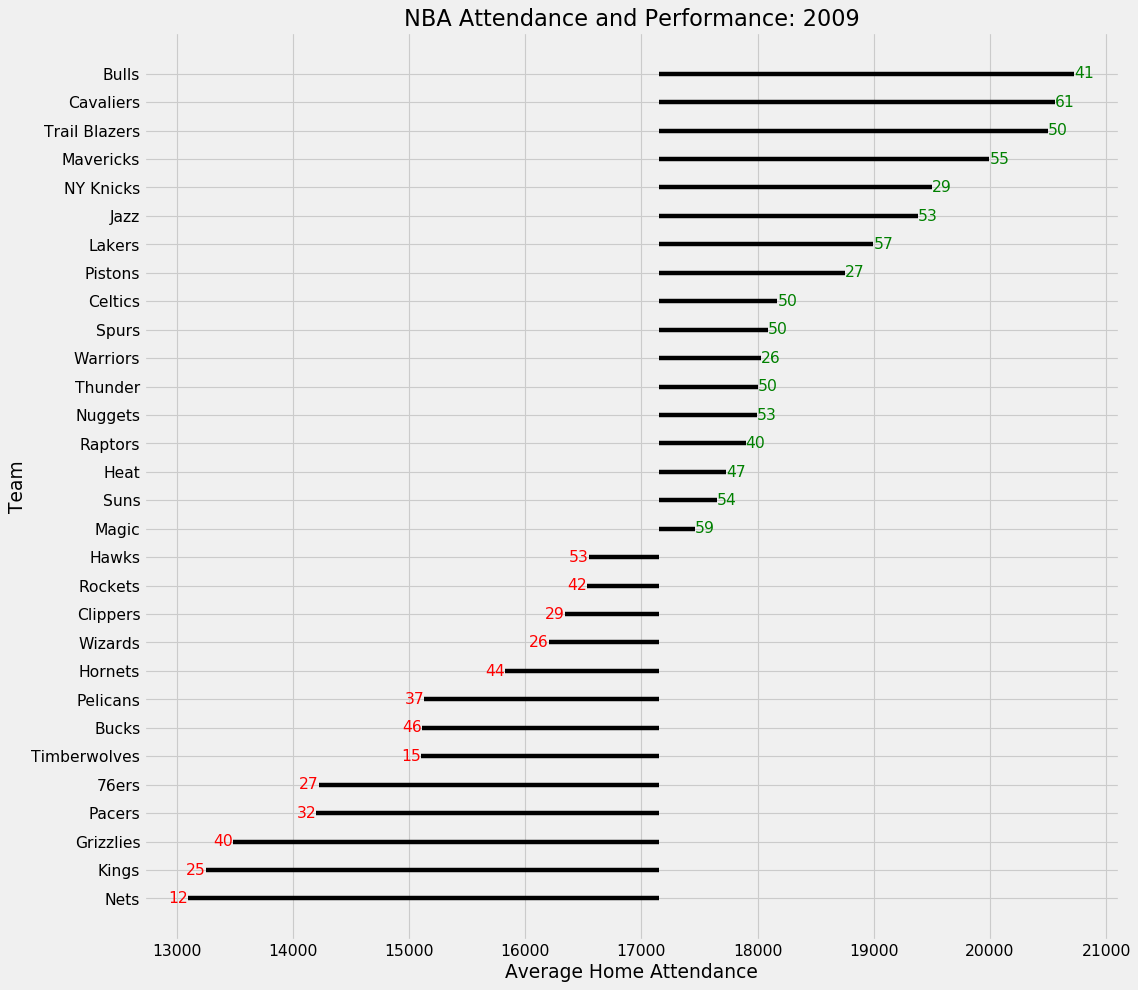

In [47]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2009.Team,xmin=17149,xmax=nba_2009.HomeAvgAttendance)
for x, y, tex in zip(nba_2009.HomeAvgAttendance, nba_2009.Team, nba_2009.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17149 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17149 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2009')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

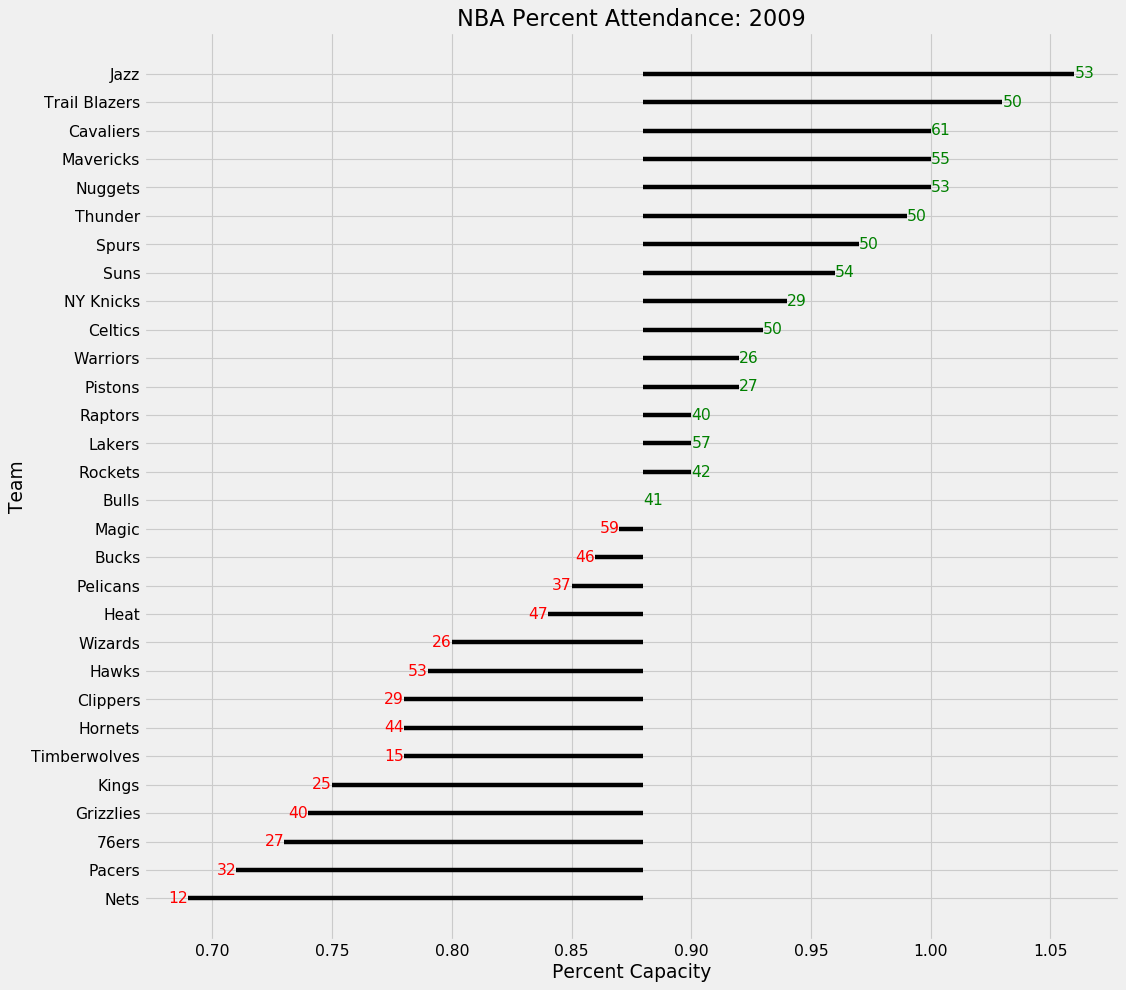

In [48]:
nba_2009.sort_values('HomePercentCapacity',inplace=True)
nba_2009.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2009.Team,xmin=.88,xmax=nba_2009.HomePercentCapacity)
for x, y, tex in zip(nba_2009.HomePercentCapacity, nba_2009.Team, nba_2009.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .88 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .88 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2009')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [49]:
print(nba_2008['HomeAvgAttendance'].mean())
print(nba_2008['HomePercentCapacity'].mean())

17496.733333333334
0.8943333333333333


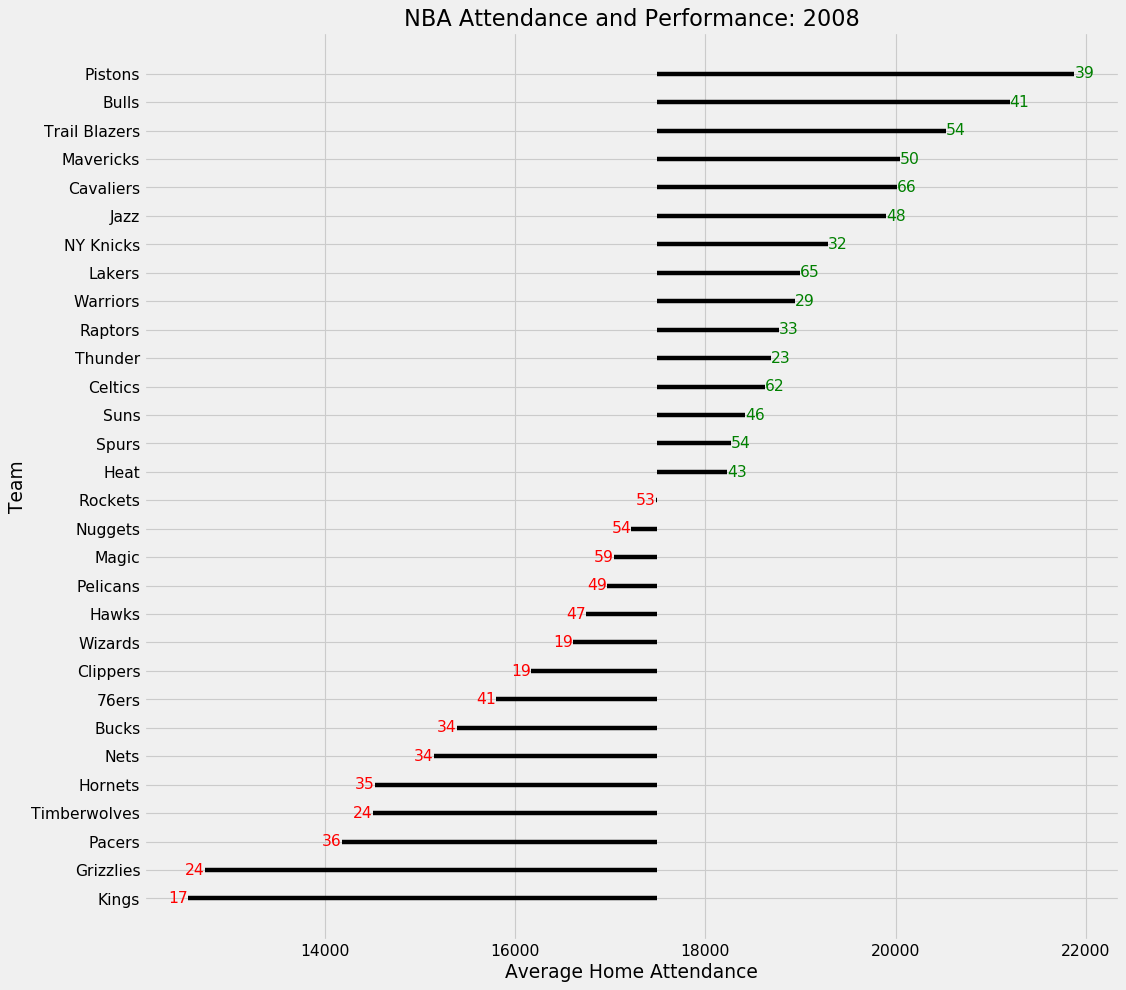

In [50]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2008.Team,xmin=17497,xmax=nba_2008.HomeAvgAttendance)
for x, y, tex in zip(nba_2008.HomeAvgAttendance, nba_2008.Team, nba_2008.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17497 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17497 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2008')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

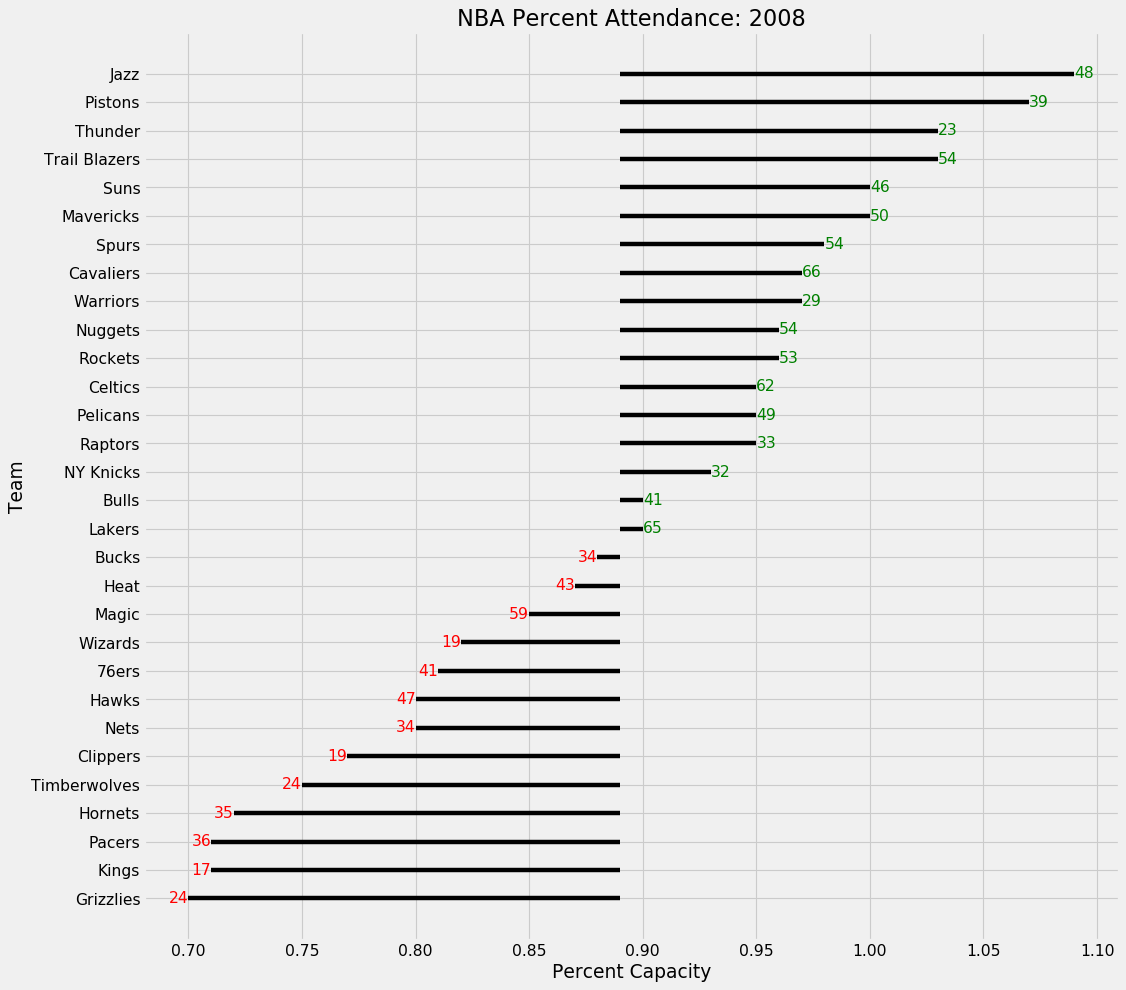

In [51]:
nba_2008.sort_values('HomePercentCapacity',inplace=True)
nba_2008.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2008.Team,xmin=.89,xmax=nba_2008.HomePercentCapacity)
for x, y, tex in zip(nba_2008.HomePercentCapacity, nba_2008.Team, nba_2008.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .89 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .89 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2008')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [52]:
print(nba_2007['HomeAvgAttendance'].mean())
print(nba_2007['HomePercentCapacity'].mean())

17394.366666666665
0.8873333333333336


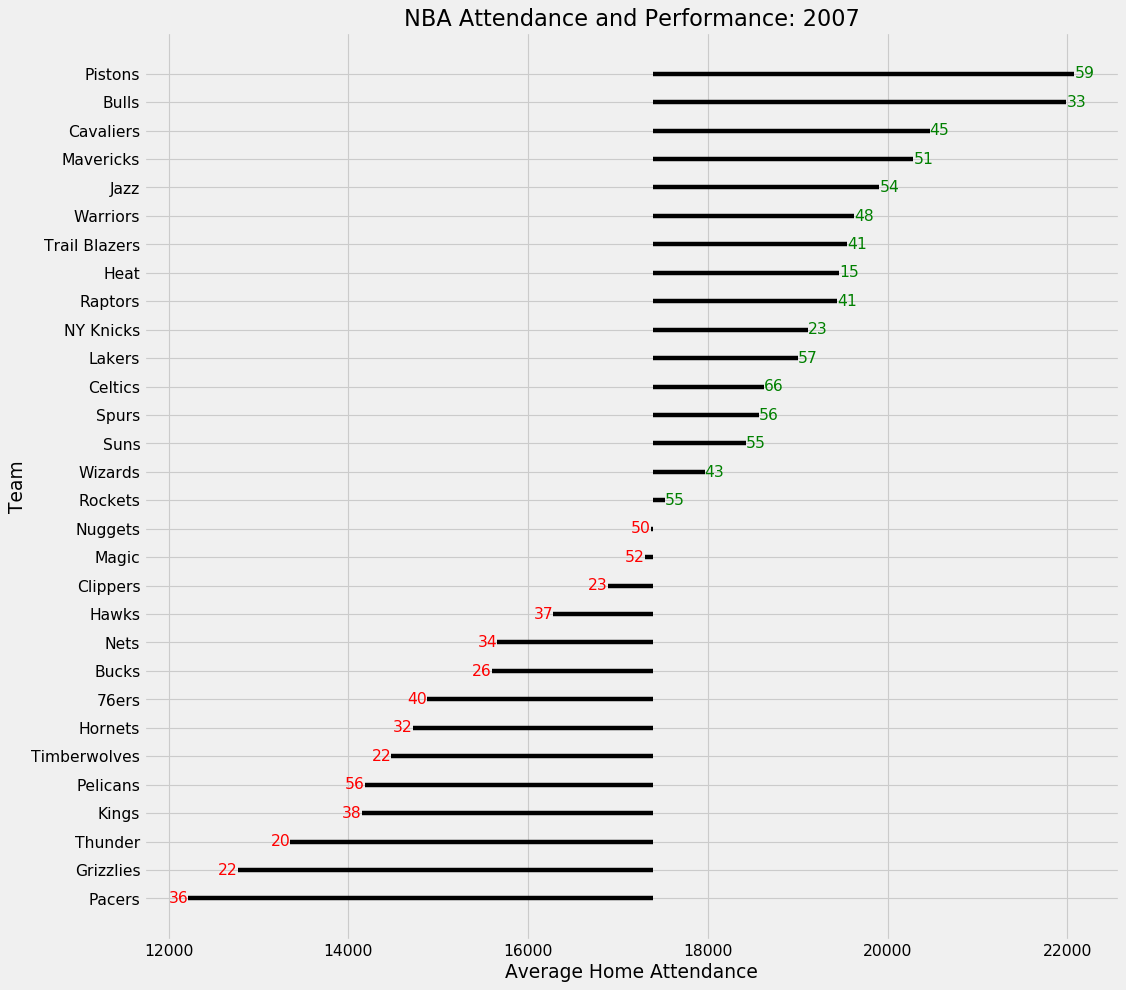

In [53]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2007.Team,xmin=17394,xmax=nba_2007.HomeAvgAttendance)
for x, y, tex in zip(nba_2007.HomeAvgAttendance, nba_2007.Team, nba_2007.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17394 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17394 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2007')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

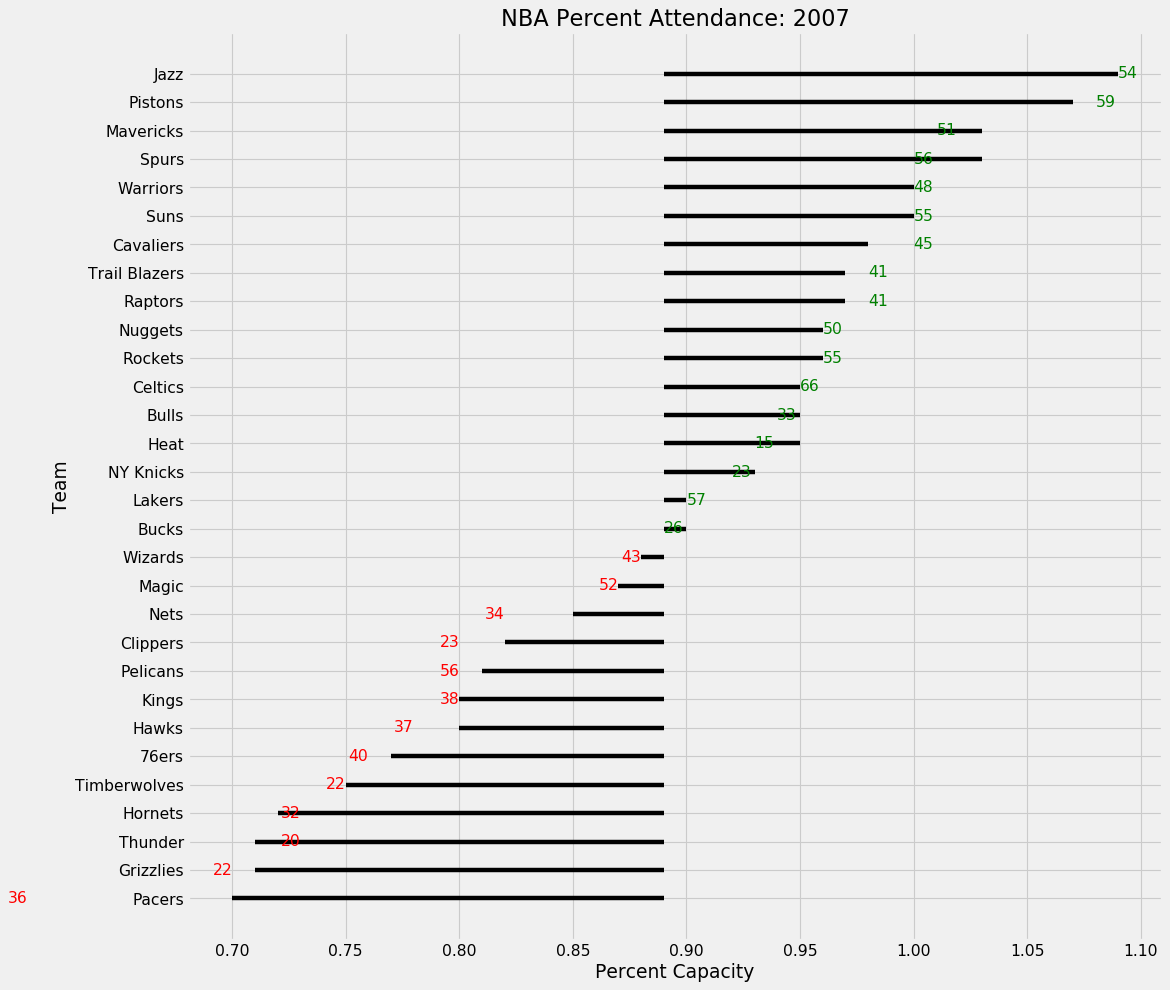

In [54]:
nba_2007.sort_values('HomePercentCapacity',inplace=True)
nba_2007.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2007.Team,xmin=.89,xmax=nba_2008.HomePercentCapacity)
for x, y, tex in zip(nba_2007.HomePercentCapacity, nba_2007.Team, nba_2007.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .89 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .89 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2007')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [55]:
print(nba_2006['HomeAvgAttendance'].mean())
print(nba_2006['HomePercentCapacity'].mean())

17756.9
0.907


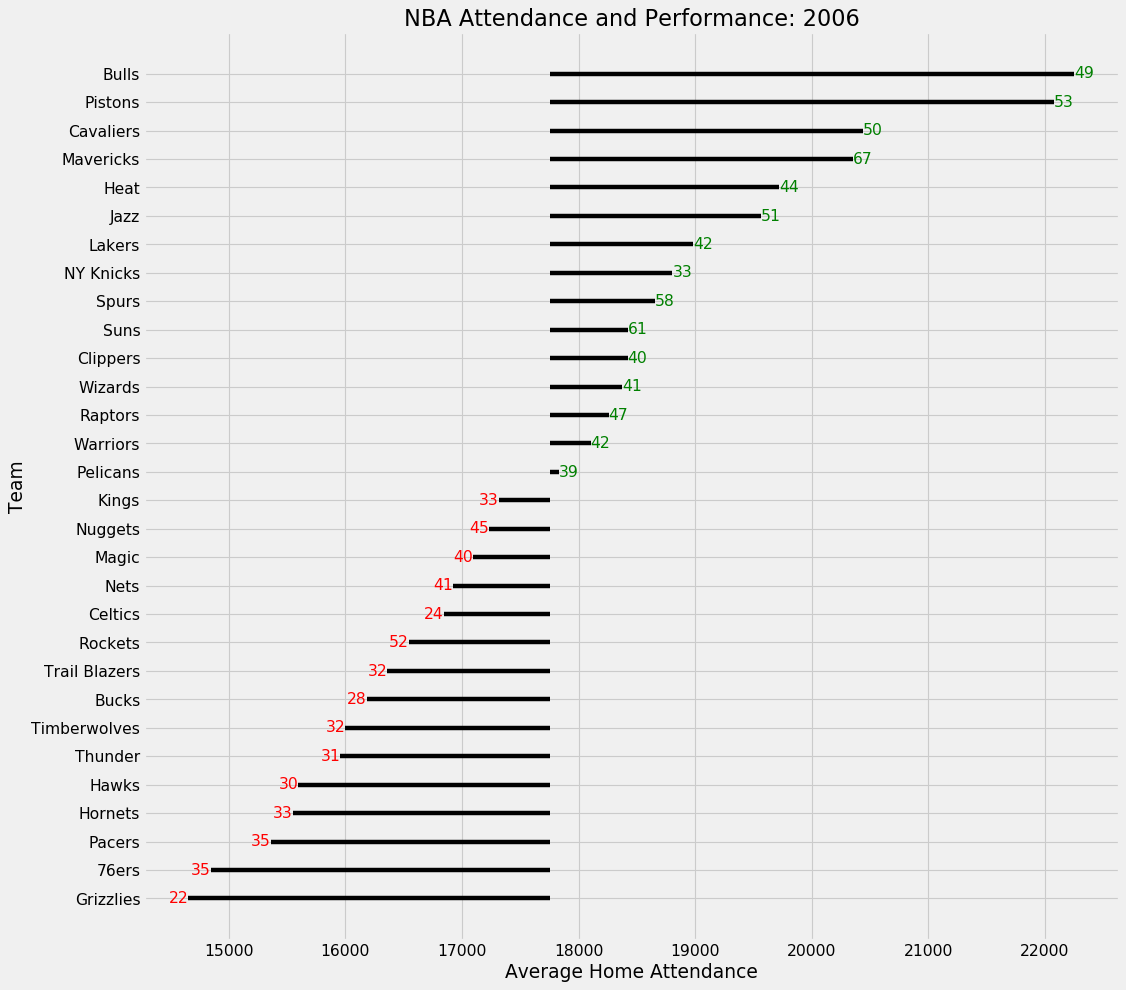

In [56]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2006.Team,xmin=17757,xmax=nba_2006.HomeAvgAttendance)
for x, y, tex in zip(nba_2006.HomeAvgAttendance, nba_2006.Team, nba_2006.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17757 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17757 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2006')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

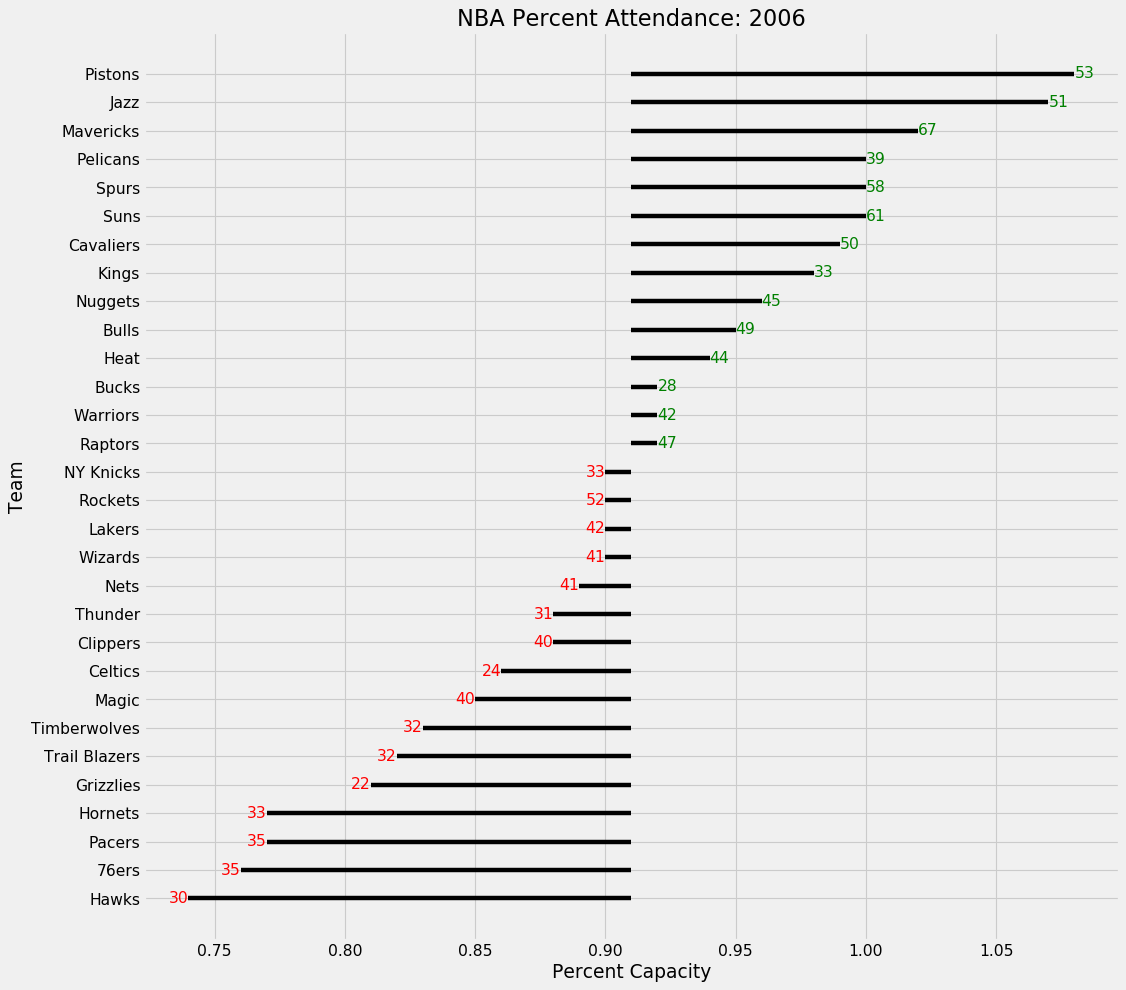

In [57]:
nba_2006.sort_values('HomePercentCapacity',inplace=True)
nba_2006.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2006.Team,xmin=.91,xmax=nba_2006.HomePercentCapacity)
for x, y, tex in zip(nba_2006.HomePercentCapacity, nba_2006.Team, nba_2006.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .91 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .91 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2006')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [58]:
print(nba_2005['HomeAvgAttendance'].mean())
print(nba_2005['HomePercentCapacity'].mean())

17557.033333333333
0.898


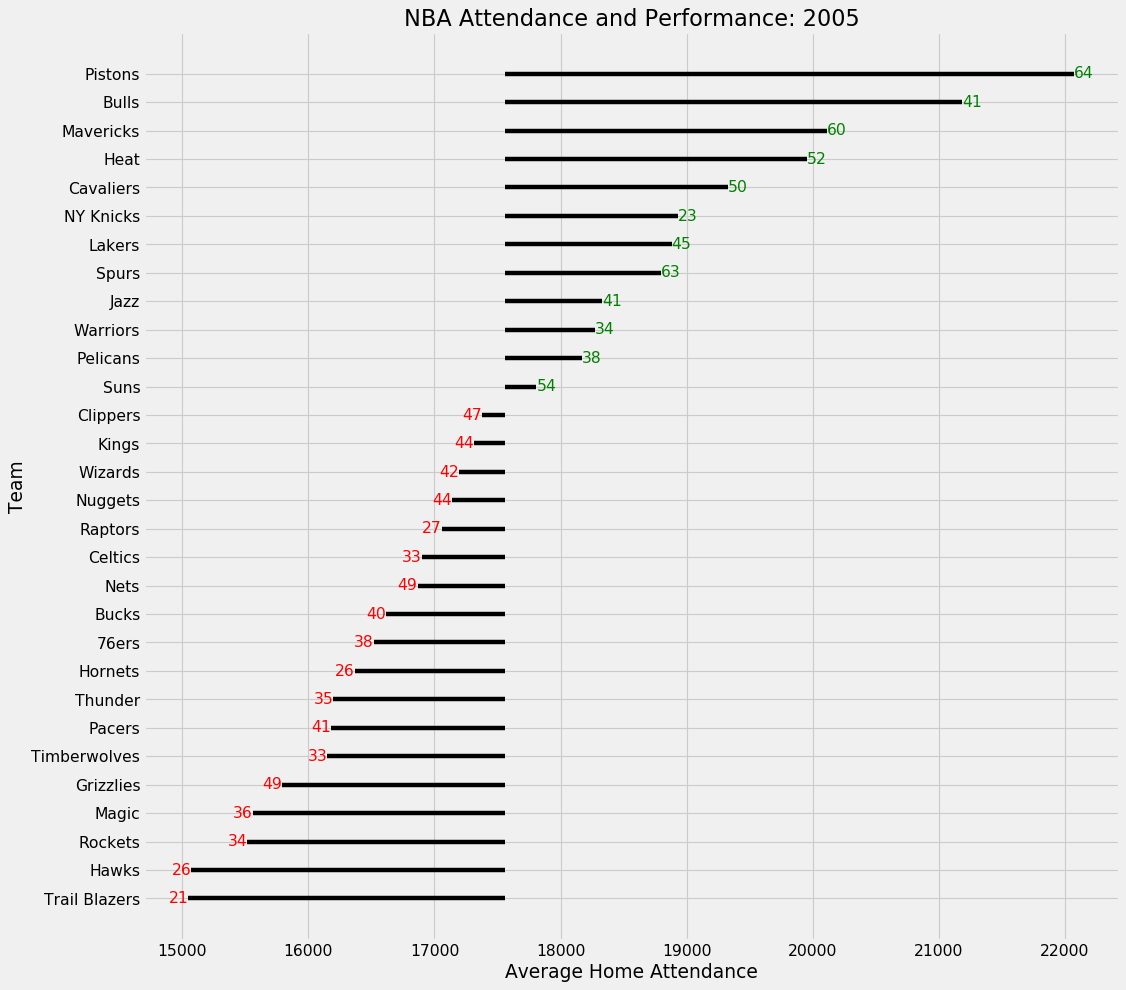

In [59]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2005.Team,xmin=17557,xmax=nba_2005.HomeAvgAttendance)
for x, y, tex in zip(nba_2005.HomeAvgAttendance, nba_2005.Team, nba_2005.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17557 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17557 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2005')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

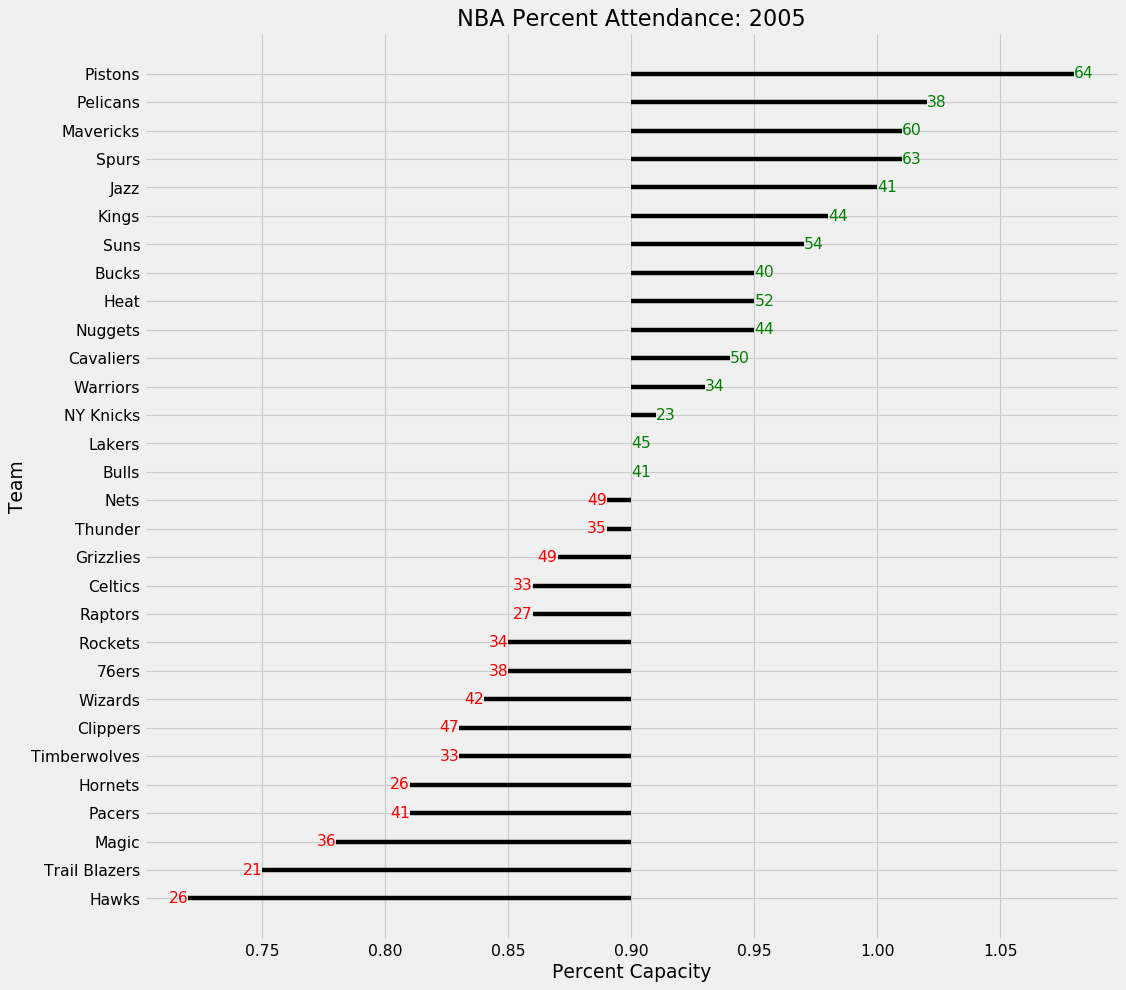

In [60]:
nba_2005.sort_values('HomePercentCapacity',inplace=True)
nba_2005.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2005.Team,xmin=.90,xmax=nba_2005.HomePercentCapacity)
for x, y, tex in zip(nba_2005.HomePercentCapacity, nba_2005.Team, nba_2005.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .90 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .90 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2005')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [61]:
print(nba_2004['HomeAvgAttendance'].mean())
print(nba_2004['HomePercentCapacity'].mean())

17313.733333333334
0.8853333333333332


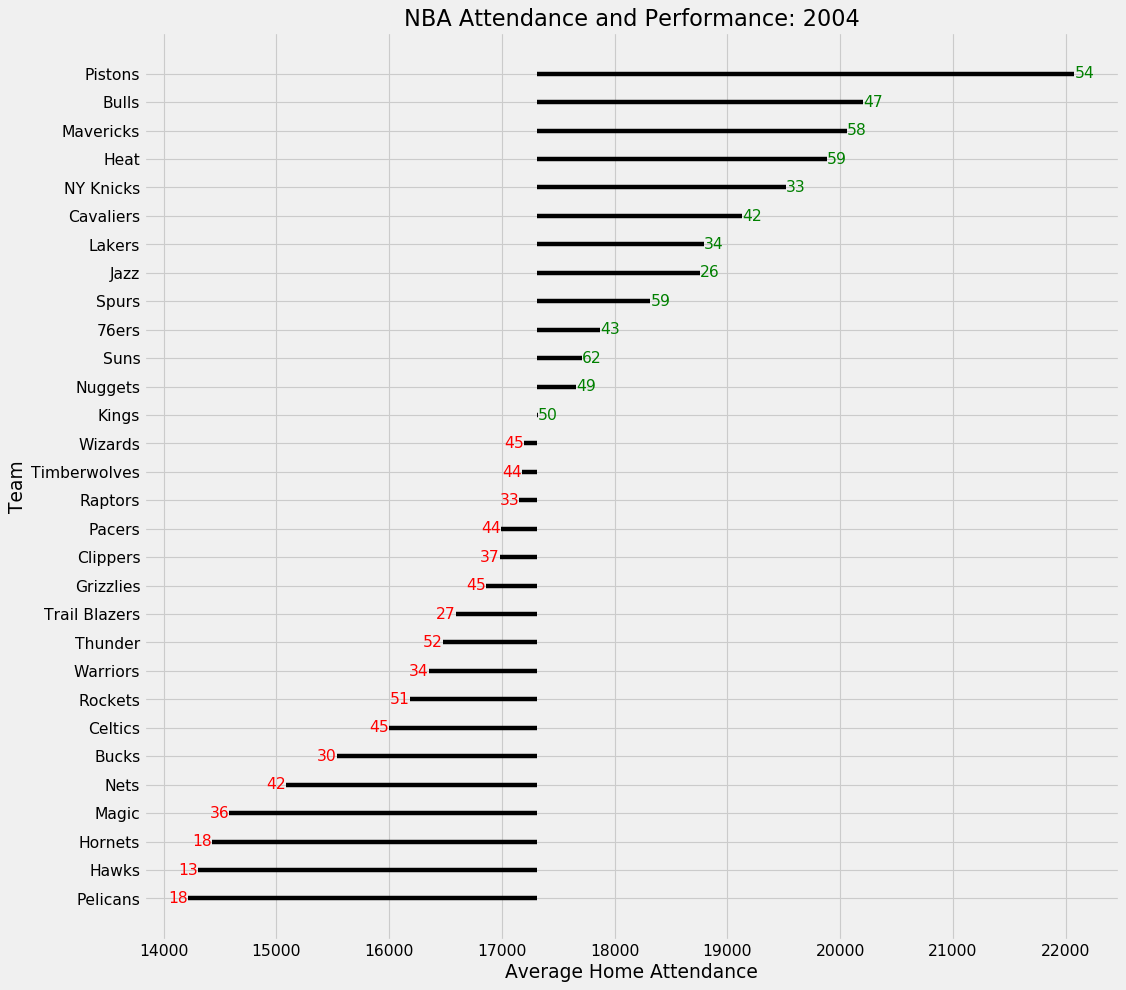

In [62]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2004.Team,xmin=17313,xmax=nba_2004.HomeAvgAttendance)
for x, y, tex in zip(nba_2004.HomeAvgAttendance, nba_2004.Team, nba_2004.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17313 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17313 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2004')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

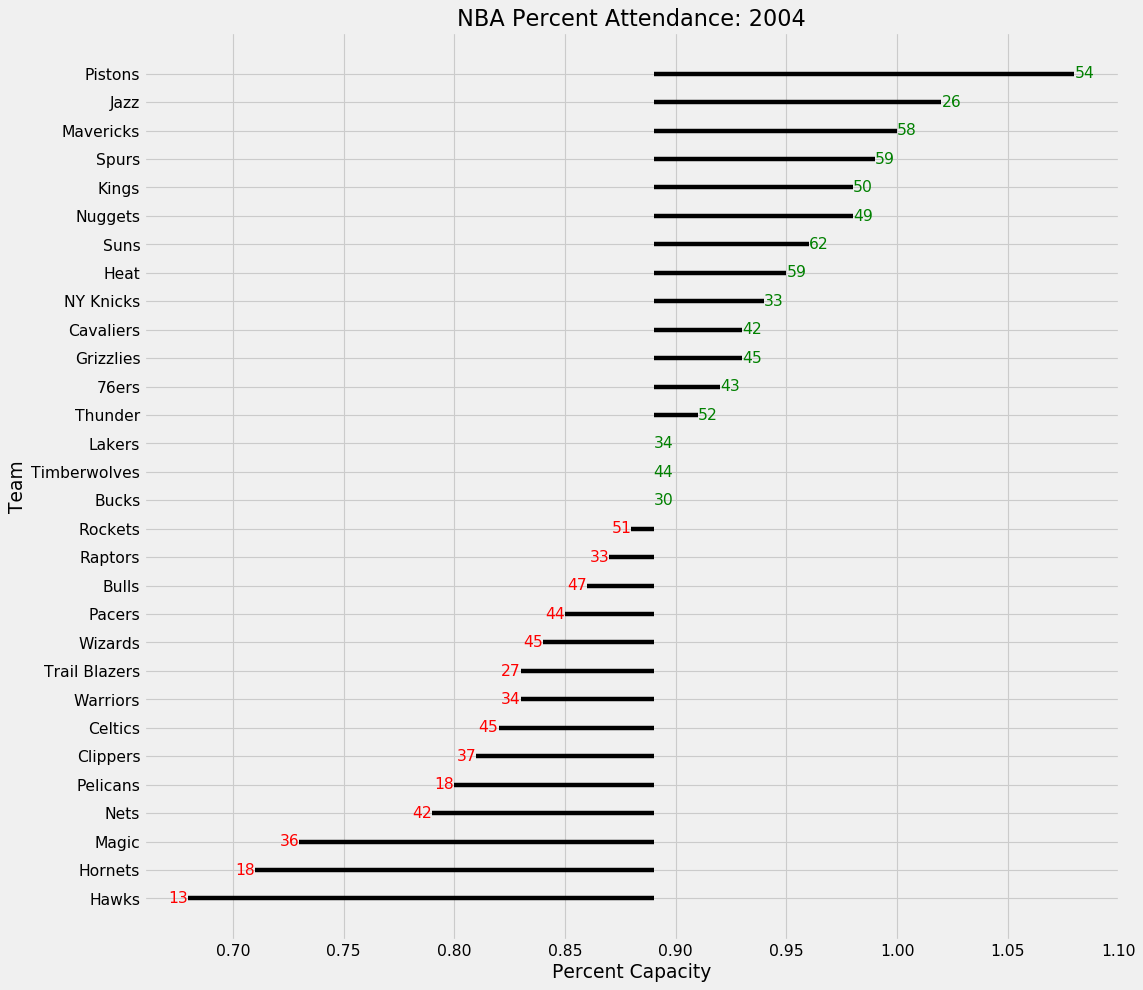

In [63]:
nba_2004.sort_values('HomePercentCapacity',inplace=True)
nba_2004.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2004.Team,xmin=.89,xmax=nba_2004.HomePercentCapacity)
for x, y, tex in zip(nba_2004.HomePercentCapacity, nba_2004.Team, nba_2004.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .89 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .89 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2004')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [64]:
print(nba_2003['HomeAvgAttendance'].mean())
print(nba_2003['HomePercentCapacity'].mean())

17049.344827586207
0.8741379310344827


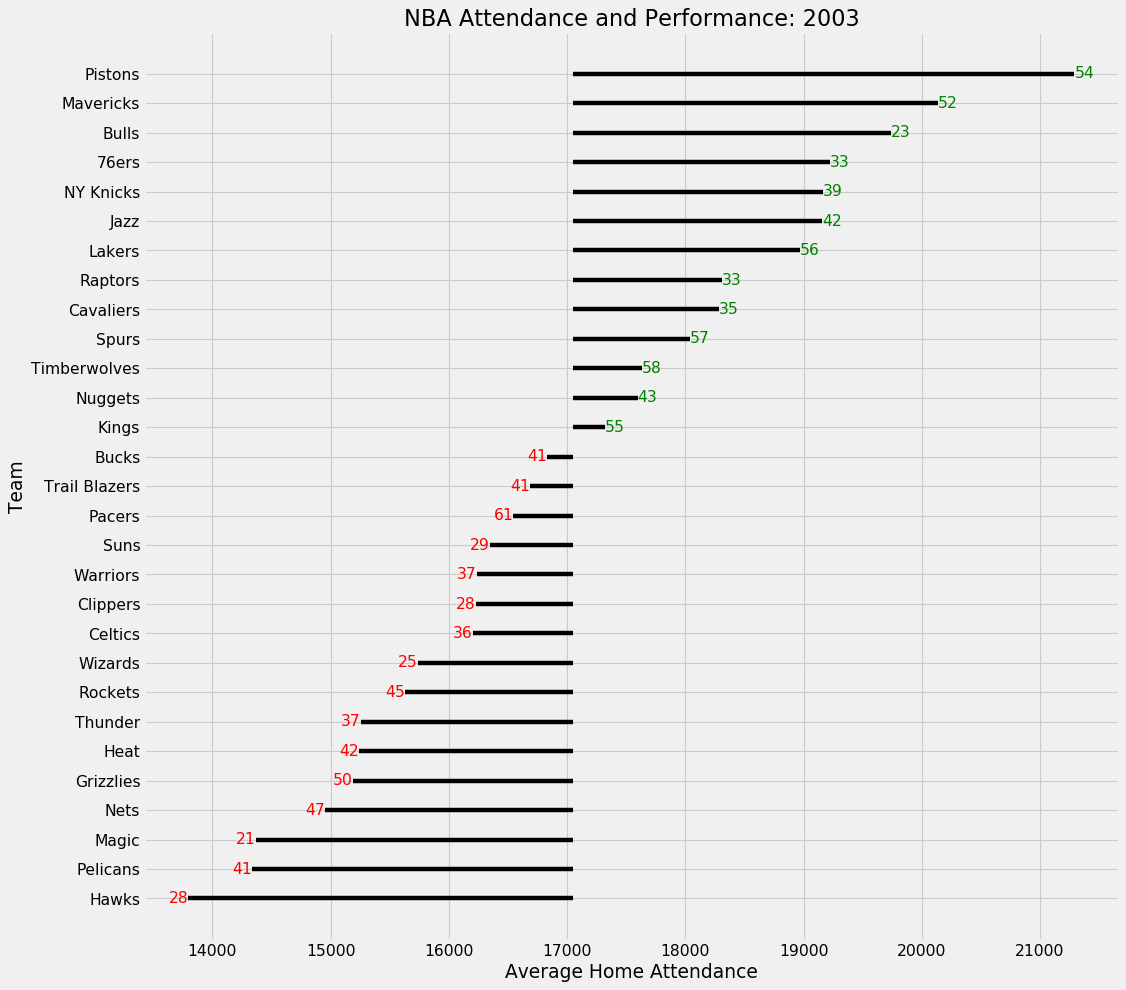

In [65]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2003.Team,xmin=17049,xmax=nba_2003.HomeAvgAttendance)
for x, y, tex in zip(nba_2003.HomeAvgAttendance, nba_2003.Team, nba_2003.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 17049 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 17049 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2003')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

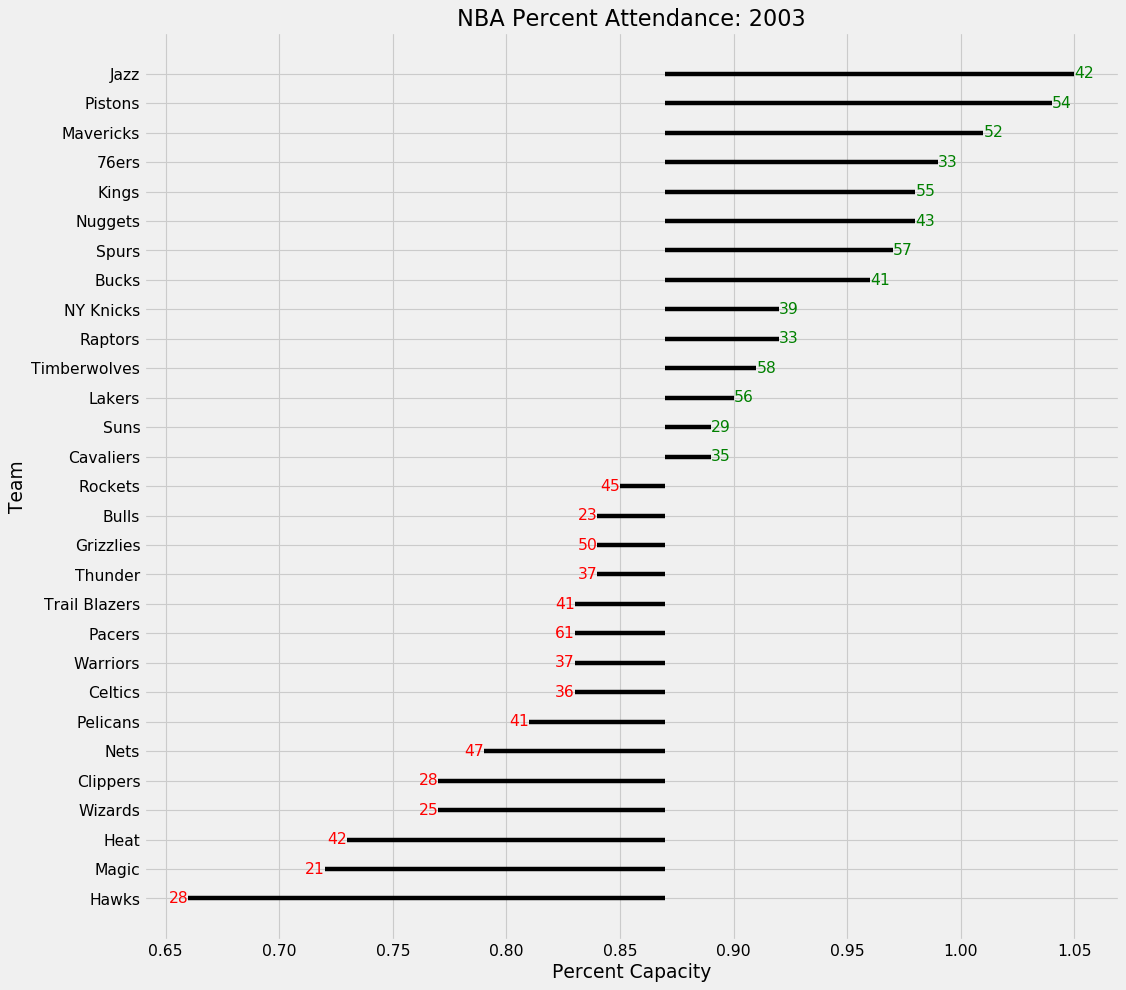

In [66]:
nba_2003.sort_values('HomePercentCapacity',inplace=True)
nba_2003.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2003.Team,xmin=.87,xmax=nba_2003.HomePercentCapacity)
for x, y, tex in zip(nba_2003.HomePercentCapacity, nba_2003.Team, nba_2003.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .87 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .87 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2003')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [67]:
print(nba_2002['HomeAvgAttendance'].mean())
print(nba_2002['HomePercentCapacity'].mean())

16882.896551724138
0.8641379310344829


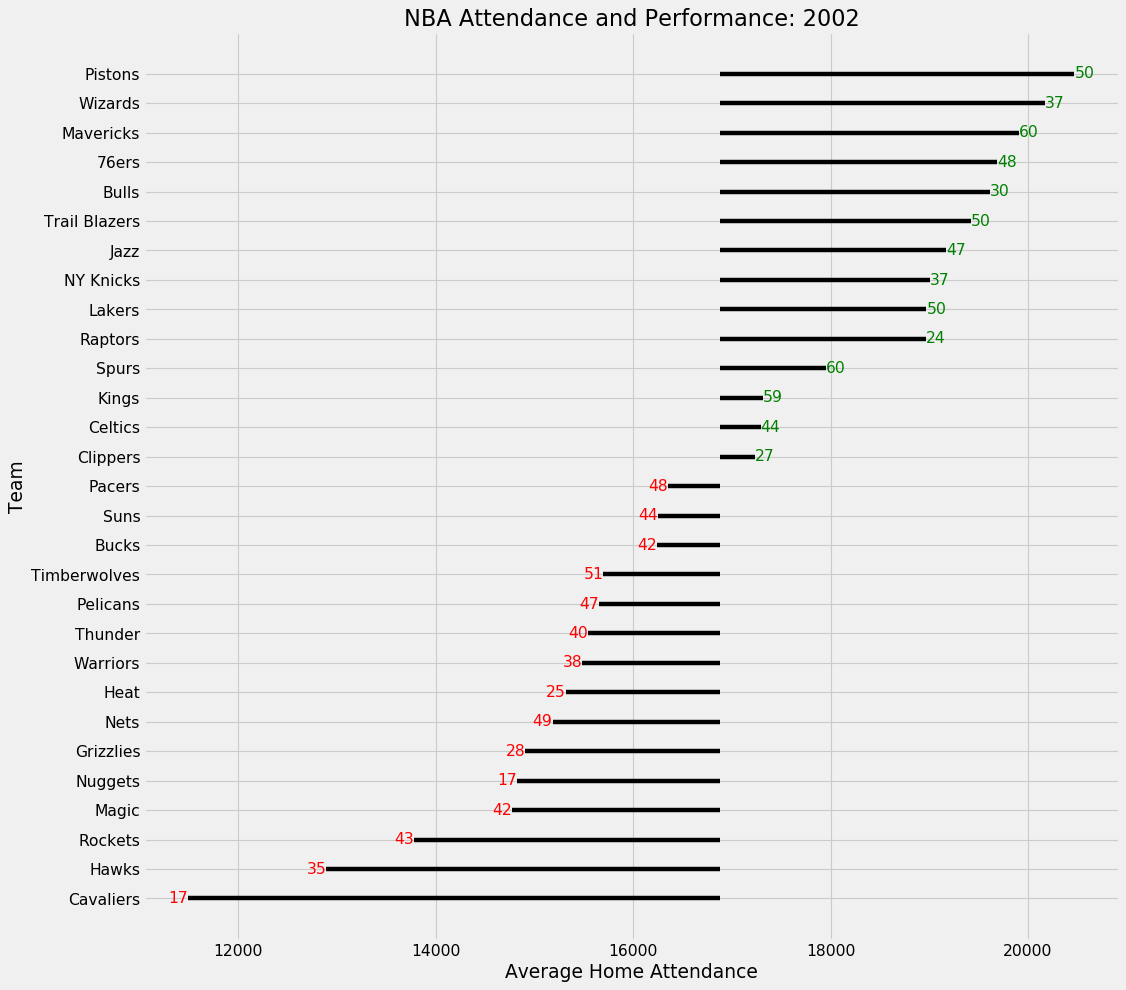

In [68]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2002.Team,xmin=16883,xmax=nba_2002.HomeAvgAttendance)
for x, y, tex in zip(nba_2002.HomeAvgAttendance, nba_2002.Team, nba_2002.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 16883 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 16883 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2002')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

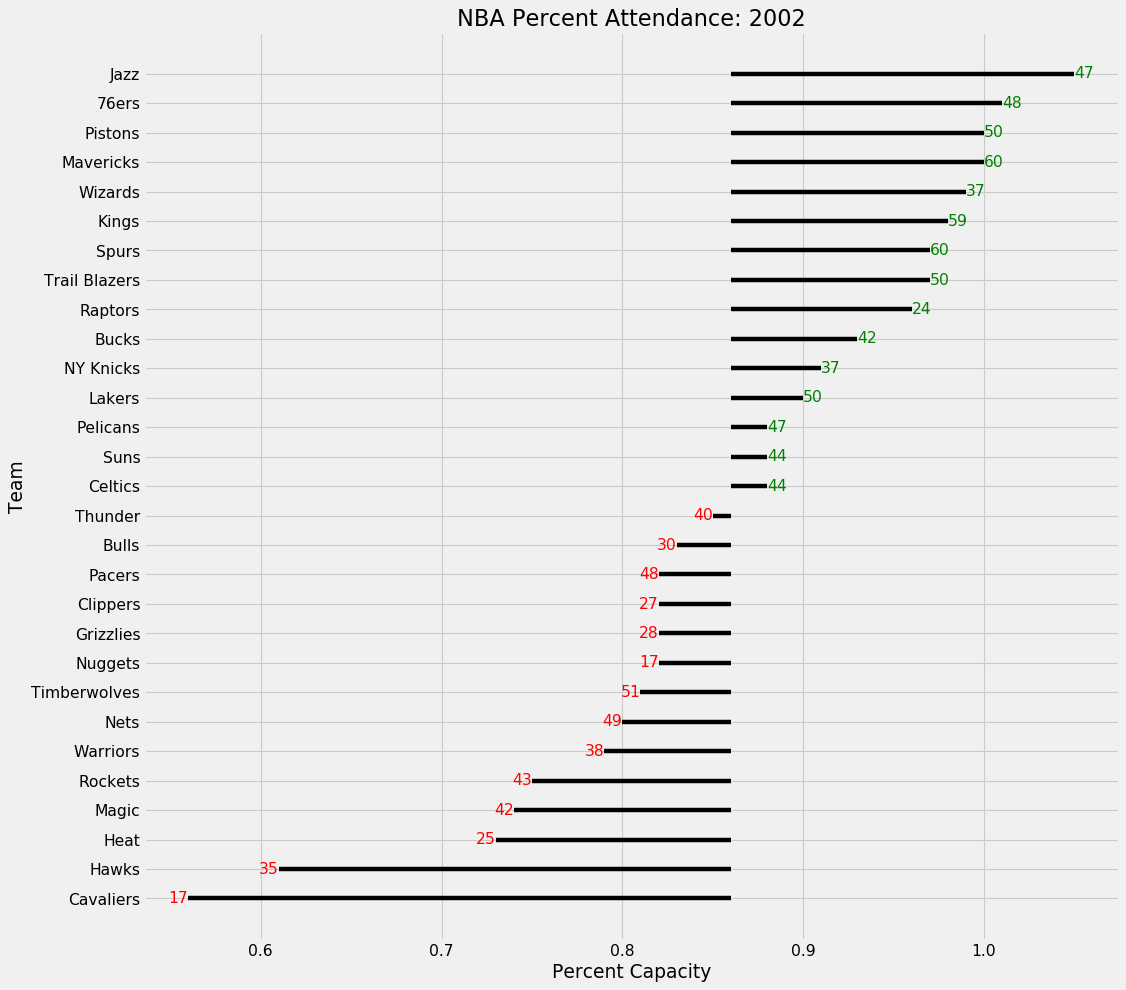

In [69]:
nba_2002.sort_values('HomePercentCapacity',inplace=True)
nba_2002.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2002.Team,xmin=.86,xmax=nba_2002.HomePercentCapacity)
for x, y, tex in zip(nba_2002.HomePercentCapacity, nba_2002.Team, nba_2002.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .86 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .86 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2002')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [70]:
print(nba_2001['HomeAvgAttendance'].mean())
print(nba_2001['HomePercentCapacity'].mean())

16973.689655172413
0.8693103448275863


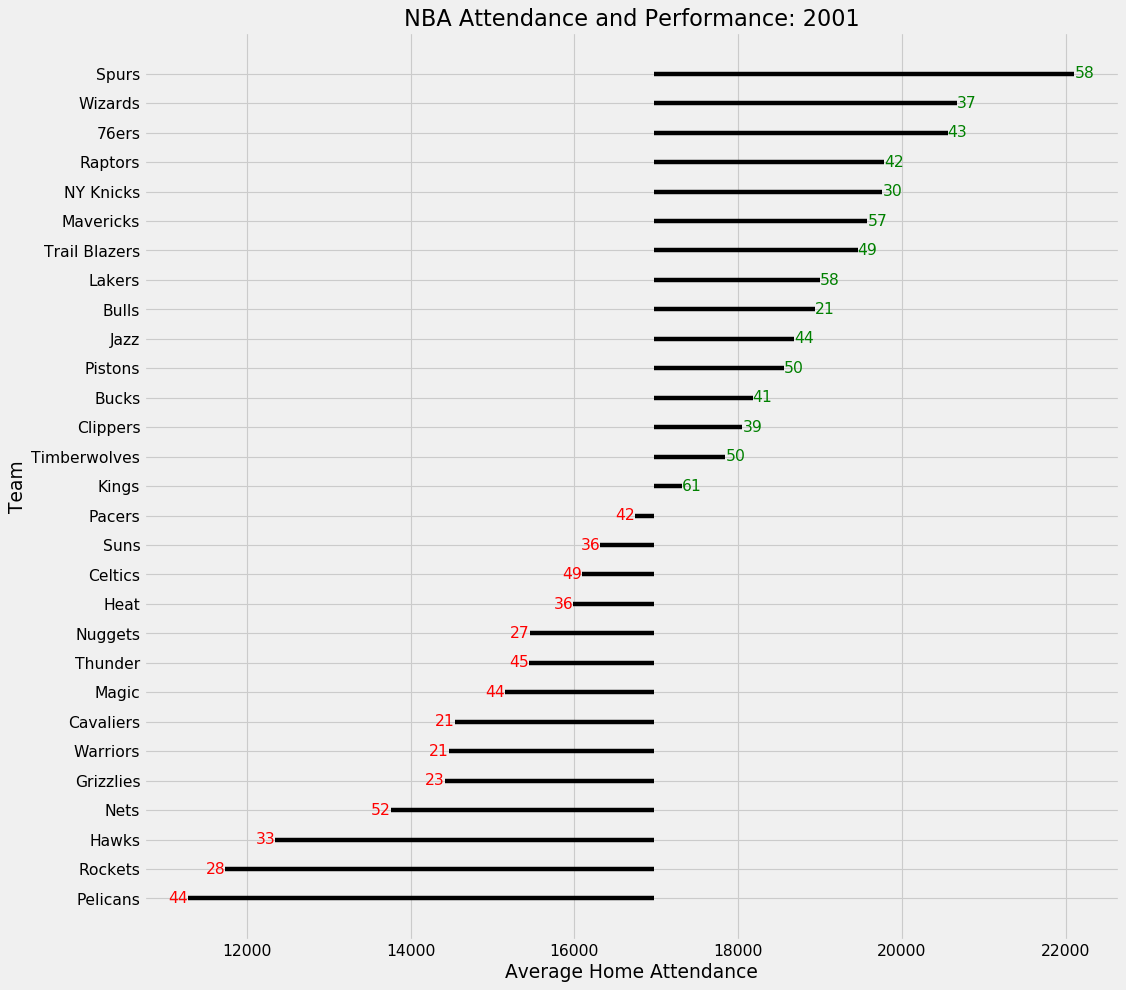

In [71]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2001.Team,xmin=16973,xmax=nba_2001.HomeAvgAttendance)
for x, y, tex in zip(nba_2001.HomeAvgAttendance, nba_2001.Team, nba_2001.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 16973 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 16973 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2001')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

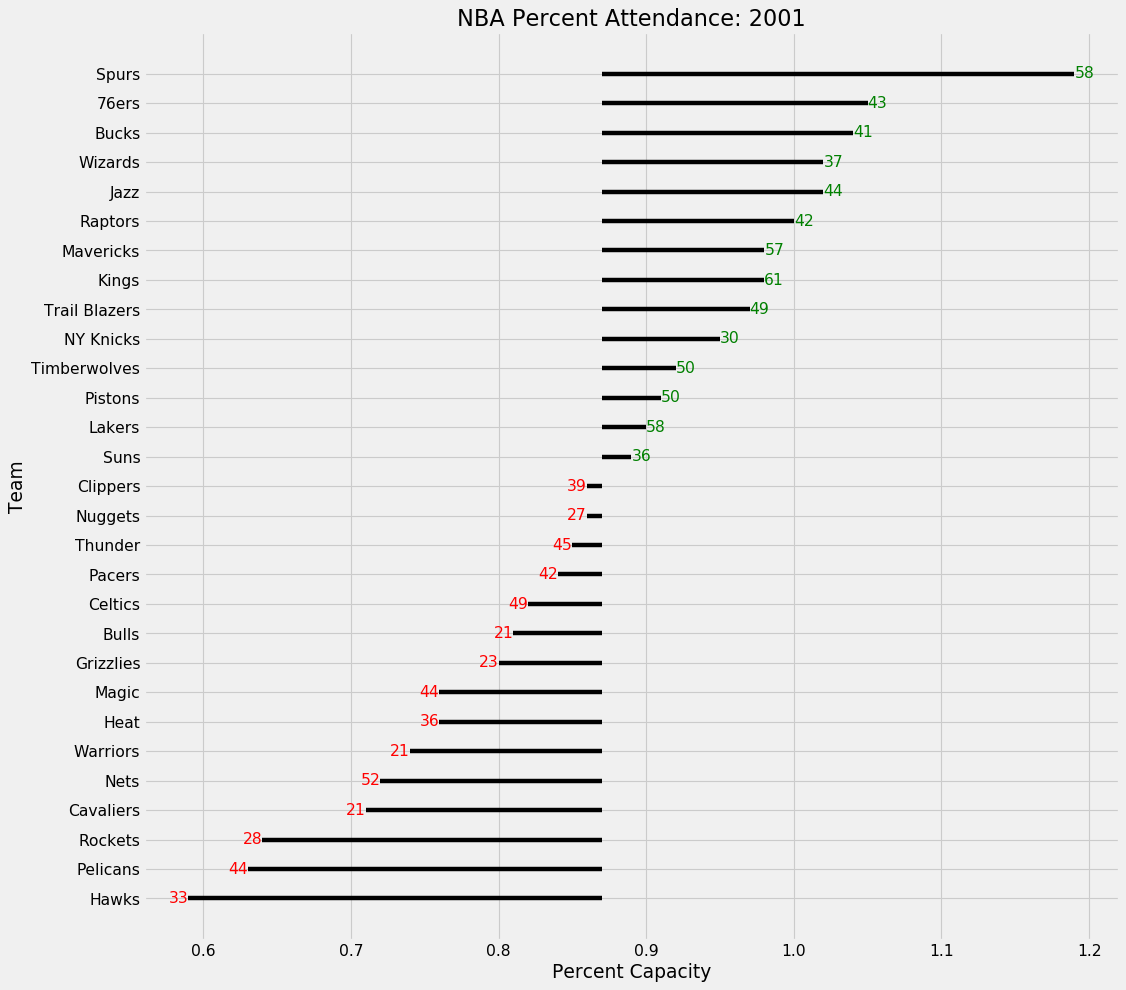

In [72]:
nba_2001.sort_values('HomePercentCapacity',inplace=True)
nba_2001.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2001.Team,xmin=.87,xmax=nba_2001.HomePercentCapacity)
for x, y, tex in zip(nba_2001.HomePercentCapacity, nba_2001.Team, nba_2001.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .87 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .87 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2001')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

In [73]:
print(nba_2000['HomeAvgAttendance'].mean())
print(nba_2000['HomePercentCapacity'].mean())

16783.275862068964
0.8599999999999999


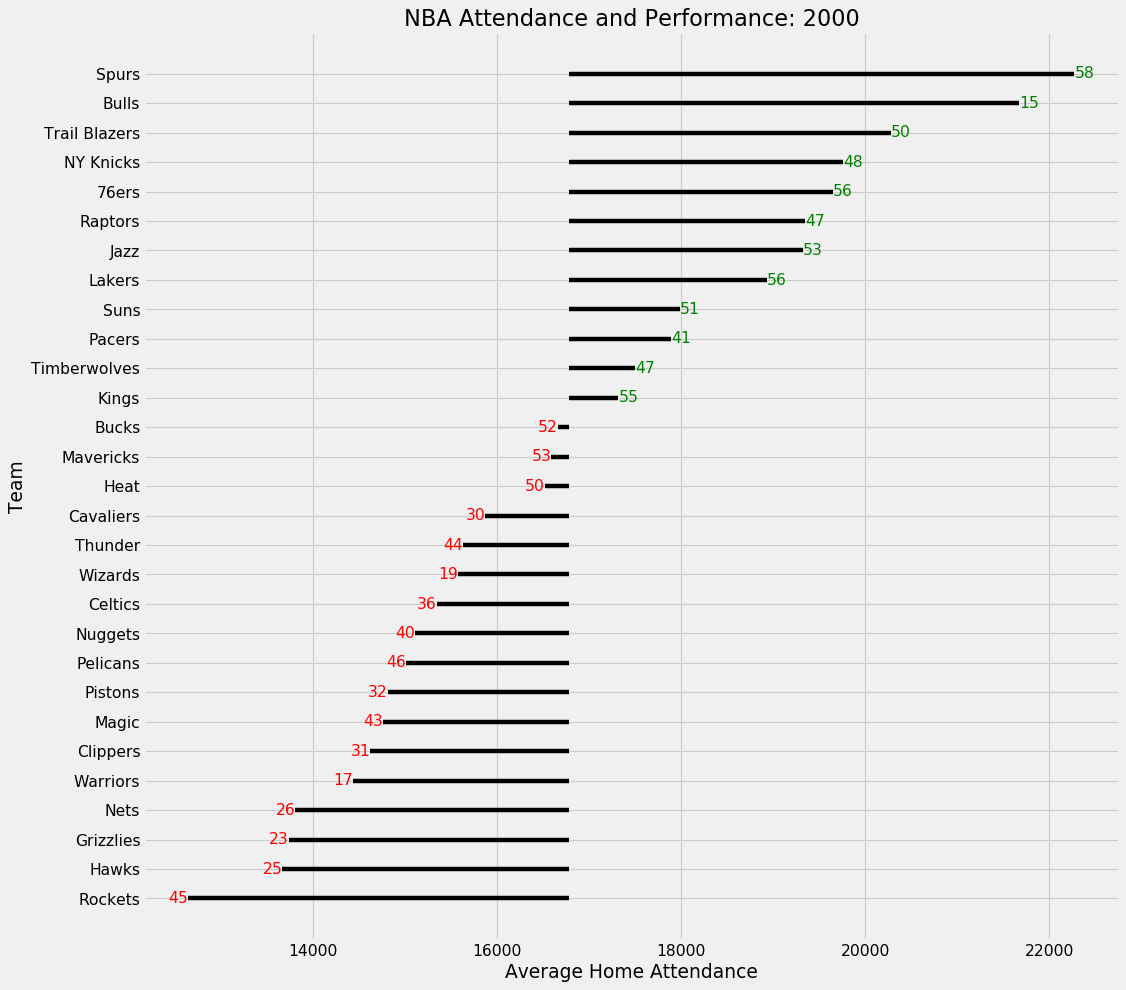

In [74]:
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2000.Team,xmin=16783,xmax=nba_2000.HomeAvgAttendance)
for x, y, tex in zip(nba_2000.HomeAvgAttendance, nba_2000.Team, nba_2000.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 16783 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 16783 else 'green', 'size':14})
plt.title('NBA Attendance and Performance: 2000')
plt.xlabel('Average Home Attendance')
plt.ylabel('Team')
ax = plt.gca()
ax.invert_yaxis()

Text(0,0.5,'Team')

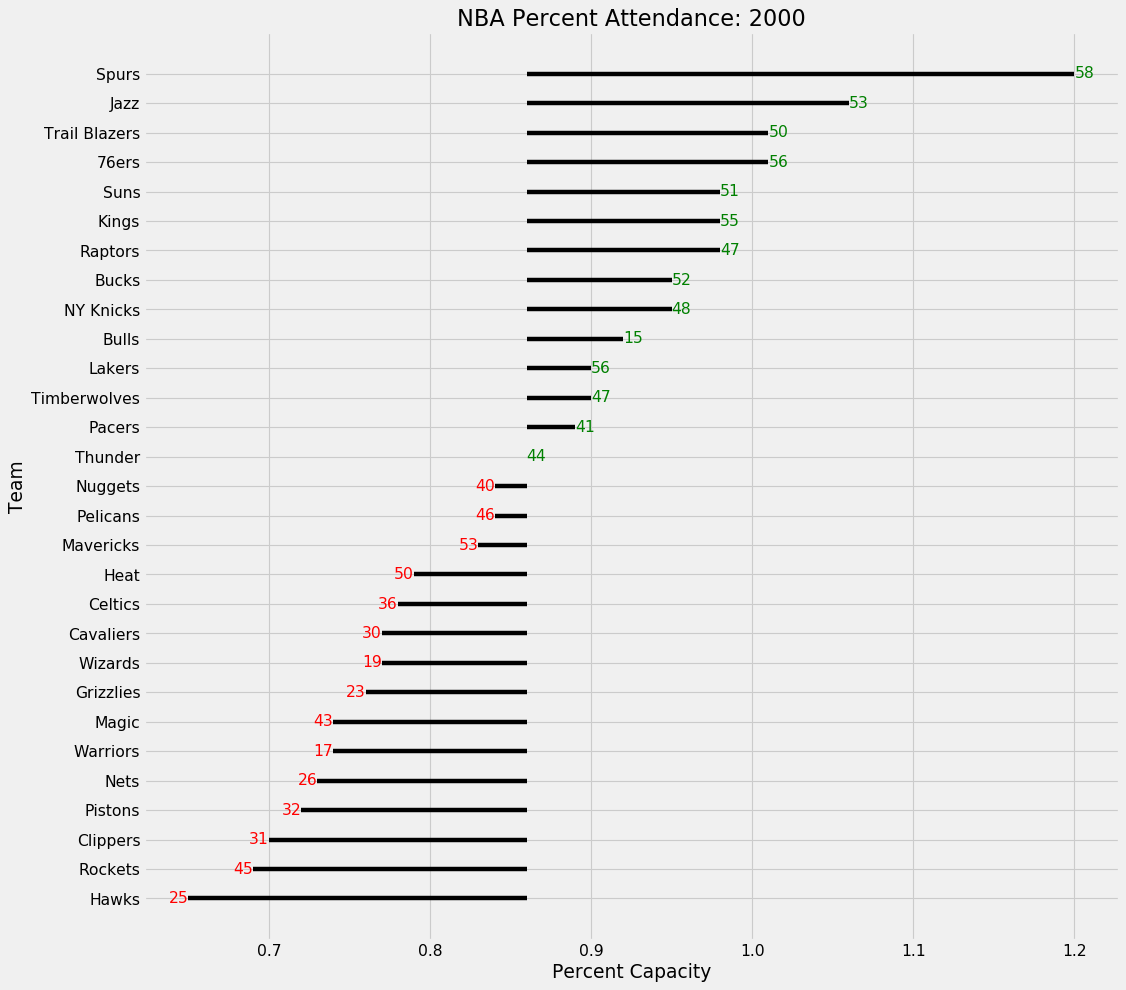

In [75]:
nba_2000.sort_values('HomePercentCapacity',inplace=True)
nba_2000.reset_index(inplace=True)
plt.figure(figsize=(14,14), dpi= 80)
plt.hlines(y=nba_2000.Team,xmin=.86,xmax=nba_2000.HomePercentCapacity)
for x, y, tex in zip(nba_2000.HomePercentCapacity, nba_2000.Team, nba_2000.Wins):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < .86 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < .86 else 'green', 'size':14})
plt.title('NBA Percent Attendance: 2000')
plt.xlabel('Percent Capacity')
plt.ylabel('Team')

Variance Score: 0.25


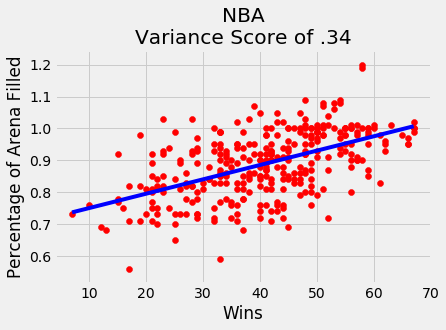

In [76]:
nba_x=nba[['Wins']]
nba_y=nba[['HomePercentCapacity']]
nba_x_train, nba_x_test, nba_y_train, nba_y_test = train_test_split(nba_x, nba_y, test_size=0.4, random_state=1)
lm = LinearRegression()
lm.fit(nba_x_train,nba_y_train)
predictions = lm.predict(nba_x_test)
plt.scatter(nba_x_train, nba_y_train, color = 'red')
plt.plot(nba_x_train, lm.predict(nba_x_train), color = 'blue')
plt.title('NBA\nVariance Score of .34')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Variance Score: %.2f'% r2_score(nba_y_test,predictions))

Mean squared error: 0.00
Variance Score: 0.34


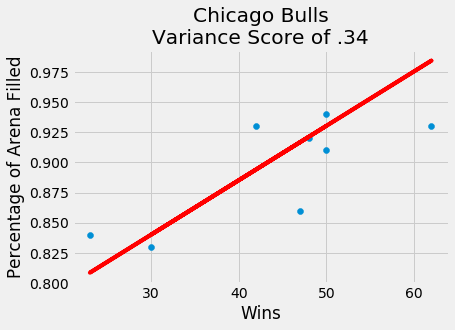

In [77]:
nba_b=nba.loc[[0,30]]
nba_bull=nba[(nba.Team == 'Bulls')]
nba_bulls=pd.concat([nba_b,nba_bull])
bulls_x=nba_bulls[['Wins']]
bulls_y=nba_bulls[['HomePercentCapacity']]
bulls_x_train, bulls_x_test, bulls_y_train, bulls_y_test = train_test_split(bulls_x, bulls_y, test_size=0.4, random_state=1)
lm_bulls = LinearRegression()
lm_bulls.fit(bulls_x_train,bulls_y_train)
prediction_bulls = lm.predict(bulls_x_test)
plt.scatter(bulls_x_test,bulls_y_test)
plt.plot(bulls_x_test,lm.predict(bulls_x_test),color='red')
plt.title('Chicago Bulls\nVariance Score of .34')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(bulls_y_test,prediction_bulls))
print('Variance Score: %.2f'% r2_score(bulls_y_test,prediction_bulls))

Mean squared error: 0.01
Variance Score: 0.44


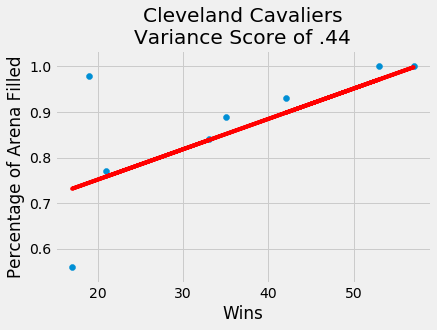

In [78]:
nba_cavs=nba[(nba.Team == 'Cavaliers')]
cavs_x=nba_cavs[['Wins']]
cavs_y=nba_cavs[['HomePercentCapacity']]
cavs_x_train, cavs_x_test, cavs_y_train, cavs_y_test = train_test_split(cavs_x, cavs_y, test_size=0.4, random_state=1)
lm_cavs = LinearRegression()
lm_cavs.fit(cavs_x_train,cavs_y_train)
prediction_cavs = lm_cavs.predict(cavs_x_test)
plt.scatter(cavs_x_test,cavs_y_test)
plt.plot(cavs_x_test,lm_cavs.predict(cavs_x_test),color='red')
plt.title('Cleveland Cavaliers\nVariance Score of .44')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(cavs_y_test,prediction_cavs))
print('Variance Score: %.2f'% r2_score(cavs_y_test,prediction_cavs))

Mean squared error: 0.01
Variance Score: 0.02


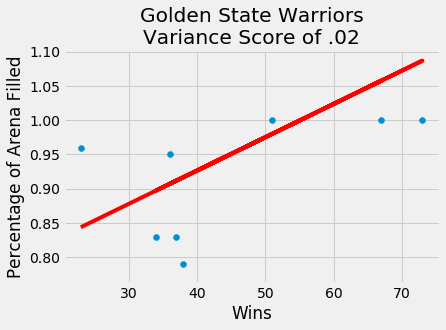

In [79]:
nba_warriors=nba[(nba.Team == 'Warriors')]
warriors_x=nba_warriors[['Wins']]
warriors_y=nba_warriors[['HomePercentCapacity']]
warriors_x_train, warriors_x_test, warriors_y_train, warriors_y_test = train_test_split(warriors_x, warriors_y, test_size=0.4, random_state=1)
lm_war = LinearRegression()
lm_war.fit(warriors_x_train,warriors_y_train)
prediction_war = lm_war.predict(warriors_x_test)
plt.scatter(warriors_x_test,warriors_y_test)
plt.plot(warriors_x_test,lm_war.predict(warriors_x_test),color='red')
plt.title('Golden State Warriors\nVariance Score of .02')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(warriors_y_test,prediction_war))
print('Variance Score: %.2f'% r2_score(warriors_y_test,prediction_war))

Mean squared error: 0.01
Variance Score: 0.29


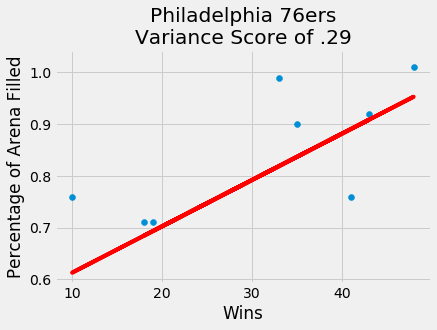

In [80]:
nba_sixers=nba[(nba.Team == '76ers')]
sixers_x=nba_sixers[['Wins']]
sixers_y=nba_sixers[['HomePercentCapacity']]
sixers_x_train, sixers_x_test, sixers_y_train, sixers_y_test = train_test_split(sixers_x, sixers_y, test_size=0.4, random_state=1)
lm_sixers = LinearRegression()
lm_sixers.fit(sixers_x_train,sixers_y_train)
prediction_sixers = lm_sixers.predict(sixers_x_test)
plt.scatter(sixers_x_test,sixers_y_test)
plt.plot(sixers_x_test,lm_sixers.predict(sixers_x_test),color='red')
plt.title('Philadelphia 76ers\nVariance Score of .29')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(sixers_y_test,prediction_sixers))
print('Variance Score: %.2f'% r2_score(sixers_y_test,prediction_sixers))

Mean squared error: 0.01
Variance Score: 0.29


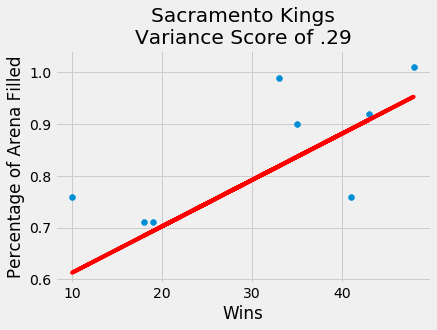

In [81]:
nba_kings=nba[(nba.Team == 'Kings')]
kings_x=nba_sixers[['Wins']]
kings_y=nba_sixers[['HomePercentCapacity']]
kings_x_train, kings_x_test, kings_y_train, kings_y_test = train_test_split(kings_x, kings_y, test_size=0.4, random_state=1)
lm_kings = LinearRegression()
lm_kings.fit(kings_x_train,kings_y_train)
prediction_kings = lm_kings.predict(kings_x_test)
plt.scatter(kings_x_test,kings_y_test)
plt.plot(kings_x_test,lm_kings.predict(kings_x_test),color='red')
plt.title('Sacramento Kings\nVariance Score of .29')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(kings_y_test,prediction_kings))
print('Variance Score: %.2f'% r2_score(kings_y_test,prediction_kings))

Mean squared error: 0.00
Variance Score: 0.52


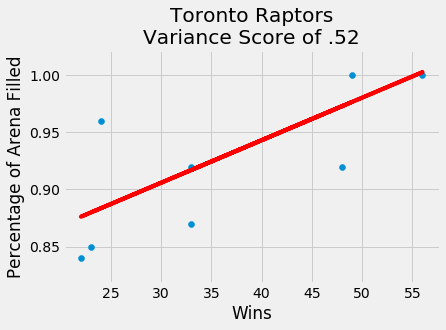

In [82]:
nba_raps=nba[(nba.Team == 'Raptors')]
raps_x=nba_raps[['Wins']]
raps_y=nba_raps[['HomePercentCapacity']]
raps_x_train, raps_x_test, raps_y_train, raps_y_test = train_test_split(raps_x, raps_y, test_size=0.4, random_state=1)
lm_raps = LinearRegression()
lm_raps.fit(raps_x_train,raps_y_train)
prediction_raps = lm_raps.predict(raps_x_test)
plt.scatter(raps_x_test,raps_y_test)
plt.plot(raps_x_test,lm_raps.predict(raps_x_test),color='red')
plt.title('Toronto Raptors\nVariance Score of .52')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(raps_y_test,prediction_raps))
print('Variance Score: %.2f'% r2_score(raps_y_test,prediction_raps))

Mean squared error: 0.00
Variance Score: -13.73


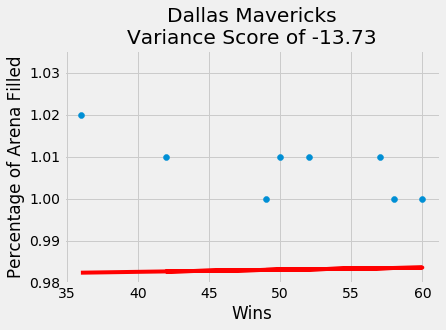

In [83]:
nba_mavs=nba[(nba.Team == 'Mavericks')]
mavs_x=nba_mavs[['Wins']]
mavs_y=nba_mavs[['HomePercentCapacity']]
mavs_x_train, mavs_x_test, mavs_y_train, mavs_y_test = train_test_split(mavs_x, mavs_y, test_size=0.4, random_state=1)
lm_mavs = LinearRegression()
lm_mavs.fit(mavs_x_train,mavs_y_train)
prediction_mavs = lm_mavs.predict(mavs_x_test)
plt.scatter(mavs_x_test,mavs_y_test)
plt.plot(mavs_x_test,lm_mavs.predict(mavs_x_test),color='red')
plt.title('Dallas Mavericks\nVariance Score of -13.73')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(mavs_y_test,prediction_mavs))
print('Variance Score: %.2f'% r2_score(mavs_y_test,prediction_mavs))

Mean squared error: 0.01
Variance Score: 0.08


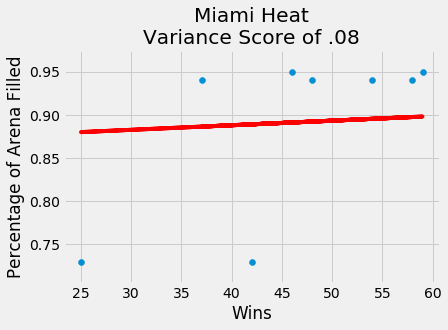

In [84]:
nba_heat=nba[(nba.Team == 'Heat')]
heat_x=nba_heat[['Wins']]
heat_y=nba_heat[['HomePercentCapacity']]
heat_x_train, heat_x_test, heat_y_train, heat_y_test = train_test_split(heat_x, heat_y, test_size=0.4, random_state=1)
lm_heat = LinearRegression()
lm_heat.fit(heat_x_train,heat_y_train)
prediction_heat = lm_heat.predict(heat_x_test)
plt.scatter(heat_x_test,heat_y_test)
plt.plot(heat_x_test,lm_heat.predict(heat_x_test),color='red')
plt.title('Miami Heat\nVariance Score of .08')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(heat_y_test,prediction_heat))
print('Variance Score: %.2f'% r2_score(heat_y_test,prediction_heat))

Mean squared error: 0.01
Variance Score: -0.20


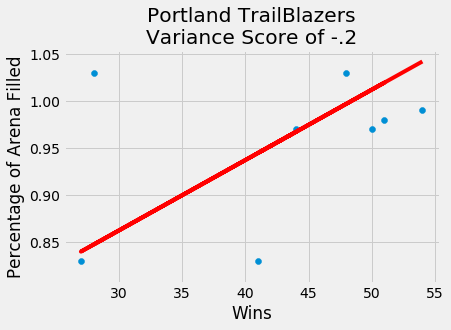

In [85]:
nba_blazers=nba[(nba.Team == 'Trail Blazers')]
blazers_x=nba_blazers[['Wins']]
blazers_y=nba_blazers[['HomePercentCapacity']]
blazers_x_train, blazers_x_test, blazers_y_train, blazers_y_test = train_test_split(blazers_x, blazers_y, test_size=0.4, random_state=1)
lm_blazers = LinearRegression()
lm_blazers.fit(blazers_x_train,blazers_y_train)
prediction_blazers = lm_blazers.predict(blazers_x_test)
plt.scatter(blazers_x_test,blazers_y_test)
plt.plot(blazers_x_test,lm_blazers.predict(blazers_x_test),color='red')
plt.title('Portland TrailBlazers\nVariance Score of -.2')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(blazers_y_test,prediction_blazers))
print('Variance Score: %.2f'% r2_score(blazers_y_test,prediction_blazers))

Mean squared error: 0.00
Variance Score: -0.52


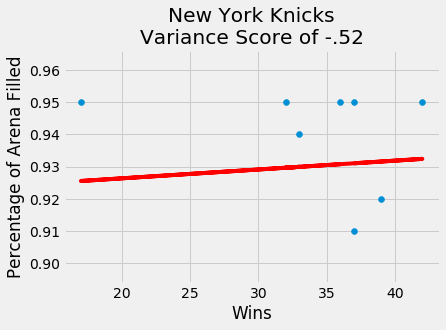

In [86]:
nba_knicks=nba[(nba.Team == 'NY Knicks')]
knicks_x=nba_knicks[['Wins']]
knicks_y=nba_knicks[['HomePercentCapacity']]
knicks_x_train, knicks_x_test, knicks_y_train, knicks_y_test = train_test_split(knicks_x, knicks_y, test_size=0.4, random_state=1)
lm_knicks = LinearRegression()
lm_knicks.fit(knicks_x_train,knicks_y_train)
prediction_knicks = lm_knicks.predict(knicks_x_test)
plt.scatter(knicks_x_test,knicks_y_test)
plt.plot(knicks_x_test,lm_knicks.predict(knicks_x_test),color='red')
plt.title('New York Knicks\nVariance Score of -.52')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(knicks_y_test,prediction_knicks))
print('Variance Score: %.2f'% r2_score(knicks_y_test,prediction_knicks))

Mean squared error: 0.00
Variance Score: -0.33


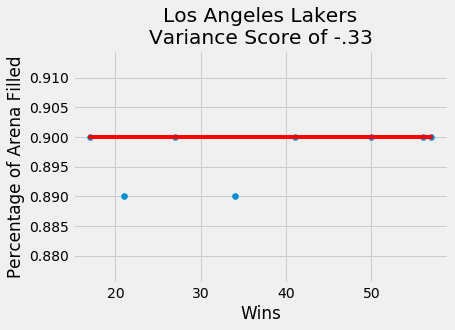

In [87]:
nba_lakers=nba[(nba.Team == 'Lakers')]
lakers_x=nba_lakers[['Wins']]
lakers_y=nba_lakers[['HomePercentCapacity']]
lakers_x_train, lakers_x_test, lakers_y_train, lakers_y_test = train_test_split(lakers_x, lakers_y, test_size=0.4, random_state=1)
lm_lakers = LinearRegression()
lm_lakers.fit(lakers_x_train,lakers_y_train)
prediction_lakers = lm_lakers.predict(lakers_x_test)
plt.scatter(lakers_x_test,lakers_y_test)
plt.plot(lakers_x_test,lm_lakers.predict(lakers_x_test),color='red')
plt.title('Los Angeles Lakers\nVariance Score of -.33')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(lakers_y_test,prediction_lakers))
print('Variance Score: %.2f'% r2_score(lakers_y_test,prediction_lakers))

Mean squared error: 0.00
Variance Score: -0.21


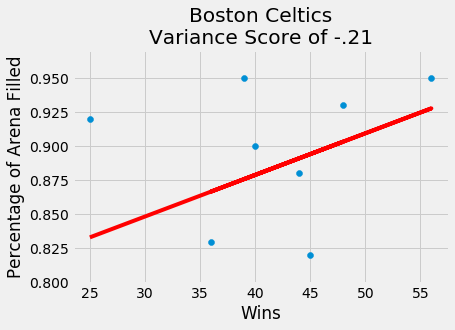

In [88]:
nba_celtics=nba[(nba.Team == 'Celtics')]
celtics_x=nba_celtics[['Wins']]
celtics_y=nba_celtics[['HomePercentCapacity']]
celtics_x_train, celtics_x_test, celtics_y_train, celtics_y_test = train_test_split(celtics_x, celtics_y, test_size=0.4, random_state=1)
lm_celtics = LinearRegression()
lm_celtics.fit(celtics_x_train,celtics_y_train)
prediction_celtics = lm_celtics.predict(celtics_x_test)
plt.scatter(celtics_x_test,celtics_y_test)
plt.plot(celtics_x_test,lm_celtics.predict(celtics_x_test),color='red')
plt.title('Boston Celtics\nVariance Score of -.21')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(celtics_y_test,prediction_celtics))
print('Variance Score: %.2f'% r2_score(celtics_y_test,prediction_celtics))

Mean squared error: 0.00
Variance Score: -39.46


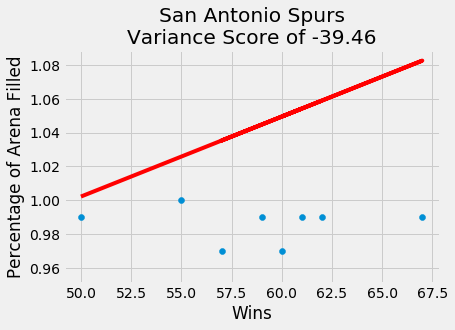

In [89]:
nba_spurs=nba[(nba.Team == 'Spurs')]
spurs_x=nba_spurs[['Wins']]
spurs_y=nba_spurs[['HomePercentCapacity']]
spurs_x_train, spurs_x_test, spurs_y_train, spurs_y_test = train_test_split(spurs_x, spurs_y, test_size=0.4, random_state=1)
lm_spurs = LinearRegression()
lm_spurs.fit(spurs_x_train,spurs_y_train)
prediction_spurs = lm_spurs.predict(spurs_x_test)
plt.scatter(spurs_x_test,spurs_y_test)
plt.plot(spurs_x_test,lm_spurs.predict(spurs_x_test),color='red')
plt.title('San Antonio Spurs\nVariance Score of -39.46')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(spurs_y_test,prediction_spurs))
print('Variance Score: %.2f'% r2_score(spurs_y_test,prediction_spurs))

Mean squared error: 0.01
Variance Score: -1.63


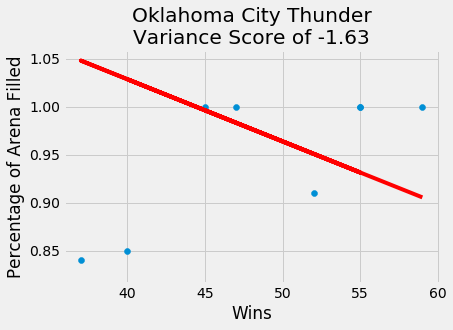

In [90]:
nba_thunder=nba[(nba.Team == 'Thunder')]
thunder_x=nba_thunder[['Wins']]
thunder_y=nba_thunder[['HomePercentCapacity']]
thunder_x_train, thunder_x_test, thunder_y_train, thunder_y_test = train_test_split(thunder_x, thunder_y, test_size=0.4, random_state=1)
lm_thunder = LinearRegression()
lm_thunder.fit(spurs_x_train,thunder_y_train)
prediction_thunder = lm_thunder.predict(thunder_x_test)
plt.scatter(thunder_x_test,thunder_y_test)
plt.plot(thunder_x_test,lm_thunder.predict(thunder_x_test),color='red')
plt.title('Oklahoma City Thunder\nVariance Score of -1.63')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(thunder_y_test,prediction_thunder))
print('Variance Score: %.2f'% r2_score(thunder_y_test,prediction_thunder))

Mean squared error: 0.01
Variance Score: -1.56


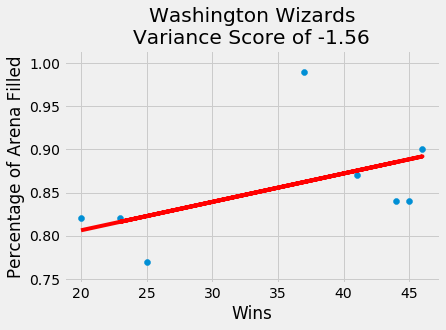

In [91]:
nba_wiz=nba[(nba.Team == 'Wizards')]
wiz_x=nba_wiz[['Wins']]
wiz_y=nba_wiz[['HomePercentCapacity']]
wiz_x_train, wiz_x_test, wiz_y_train, wiz_y_test = train_test_split(wiz_x, wiz_y, test_size=0.4, random_state=1)
lm_wiz= LinearRegression()
lm_wiz.fit(wiz_x_train,wiz_y_train)
prediction_wiz = lm_wiz.predict(spurs_x_test)
plt.scatter(wiz_x_test,wiz_y_test)
plt.plot(wiz_x_test,lm_wiz.predict(wiz_x_test),color='red')
plt.title('Washington Wizards\nVariance Score of -1.56')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(wiz_y_test,prediction_wiz))
print('Variance Score: %.2f'% r2_score(wiz_y_test,prediction_wiz))

Mean squared error: 0.00
Variance Score: -7.78


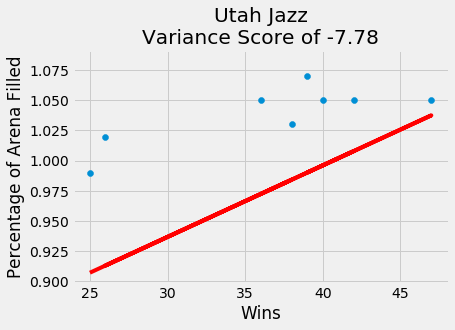

In [92]:
nba_jazz=nba[(nba.Team == 'Jazz')]
jazz_x=nba_jazz[['Wins']]
jazz_y=nba_jazz[['HomePercentCapacity']]
jazz_x_train, jazz_x_test, jazz_y_train, jazz_y_test = train_test_split(jazz_x, jazz_y, test_size=0.4, random_state=1)
lm_jazz = LinearRegression()
lm_jazz.fit(jazz_x_train,jazz_y_train)
prediction_jazz = lm_jazz.predict(jazz_x_test)
plt.scatter(jazz_x_test,jazz_y_test)
plt.plot(jazz_x_test,lm_jazz.predict(jazz_x_test),color='red')
plt.title('Utah Jazz\nVariance Score of -7.78')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(jazz_y_test,prediction_jazz))
print('Variance Score: %.2f'% r2_score(jazz_y_test,prediction_jazz))

Mean squared error: 0.01
Variance Score: 0.10


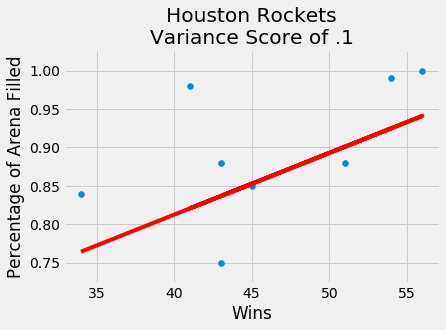

In [93]:
nba_rockets=nba[(nba.Team == 'Rockets')]
rockets_x=nba_rockets[['Wins']]
rockets_y=nba_rockets[['HomePercentCapacity']]
rockets_x_train, rockets_x_test, rockets_y_train, rockets_y_test = train_test_split(rockets_x, rockets_y, test_size=0.4, random_state=1)
lm_rockets = LinearRegression()
lm_rockets.fit(rockets_x_train,rockets_y_train)
prediction_rockets = lm_rockets.predict(rockets_x_test)
plt.scatter(rockets_x_test,rockets_y_test)
plt.plot(rockets_x_test,lm_rockets.predict(rockets_x_test),color='red')
plt.title('Houston Rockets\nVariance Score of .1')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(rockets_y_test,prediction_rockets))
print('Variance Score: %.2f'% r2_score(rockets_y_test,prediction_rockets))

Mean squared error: 0.01
Variance Score: -0.14


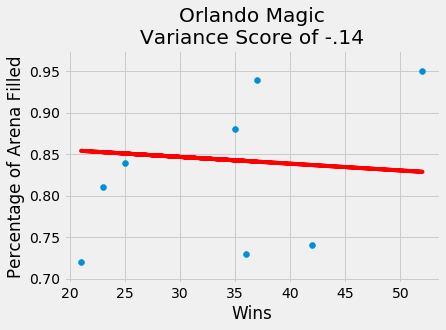

In [94]:
nba_magic=nba[(nba.Team == 'Magic')]
magic_x=nba_magic[['Wins']]
magic_y=nba_magic[['HomePercentCapacity']]
magic_x_train, magic_x_test, magic_y_train, magic_y_test = train_test_split(magic_x, magic_y, test_size=0.4, random_state=1)
lm_magic = LinearRegression()
lm_magic.fit(magic_x_train,magic_y_train)
prediction_magic = lm_magic.predict(magic_x_test)
plt.scatter(magic_x_test,magic_y_test)
plt.plot(magic_x_test,lm_magic.predict(magic_x_test),color='red')
plt.title('Orlando Magic\nVariance Score of -.14')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(magic_y_test,prediction_magic))
print('Variance Score: %.2f'% r2_score(magic_y_test,prediction_magic))

Mean squared error: 0.06
Variance Score: -1.91


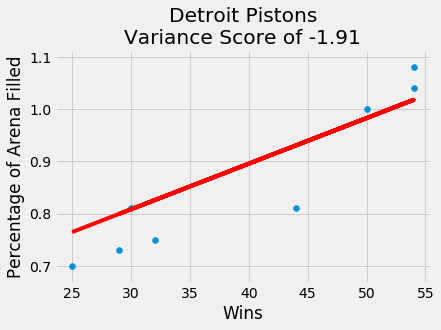

In [95]:
nba_pistons=nba[(nba.Team == 'Pistons')]
pistons_x=nba_pistons[['Wins']]
pistons_y=nba_pistons[['HomePercentCapacity']]
pistons_x_train, pistons_x_test, pistons_y_train, pistons_y_test = train_test_split(pistons_x, pistons_y, test_size=0.4, random_state=1)
lm_pistons = LinearRegression()
lm_pistons.fit(pistons_x_train,pistons_y_train)
prediction_pistons = lm_pistons.predict(spurs_x_test)
plt.scatter(pistons_x_test,pistons_y_test)
plt.plot(pistons_x_test,lm_pistons.predict(pistons_x_test),color='red')
plt.title('Detroit Pistons\nVariance Score of -1.91')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(pistons_y_test,prediction_pistons))
print('Variance Score: %.2f'% r2_score(pistons_y_test,prediction_pistons))

Mean squared error: 0.00
Variance Score: 0.49


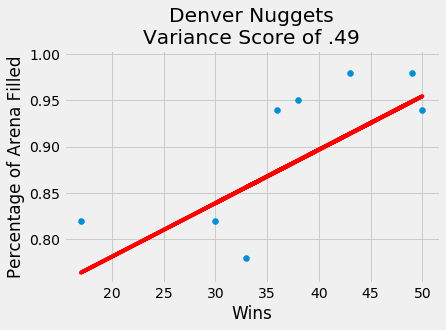

In [96]:
nba_nuggets=nba[(nba.Team == 'Nuggets')]
nuggets_x=nba_nuggets[['Wins']]
nuggets_y=nba_nuggets[['HomePercentCapacity']]
nuggets_x_train, nuggets_x_test, nuggets_y_train, nuggets_y_test = train_test_split(nuggets_x, nuggets_y, test_size=0.4, random_state=1)
lm_nuggets = LinearRegression()
lm_nuggets.fit(nuggets_x_train,nuggets_y_train)
prediction_nuggets = lm_nuggets.predict(nuggets_x_test)
plt.scatter(nuggets_x_test,nuggets_y_test)
plt.plot(nuggets_x_test,lm_nuggets.predict(nuggets_x_test),color='red')
plt.title('Denver Nuggets\nVariance Score of .49')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(nuggets_y_test,prediction_nuggets))
print('Variance Score: %.2f'% r2_score(nuggets_y_test,prediction_nuggets))

Mean squared error: 0.02
Variance Score: -4.15


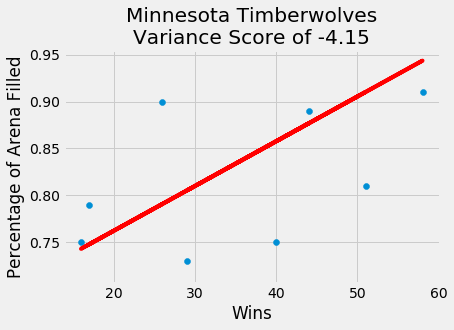

In [97]:
nba_twolves=nba[(nba.Team == 'Timberwolves')]
twolves_x=nba_twolves[['Wins']]
twolves_y=nba_twolves[['HomePercentCapacity']]
twolves_x_train, twolves_x_test, twolves_y_train, twolves_y_test = train_test_split(twolves_x, twolves_y, test_size=0.4, random_state=1)
lm_twolves = LinearRegression()
lm_twolves.fit(twolves_x_train,twolves_y_train)
prediction_twolves = lm_twolves.predict(spurs_x_test)
plt.scatter(twolves_x_test,twolves_y_test)
plt.plot(twolves_x_test,lm_twolves.predict(twolves_x_test),color='red')
plt.title('Minnesota Timberwolves\nVariance Score of -4.15')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(twolves_y_test,prediction_twolves))
print('Variance Score: %.2f'% r2_score(twolves_y_test,prediction_twolves))

Mean squared error: 0.00
Variance Score: -0.01


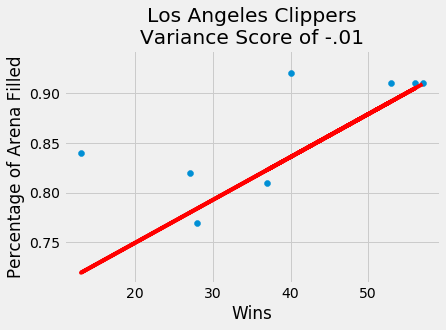

In [98]:
nba_clips=nba[(nba.Team == 'Clippers')]
clips_x=nba_clips[['Wins']]
clips_y=nba_clips[['HomePercentCapacity']]
clips_x_train, clips_x_test, clips_y_train, clips_y_test = train_test_split(clips_x, clips_y, test_size=0.4, random_state=1)
lm_clips = LinearRegression()
lm_clips.fit(clips_x_train,clips_y_train)
prediction_clips = lm_clips.predict(clips_x_test)
plt.scatter(clips_x_test,clips_y_test)
plt.plot(clips_x_test,lm_clips.predict(clips_x_test),color='red')
plt.title('Los Angeles Clippers\nVariance Score of -.01')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(clips_y_test,prediction_clips))
print('Variance Score: %.2f'% r2_score(clips_y_test,prediction_clips))

Mean squared error: 0.00
Variance Score: -1.17


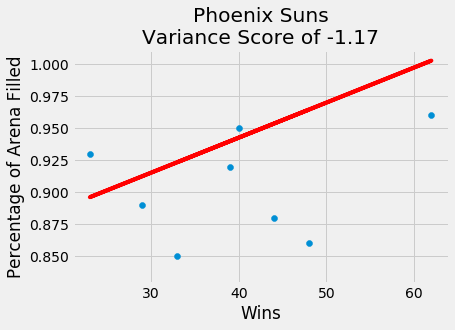

In [99]:
nba_suns=nba[(nba.Team == 'Suns')]
suns_x=nba_suns[['Wins']]
suns_y=nba_suns[['HomePercentCapacity']]
suns_x_train, suns_x_test, suns_y_train, suns_y_test = train_test_split(suns_x, suns_y, test_size=0.4, random_state=1)
lm_suns = LinearRegression()
lm_suns.fit(suns_x_train,suns_y_train)
prediction_suns = lm_suns.predict(suns_x_test)
plt.scatter(suns_x_test,suns_y_test)
plt.plot(suns_x_test,lm_suns.predict(suns_x_test),color='red')
plt.title('Phoenix Suns\nVariance Score of -1.17')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(suns_y_test,prediction_suns))
print('Variance Score: %.2f'% r2_score(suns_y_test,prediction_suns))

Mean squared error: 0.00
Variance Score: -0.10


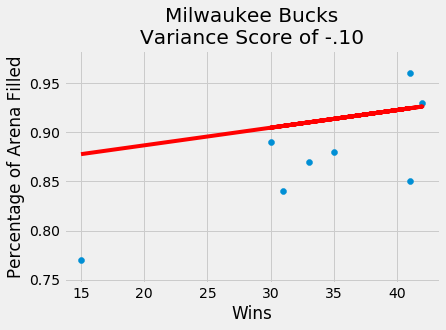

In [100]:
nba_bucks=nba[(nba.Team == 'Bucks')]
bucks_x=nba_bucks[['Wins']]
bucks_y=nba_bucks[['HomePercentCapacity']]
bucks_x_train, bucks_x_test, bucks_y_train, bucks_y_test = train_test_split(bucks_x, bucks_y, test_size=0.4, random_state=1)
lm_bucks = LinearRegression()
lm_bucks.fit(bucks_x_train,bucks_y_train)
prediction_bucks = lm_bucks.predict(bucks_x_test)
plt.scatter(bucks_x_test,bucks_y_test)
plt.plot(bucks_x_test,lm_bucks.predict(bucks_x_test),color='red')
plt.title('Milwaukee Bucks\nVariance Score of -.10')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(bucks_y_test,prediction_bucks))
print('Variance Score: %.2f'% r2_score(bucks_y_test,prediction_bucks))

Mean squared error: 0.00
Variance Score: -0.13


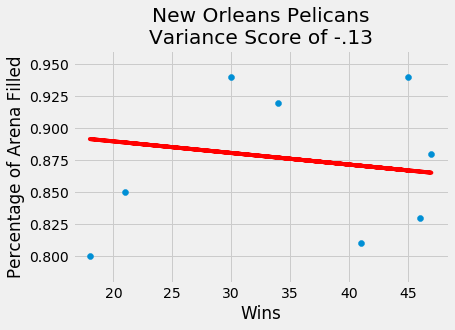

In [101]:
nba_pels=nba[(nba.Team == 'Pelicans')]
pels_x=nba_pels[['Wins']]
pels_y=nba_pels[['HomePercentCapacity']]
pels_x_train, pels_x_test, pels_y_train, pels_y_test = train_test_split(pels_x, pels_y, test_size=0.4, random_state=1)
lm_pels = LinearRegression()
lm_pels.fit(pels_x_train,pels_y_train)
prediction_pels = lm_pels.predict(pels_x_test)
plt.scatter(pels_x_test,pels_y_test)
plt.plot(pels_x_test,lm_pels.predict(pels_x_test),color='red')
plt.title('New Orleans Pelicans\nVariance Score of -.13')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(pels_y_test,prediction_pels))
print('Variance Score: %.2f'% r2_score(pels_y_test,prediction_pels))

Mean squared error: 0.01
Variance Score: -2.87


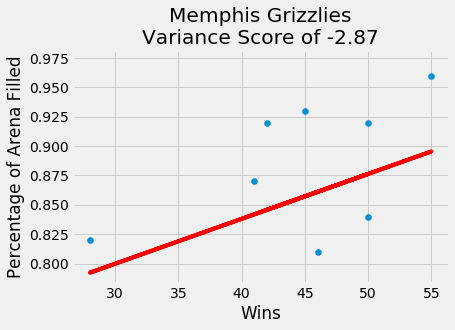

In [102]:
nba_grizz=nba[(nba.Team == 'Grizzlies')]
grizz_x=nba_grizz[['Wins']]
grizz_y=nba_grizz[['HomePercentCapacity']]
grizz_x_train, grizz_x_test, grizz_y_train, grizz_y_test = train_test_split(grizz_x, grizz_y, test_size=0.4, random_state=1)
lm_grizz = LinearRegression()
lm_grizz.fit(grizz_x_train,grizz_y_train)
prediction_grizz = lm_spurs.predict(grizz_x_test)
plt.scatter(grizz_x_test,grizz_y_test)
plt.plot(grizz_x_test,lm_grizz.predict(grizz_x_test),color='red')
plt.title('Memphis Grizzlies\nVariance Score of -2.87')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(grizz_y_test,prediction_grizz))
print('Variance Score: %.2f'% r2_score(grizz_y_test,prediction_grizz))

Mean squared error: 0.00
Variance Score: 0.36


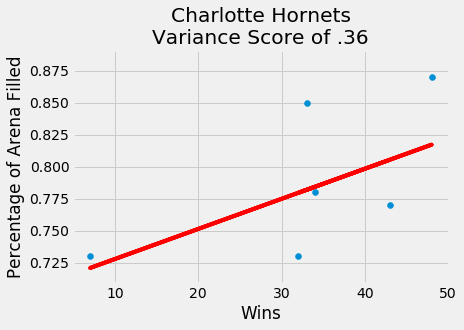

In [103]:
nba_hornets=nba[(nba.Team == 'Hornets')]
hornets_x=nba_hornets[['Wins']]
hornets_y=nba_hornets[['HomePercentCapacity']]
hornets_x_train, hornets_x_test, hornets_y_train, hornets_y_test = train_test_split(hornets_x, hornets_y, test_size=0.4, random_state=1)
lm_hornets = LinearRegression()
lm_hornets.fit(hornets_x_train,hornets_y_train)
prediction_hornets = lm_hornets.predict(hornets_x_test)
plt.scatter(hornets_x_test,hornets_y_test)
plt.plot(hornets_x_test,lm_hornets.predict(hornets_x_test),color='red')
plt.title('Charlotte Hornets\nVariance Score of .36')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(hornets_y_test,prediction_hornets))
print('Variance Score: %.2f'% r2_score(hornets_y_test,prediction_hornets))

Mean squared error: 0.00
Variance Score: 0.19


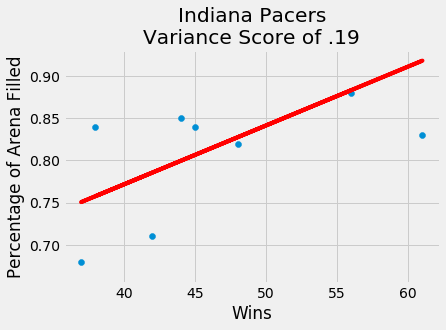

In [104]:
nba_pacers=nba[(nba.Team == 'Pacers')]
pacers_x=nba_pacers[['Wins']]
pacers_y=nba_pacers[['HomePercentCapacity']]
pacers_x_train, pacers_x_test, pacers_y_train, pacers_y_test = train_test_split(pacers_x, pacers_y, test_size=0.4, random_state=1)
lm_pacers = LinearRegression()
lm_pacers.fit(pacers_x_train,pacers_y_train)
prediction_pacers = lm_pacers.predict(pacers_x_test)
plt.scatter(pacers_x_test,pacers_y_test)
plt.plot(pacers_x_test,lm_pacers.predict(pacers_x_test),color='red')
plt.title('Indiana Pacers\nVariance Score of .19')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(pacers_y_test,prediction_pacers))
print('Variance Score: %.2f'% r2_score(pacers_y_test,prediction_pacers))

Mean squared error: 0.00
Variance Score: 0.22


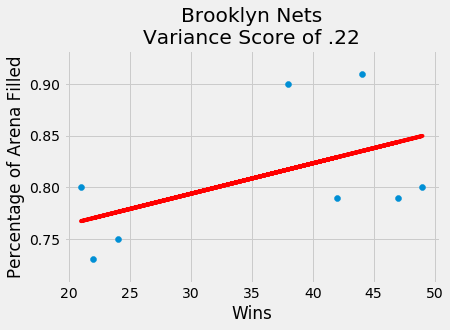

In [105]:
nba_nets=nba[(nba.Team == 'Nets')]
nets_x=nba_nets[['Wins']]
nets_y=nba_nets[['HomePercentCapacity']]
nets_x_train, nets_x_test, nets_y_train, nets_y_test = train_test_split(nets_x, nets_y, test_size=0.4, random_state=1)
lm_nets = LinearRegression()
lm_nets.fit(nets_x_train,nets_y_train)
prediction_nets = lm_nets.predict(nets_x_test)
plt.scatter(nets_x_test,nets_y_test)
plt.plot(nets_x_test,lm_nets.predict(nets_x_test),color='red')
plt.title('Brooklyn Nets\nVariance Score of .22')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(nets_y_test,prediction_nets))
print('Variance Score: %.2f'% r2_score(nets_y_test,prediction_nets))

Mean squared error: 0.00
Variance Score: 0.49


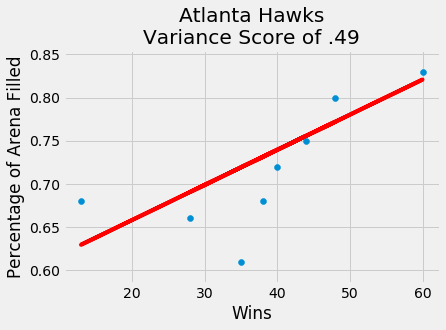

In [106]:
nba_hawks=nba[(nba.Team == 'Hawks')]
hawks_x=nba_hawks[['Wins']]
hawks_y=nba_hawks[['HomePercentCapacity']]
hawks_x_train, hawks_x_test, hawks_y_train, hawks_y_test = train_test_split(hawks_x, hawks_y, test_size=0.4, random_state=1)
lm_hawks = LinearRegression()
lm_hawks.fit(hawks_x_train,hawks_y_train)
prediction_hawks = lm_hawks.predict(hawks_x_test)
plt.scatter(hawks_x_test,hawks_y_test)
plt.plot(hawks_x_test,lm_hawks.predict(hawks_x_test),color='red')
plt.title('Atlanta Hawks\nVariance Score of .49')
plt.xlabel('Wins')
plt.ylabel('Percentage of Arena Filled')
print('Mean squared error: %.2f'% mean_squared_error(hawks_y_test,prediction_hawks))
print('Variance Score: %.2f'% r2_score(hawks_y_test,prediction_hawks))